In [1]:
import pandas as pd
import numpy as np
from numpy import mean
import time
from datetime import datetime
import calendar
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import re
from scipy.stats import pearsonr
import math
from statistics import median
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error, accuracy_score
import shap
plt.style.use('ggplot')
pd.options.mode.chained_assignment = None  # default='warn''

# Loading the data from the csv files as panda dataframes

In [2]:
train=pd.read_csv('C:/Box office Prediction/train.csv')
test=pd.read_csv('C:/Box office Prediction/test.csv')

# This is for getting information about the data

In [3]:
train.info()
train["spoken_languages"].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

spoken_languages
[{'iso_639_1': 'en', 'name': 'English'}]                                                                                                                                                                            1817
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'es', 'name': 'Español'}]                                                                                                                                      86
[{'iso_639_1': 'en', 'name': 'English'}, {'iso_639_1': 'fr', 'name': 'Français'}]                                                                                                                                     77
[{'iso_639_1': 'ru', 'name': 'Pусский'}]                                                                                                                                                                              45
[{'iso_639_1': 'fr', 'name': 'Français'}]                                                                          

In [4]:
train.head(10)

id                              belongs_to_collection    budget  \
0   1  [{'id': 313576, 'name': 'Hot Tub Time Machine ...  14000000   
1   2  [{'id': 107674, 'name': 'The Princess Diaries ...  40000000   
2   3                                                NaN   3300000   
3   4                                                NaN   1200000   
4   5                                                NaN         0   
5   6                                                NaN   8000000   
6   7                                                NaN  14000000   
7   8                                                NaN         0   
8   9  [{'id': 256377, 'name': 'The Muppet Collection...         0   
9  10                                                NaN   6000000   

                                              genres  \
0                     [{'id': 35, 'name': 'Comedy'}]   
1  [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...   
2                      [{'id': 18, 'name': 'Drama'}]   
3  [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   
4  [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...   
5  [{'id': 16, 'name': 'Animation'}, {'id': 12, '...   
6  [{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...   
7                [{'id': 99, 'name': 'Documentary'}]   
8  [{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...   
9  [{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...   

                             homepage    imdb_id original_language  \
0                                 NaN  tt2637294                en   
1                                 NaN  tt0368933                en   
2   http://sonyclassics.com/whiplash/  tt2582802                en   
3          http://kahaanithefilm.com/  tt1821480                hi   
4                                 NaN  tt1380152                ko   
5                                 NaN  tt0093743                en   
6  http://www.thepossessionmovie.com/  tt0431021                en   
7                                 NaN  tt0391024                en   
8                                 NaN  tt0117110                en   
9                                 NaN  tt0310281                en   

                             original_title  \
0                    Hot Tub Time Machine 2   
1  The Princess Diaries 2: Royal Engagement   
2                                  Whiplash   
3                                   Kahaani   
4                                      마린보이   
5    Pinocchio and the Emperor of the Night   
6                            The Possession   
7                              Control Room   
8                    Muppet Treasure Island   
9                             A Mighty Wind   

                                            overview  popularity  ...  \
0  When Lou, who has become the "father of the In...    6.575393  ...   
1  Mia Thermopolis is now a college graduate and ...    8.248895  ...   
2  Under the direction of a ruthless instructor, ...   64.299990  ...   
3  Vidya Bagchi (Vidya Balan) arrives in Kolkata ...    3.174936  ...   
4  Marine Boy is the story of a former national s...    1.148070  ...   
5  Pinocchio and his friends, a glow worm and a m...    0.743274  ...   
6  A young girl buys an antique box at a yard sal...    7.286477  ...   
7  A chronicle which provides a rare window into ...    1.949044  ...   
8  After telling the story of Flint's last journe...    6.902423  ...   
9  In "A Mighty Wind", director Christopher Guest...    4.672036  ...   

  release_date runtime                                   spoken_languages  \
0      2/20/15    93.0           [{'iso_639_1': 'en', 'name': 'English'}]   
1       8/6/04   113.0           [{'iso_639_1': 'en', 'name': 'English'}]   
2     10/10/14   105.0           [{'iso_639_1': 'en', 'name': 'English'}]   
3       3/9/12   122.0  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...   
4       2/5/09   118.0           [{'iso_639_1': 'ko', 'name': '한국어/조선말'}]   
5       8/6/87    83.0           [{'iso_639_1': 'en', 'name'

In [5]:
trainmissing=train.isna().sum()
testmissing=test.isna().sum()
print("The missing values in the training set is",trainmissing)
print("\nThe missing values in the test set is\n",testmissing)


The missing values in the training set is id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

The missing values in the test set is
 id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
origi

# Exploratory Data Analysis and Feature Engineering

In this section we will go through all the 22 features which are present as the columns in the dataframe .For exploration of each variable we will perform univariate and bivariate analysis of each feature.We will use three list one list for features to be used.Other list for features to be dropped.Third list for the features to be log transformed.

# Belong to Collection

In [6]:
train.belongs_to_collection=train.belongs_to_collection.apply(lambda x: 1 if type(x)==str else 0)
test.belongs_to_collection=test.belongs_to_collection.apply(lambda x:1 if type(x)==str else 0)

In [7]:
log_features=[]

In [8]:
print("The number of movies that do not belong to category and the movies that belong to the category\n",train.belongs_to_collection.value_counts())

The number of movies that do not belong to category and the movies that belong to the category
 belongs_to_collection
0    2396
1     604
Name: count, dtype: int64


### Univariate Analysis

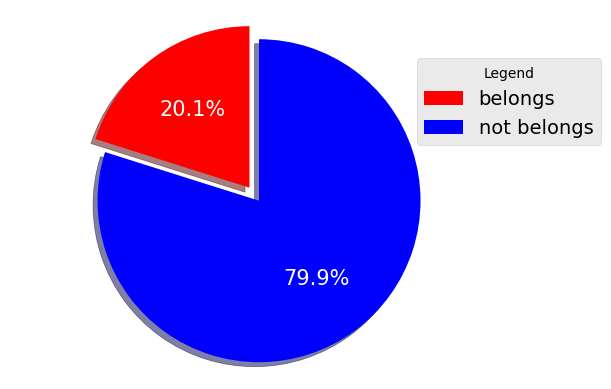

In [9]:
label="belongs","not belongs"
btc=[sum(train.belongs_to_collection),(train.belongs_to_collection==0).sum(axis=0)]
explode=(0.1,0)
colors=["red","blue"]

fig,ax=plt.subplots()
ax.pie(btc,explode=explode,autopct='%1.1f%%',shadow=True,startangle=90,colors=colors,textprops={'color':'w','fontsize':15})
ax.axis('equal')

ax.legend(label,title="Legend",loc="center left",fontsize=14,bbox_to_anchor=(0.8,0.25,0.5,1))


# Bivariate Analysis

has_collection
Not in Collection        2396
Belongs in Collection     604
Name: count, dtype: int64
<class 'pandas.core.series.Series'>
RangeIndex: 3000 entries, 0 to 2999
Series name: has_collection
Non-Null Count  Dtype 
--------------  ----- 
3000 non-null   object
dtypes: object(1)
memory usage: 23.6+ KB
None




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



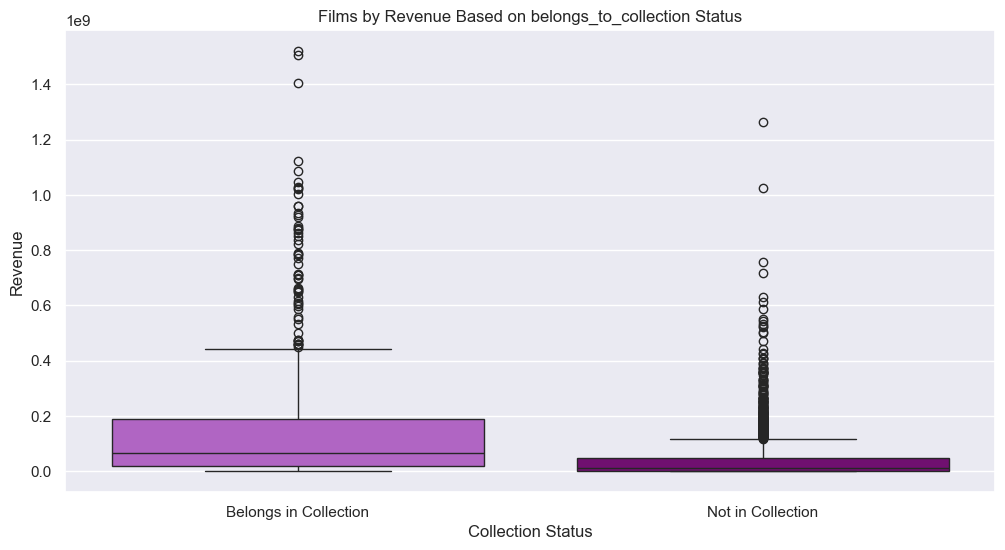

In [10]:
# bivariate analysis of revenue with belongs_to_collection
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: 'Belongs in Collection' if x == 1 else 'Not in Collection')
print(train['has_collection'].value_counts())
print(train["has_collection"].info())
pal1 = ['mediumorchid', 'purple']

sns.set(rc={'figure.figsize':(12, 6)})
sns.boxplot(x='has_collection', y='revenue', data=train, palette=pal1)
plt.title('Films by Revenue Based on belongs_to_collection Status')
plt.ylabel("Revenue")
plt.xlabel("Collection Status")
train["has_collection"]=train["has_collection"].apply(lambda x:1 if x=="Belongs in Collection" else 0)

In [11]:
corr,_=pearsonr(train['belongs_to_collection'],train['revenue'])
print("The correlation between belong_to_collection and the revenue is",corr)
corr,_=pearsonr(train['belongs_to_collection'],np.log1p(train["revenue"]))
print("The correlation between belong_to_collection and the log transformation of revenue is",corr)

The correlation between belong_to_collection and the revenue is 0.3394249988710903
The correlation between belong_to_collection and the log transformation of revenue is 0.2565527363245755


# Budget



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



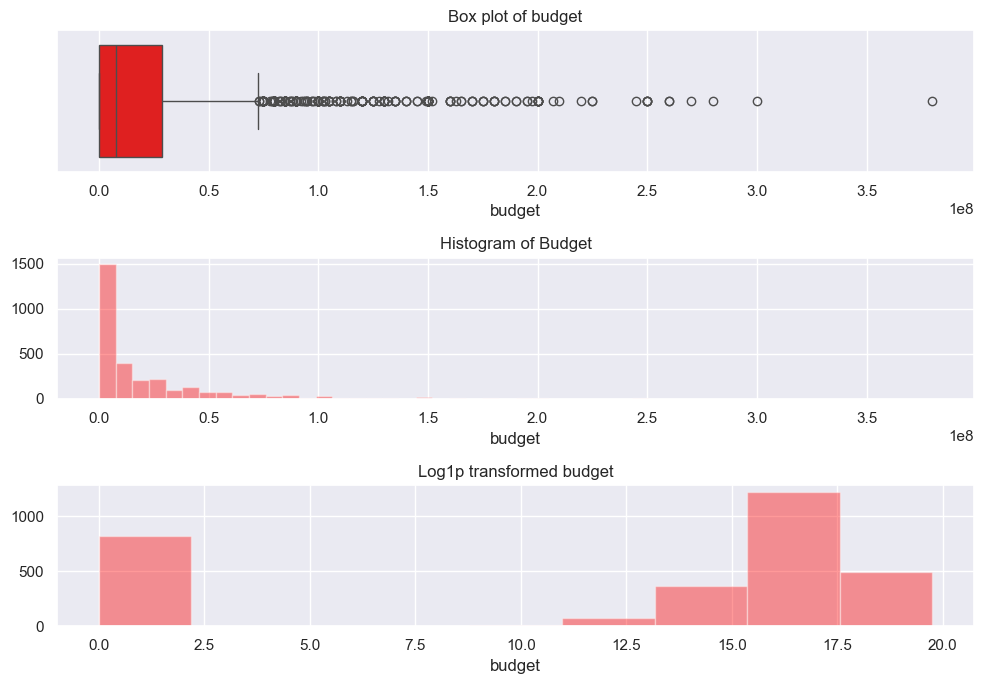

In [12]:
f,ax=plt.subplots(3,figsize=(10,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.budget,ax=ax[0],color="red")
ax[0].set_title("Box plot of budget")
sns.distplot(a=train.budget,kde=False,ax=ax[1],color="red")
ax[1].set_title("Histogram of Budget")
sns.distplot(a=np.log1p(train.budget),kde=False,ax=ax[2],color="red")
ax[2].set_title("Log1p transformed budget")
f.tight_layout()

In [13]:
print("Movies with budget listed as 0:",(train.budget==0).sum())
median=train.loc[train['budget']>0,'budget'].median()
train['budget_processed']=train["budget"].mask(train["budget"]==0,median)
test["budget_processed"]=test["budget"].mask(train["budget"]==0,median)


Movies with budget listed as 0: 812


In [14]:
train.nsmallest(10,'budget_processed')

id  belongs_to_collection  budget  \
334    335                      0       1   
695    696                      0       1   
849    850                      0       1   
1346  1347                      0       1   
2255  2256                      0       1   
1754  1755                      0       2   
2032  2033                      0       4   
1198  1199                      1       5   
1800  1801                      0       5   
639    640                      0       6   

                                                 genres homepage    imdb_id  \
334   [{'id': 28, 'name': 'Action'}, {'id': 18, 'nam...      NaN  tt0376144   
695   [{'id': 10749, 'name': 'Romance'}, {'id': 53, ...      NaN  tt0374271   
849   [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...      NaN  tt0027977   
1346                      [{'id': 18, 'name': 'Drama'}]      NaN  tt0048028   
2255  [{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...      NaN  tt0120836   
1754  [{'id': 53, 'name': 'Thriller'}, {'id': 10769,...      NaN  tt0110604   
2032  [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  tt0022879   
1198  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...      NaN  tt0077523   
1800  [{'id': 18, 'name': 'Drama'}, {'id': 35, 'name...      NaN  tt0144134   
639   [{'id': 18, 'name': 'Drama'}, {'id': 10749, 'n...      NaN  tt0183659   

     original_language             original_title  \
334                 ta                      Saamy   
695                 hi                  Tere Naam   
849                 en               Modern Times   
1346                en               East of Eden   
2255                en               Lost & Found   
1754                en               Mute Witness   
2032                en         A Farewell to Arms   
1198                en  Every Which Way But Loose   
1800                en         The Cherry Orchard   
639                 en                    Pollock   

                                               overview  popularity  ...  \
334   Saamy movie is all about Arusaamy (Vikram) who...    0.438490  ...   
695   Lower Caste Radhey Mohan is a no good slacker,...    1.280455  ...   
849   The Tramp struggles to live in modern industri...    8.159556  ...   
1346  In the Salinas Valley, in and around World War...    6.428830  ...   
2255  A comedy about finding your true love at any p...    1.337096  ...   
1754  Billy is mute, but it hasn't kept her from bec...    2.466066  ...   
2032  British nurse Catherine Barkley (Helen Hayes) ...    1.914697  ...   
1198  Philo Beddoe is your regular, easygoing, truck...    6.759519  ...   
1800  Madame Ranevskaya (Rampling) is a spoiled agin...    0.001880  ...   
639   In August of 1949, Life Magazine ran a banner ...   11.179864  ...   

                                       spoken_languages    status  \
334              [{'iso_639_1': 'ta', 'name': 'தமிழ்'}]  Released   
695             [{'iso_639_1': 'hi', 'name': 'हिन्दी'}]  Released   
849            [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1346           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
2255           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1754  [{'iso_639_1': 'ru', 'name': 'Pусский'}, {'iso...  Released   
2032           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1198           [{'iso_639_1': 'en', 'name': 'English'}]  Released   
1800  [{'iso_639_1': 'en', 'name': 'English'}, {'iso...  Released   
639            [{'iso_639_1': 'en', 'name': 'English'}]  Released   

                                                tagline  \
334                                                 NaN   
695                     Unfortunately a true love story   
849   He stands alone as the greatest entertainer of...   
1346  Of what a girl did . . . what a boy did ... of...   
2255  A comedy about a guy who would do anything to ...   
1754  She Can't Speak. She Can't Scream. She Can't B...   
2032          Every woman who has loved will und

In [15]:
median=train.loc[train["budget"]>=10000,"budget"].median()
train["budget_processed"]=train["budget"].mask(train["budget"]<10000,median)
test["budget_processed"]=test["budget"].mask(test["budget"]<10000,median)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



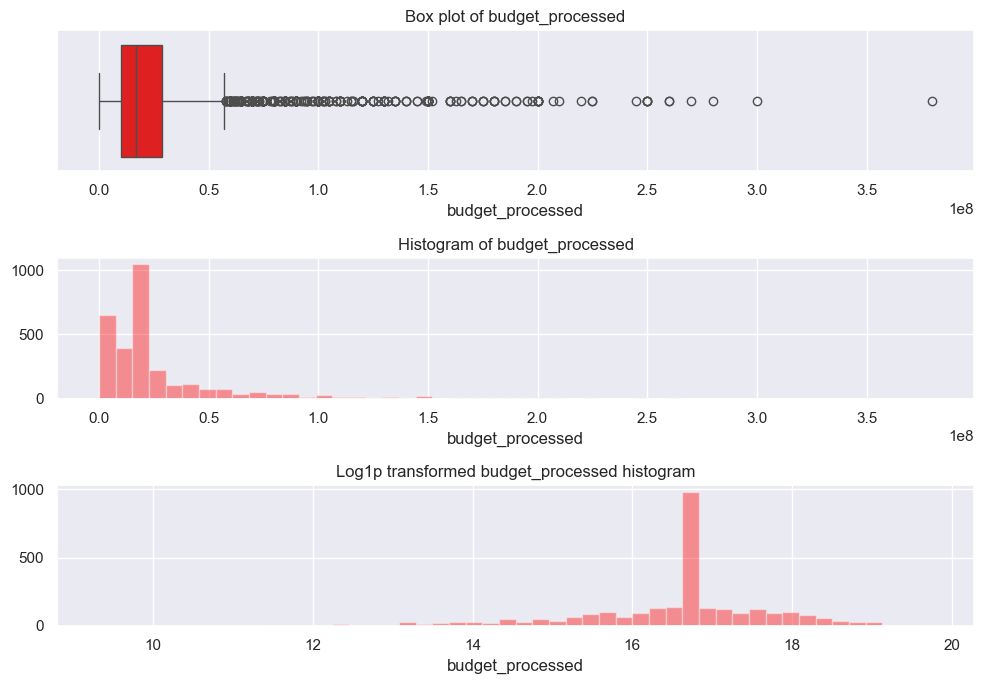

In [16]:
f,ax=plt.subplots(3,figsize=(10,7))

sns.set(rc={"figure.figsize":(12,8)})
sns.boxplot(x=train.budget_processed,ax=ax[0],color="red")
ax[0].set_title("Box plot of budget_processed")
sns.distplot(a=train.budget_processed,kde=False,ax=ax[1],color="red")
ax[1].set_title("Histogram of budget_processed")
sns.distplot(a=np.log1p(train.budget_processed),kde=False,ax=ax[2],color="red")
ax[2].set_title("Log1p transformed budget_processed histogram")
f.tight_layout()

# Bivariate Analysis

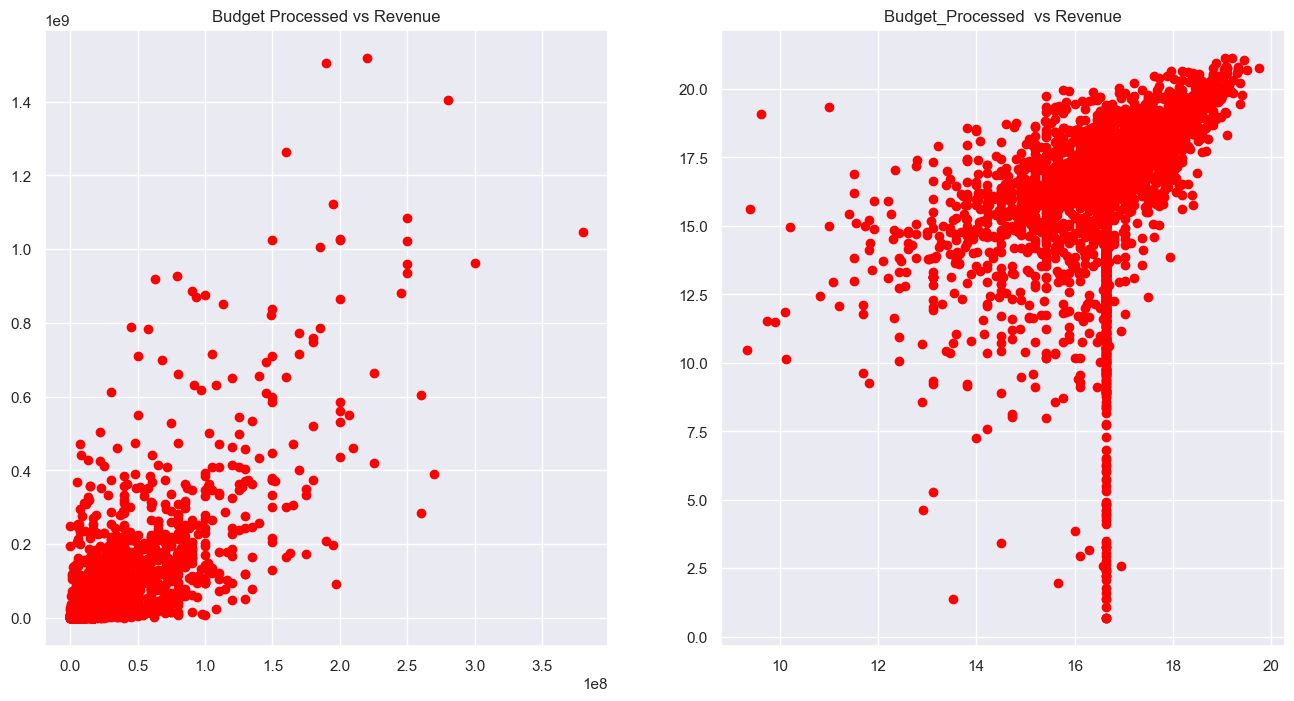

In [17]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.scatter(train["budget_processed"],train["revenue"],color="red")
plt.title("Budget Processed vs Revenue")
plt.subplot(1,2,2)
plt.scatter(np.log1p(train["budget_processed"]),np.log1p(train["revenue"]),color="red")
plt.title("Budget_Processed  vs Revenue")
plt.show()

In [18]:
log_features.append("budget_processed")


In [19]:
corr,_=pearsonr(train["budget_processed"],train["revenue"])
print("Pearsons correlation betwenn budget_processed and revenue:%.3f"%corr)
corr,_=pearsonr(np.log1p(train["budget_processed"]),np.log1p(train["revenue"]))
print("Pearsons correlation between log transformed budget_processed and log   transformed revenue:%.3f"%corr)
                
                

Pearsons correlation betwenn budget_processed and revenue:0.746
Pearsons correlation between log transformed budget_processed and log   transformed revenue:0.373


# Genre

In [20]:
train['genres'].head()

0                       [{'id': 35, 'name': 'Comedy'}]
1    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...
2                        [{'id': 18, 'name': 'Drama'}]
3    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...
4    [{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...
Name: genres, dtype: object

In [21]:
train['genres'] = train['genres'].fillna('')
train['genres_reform'] = train['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test['genres'] = test['genres'].fillna('')
test['genres_reform'] = test['genres'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

In [22]:
train["genres_reform"].head()

0                            [Comedy]
1    [Comedy, Drama, Family, Romance]
2                             [Drama]
3                   [Thriller, Drama]
4                  [Action, Thriller]
Name: genres_reform, dtype: object

In [23]:
df = train.copy(deep=True)

In [24]:
def unpackCol(list, df):
    for i in range(len(df)):
        for name in list[i]:
            if name not in df.columns:
                df[name] = 0
            df[name][i] = 1
    return df

In [25]:
# example of using it to unpack the genres 
df = unpackCol(df['genres_reform'], df)

# here's what it did
print(df.columns)
print()
print(df['Drama'])
print()
print('Total number of Dramas: ', sum(df['Drama']))

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'has_collection', 'budget_processed', 'genres_reform', 'Comedy',
       'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation',
       'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie'],
      dtype='object')

0       0
1       1
2       1
3       1
4       0
       ..
2995    0
2996    1
2997    0
2998    0
2999    0
Name: Drama, Length: 3000, dtype: int64

Total number of Dramas:  1531


In [26]:
# new feature for a count of the number of genres
train['num_genres'] = train.genres_reform.apply(lambda x: len(x))
test['num_genres'] = test.genres_reform.apply(lambda x: len(x))

train['num_genres'].value_counts()

num_genres
2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: count, dtype: int64

# Univariate Analysis

Text(0.5, 0, 'Genre')

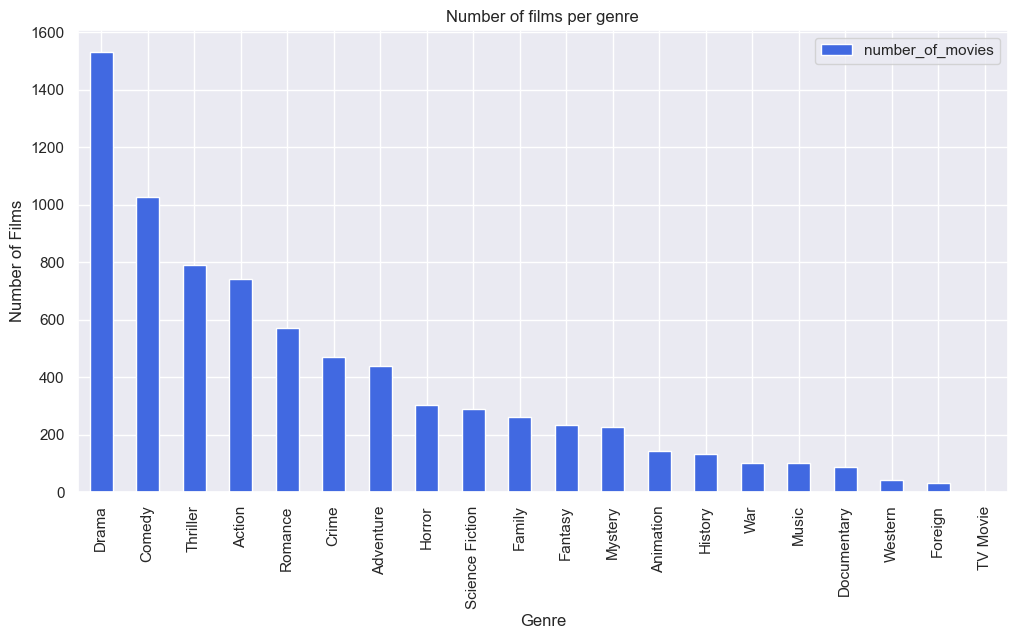

In [27]:
# plotting genres in order of number of instances in the df.csv dataset
genresDict = dict()

for genre in df["genres_reform"]:
    for elem in genre:
        if elem not in genresDict:
            genresDict[elem] = 1
        else:
            genresDict[elem] += 1


sns.set(rc={'figure.figsize':(12,6)})
genres_df = pd.DataFrame.from_dict(genresDict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar(color='royalblue')
plt.title("Number of films per genre")
plt.ylabel("Number of Films")
plt.xlabel("Genre")

# Bivariate Analysis

In [28]:
# bivariate analysis of revenue with genre
# creating a callable index for genres
genres_df.index.values
for g in genres_df.index.values:
    df[g] = df['genres_reform'].apply(lambda x: 1 if g in x else 0)

# median revenue per genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_rev"] = df[df[g]==1].revenue.median()
    
genres_df.sort_values(by=["number_of_movies", "median_rev"], ascending=False).head(10)

# mean revenue for genre type
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "mean_rev"] = df[df[g]==1].revenue.mean()

genres_df.sort_values(by=["number_of_movies", "mean_rev"], ascending=False).head(10)

number_of_movies  median_rev      mean_rev
Drama                        1531  11293663.0  4.540607e+07
Comedy                       1028  18809184.0  6.087574e+07
Thriller                      789  21890845.0  6.833664e+07
Action                        741  36000000.0  1.110434e+08
Romance                       571  14016568.0  5.270501e+07
Crime                         469  24048000.0  5.949128e+07
Adventure                     439  59700000.0  1.758095e+08
Horror                        301  17037887.0  5.270907e+07
Science Fiction               290  35109301.5  1.223672e+08
Family                        260  57470029.5  1.388978e+08

Text(0.5, 0, 'Genre')

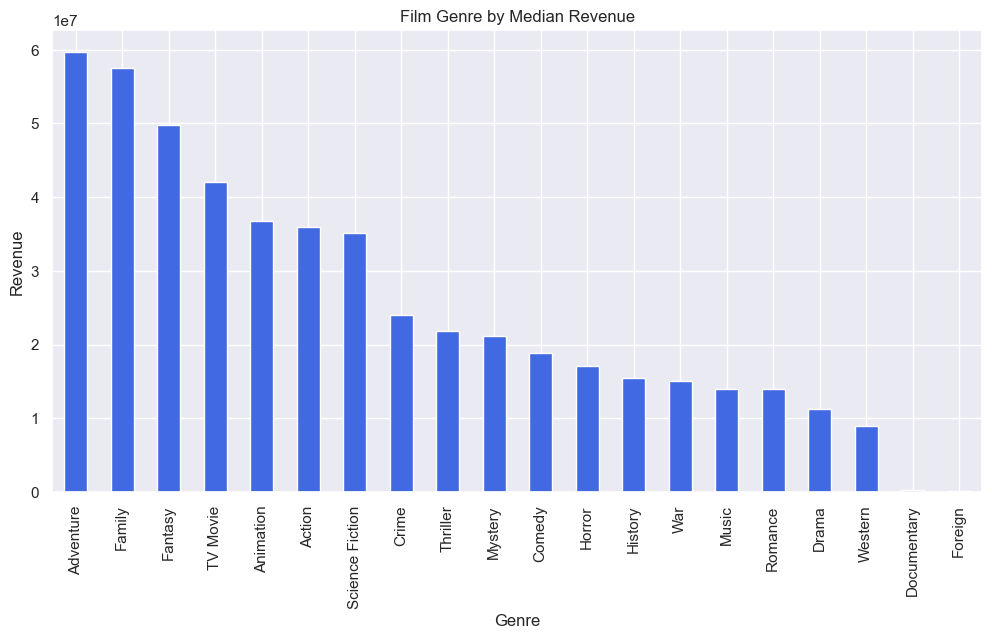

In [29]:
# genres by median revenue
genres_df.sort_values(by=["median_rev"], ascending=False).median_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Median Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

Text(0.5, 0, 'Genre')

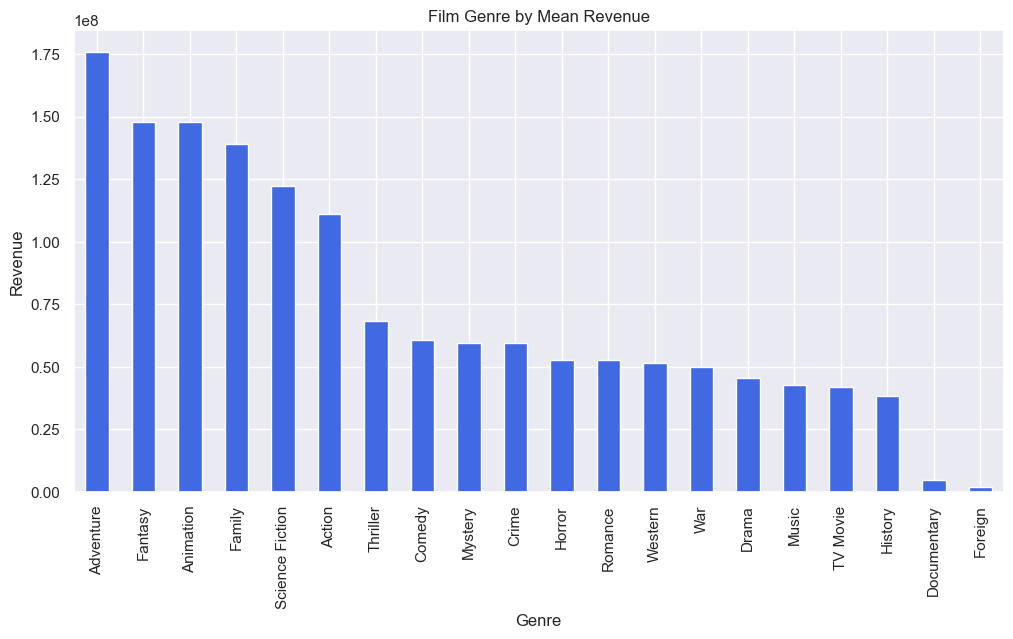

In [30]:
# genres by mean revenue
genres_df.sort_values(by=["mean_rev"], ascending=False).mean_rev.plot.bar(color='royalblue')
plt.title("Film Genre by Mean Revenue")
plt.ylabel("Revenue")
plt.xlabel("Genre")

<Axes: >

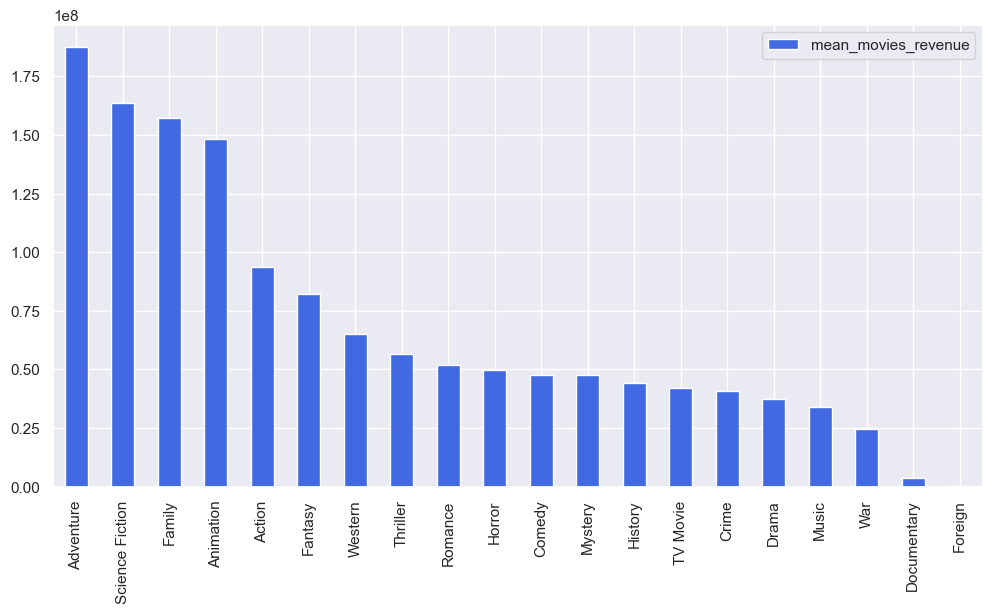

In [31]:
topGenreDict = {}
for element in train[["revenue", "genres_reform"]].values:
   # compare results when looking at top genre
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in topGenreDict:
            topGenreDict[element[1][i]] = [element[0], 1]
        else:
            topGenreDict[element[1][i]][0] += element[0]
            topGenreDict[element[1][i]][1] += 1    

for genre in topGenreDict:
    topGenreDict[genre][0] = topGenreDict[genre][0]/topGenreDict[genre][1]
    topGenreDict[genre] = topGenreDict[genre][0]
    
genres_df = pd.DataFrame.from_dict(topGenreDict, orient='index', columns=["mean_movies_revenue"])
genres_df.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='royalblue')


In [32]:
# Sort both of our dicts of studios and top studios to more easily access the 'most successful studios'
topGenreDict = {k: v for k, v in sorted(topGenreDict.items(), key=lambda item: item[1], reverse = False)}
genresDict = {k: v for k, v in sorted(genresDict.items(), key=lambda item: item[1], reverse = True)}
print(topGenreDict)
print(genresDict)

{'Foreign': 140650.0, 'Documentary': 3538249.971830986, 'War': 24388514.85, 'Music': 33890384.55, 'Drama': 37298750.1133758, 'Crime': 40820052.02040816, 'TV Movie': 42000000.0, 'History': 44237822.875, 'Mystery': 47674838.90909091, 'Comedy': 47754836.36092715, 'Horror': 49586852.62352941, 'Romance': 51648567.82089552, 'Thriller': 56574423.54310345, 'Western': 64905713.538461536, 'Fantasy': 82345105.41176471, 'Action': 93596599.80576923, 'Animation': 148089684.90789473, 'Family': 157347482.6111111, 'Science Fiction': 163833801.36585367, 'Adventure': 187715537.32085562}
{'Drama': 1531, 'Comedy': 1028, 'Thriller': 789, 'Action': 741, 'Romance': 571, 'Crime': 469, 'Adventure': 439, 'Horror': 301, 'Science Fiction': 290, 'Family': 260, 'Fantasy': 232, 'Mystery': 225, 'Animation': 141, 'History': 132, 'Music': 100, 'War': 100, 'Documentary': 87, 'Western': 43, 'Foreign': 31, 'TV Movie': 1}


In [33]:
train['genre_rank'] = train['genres_reform'].apply(lambda x: list(topGenreDict.keys()).index(x[0]) if len(x) > 0 else 0)
test['genre_rank'] = test['genres_reform'].apply(lambda x: list(topGenreDict.keys()).index(x[0]) if len(x) > 0 else 0)

train['genre_rank'].value_counts()

genre_rank
4     785
9     604
15    520
19    187
10    170
5     147
12    116
16     76
1      71
14     68
11     67
18     41
17     36
8      33
2      20
3      20
7      16
13     13
0       9
6       1
Name: count, dtype: int64

In [34]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['genre_rank'], train['revenue'])
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['genre_rank']), np.log1p(train['revenue']))
print('Pearsons correlation between genre_rank and revenue: %.3f' % corr)

Pearsons correlation between genre_rank and revenue: 0.283
Pearsons correlation between genre_rank and revenue: 0.266


In [35]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_genres'], train['revenue'])
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_genres']), np.log1p(train['revenue']))
print('Pearsons correlation between num_genres and revenue: %.3f' % corr)

Pearsons correlation between num_genres and revenue: 0.164
Pearsons correlation between num_genres and revenue: 0.191


# Homepage

In [36]:
print('Movies missing a homepage:',train.homepage.isna().sum())

Movies missing a homepage: 2054


In [37]:
#Creating new column
train['has_homepage'] = train.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
test['has_homepage'] = test.homepage.apply(lambda x: 0 if pd.isnull(x) else 1)
train['has_homepage'].value_counts()

has_homepage
0    2054
1     946
Name: count, dtype: int64

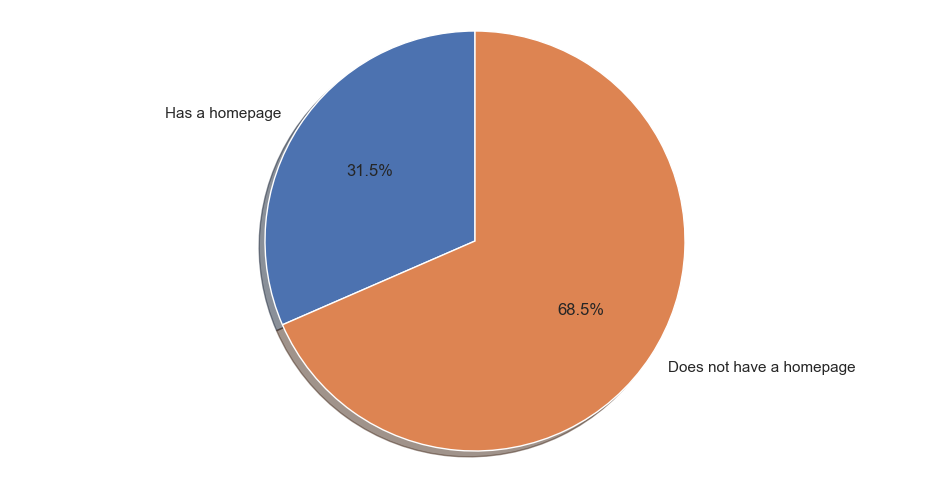

In [38]:
# plotting 'has a homepage' data
labels = 'Has a homepage', 'Does not have a homepage'
btc_1 = [sum(train.has_homepage), (train.has_homepage == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal')

plt.show()

# Bivariate Analysis

The figure layout has changed to tight


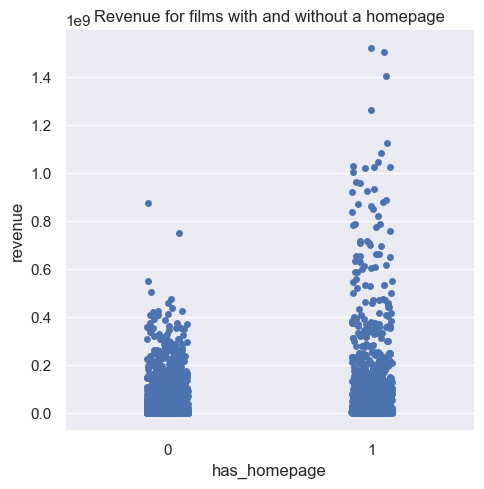

In [39]:
sns.catplot(x='has_homepage', y='revenue', data=train);
plt.title('Revenue for films with and without a homepage');

In [40]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['has_homepage'], train['revenue'])
print('Pearsons correlation between has_homepage and revenue: %.3f' % corr)

Pearsons correlation between has_homepage and revenue: 0.263


# Original language

In [41]:
print("Counts of each original language:")
print(train['original_language'].value_counts()[:10])

Counts of each original language:
original_language
en    2575
fr      78
ru      47
es      43
hi      42
ja      37
it      24
cn      20
ko      20
zh      19
Name: count, dtype: int64


The figure layout has changed to tight


Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

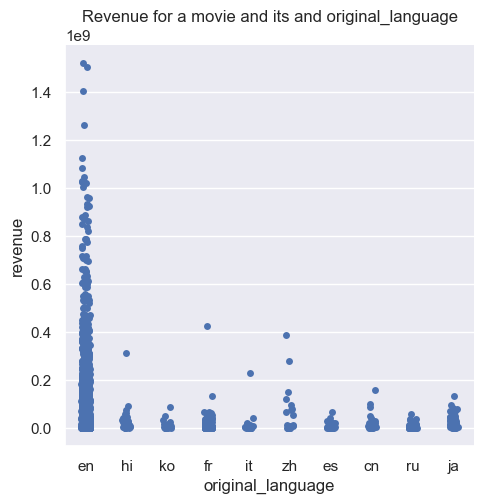

In [42]:
sns.catplot(x='original_language', y='revenue', data=train.loc[train['original_language'].isin(train['original_language'].value_counts().head(10).index)])
plt.title('Revenue for a movie and its and original_language')

In [43]:
#Creating new feature
train['in_english'] = train.original_language.apply(lambda x: 1 if x == 'en' else 0)
test['in_english'] = test.original_language.apply(lambda x: 1 if x == 'en' else 0)
train['in_english'].value_counts()

in_english
1    2575
0     425
Name: count, dtype: int64

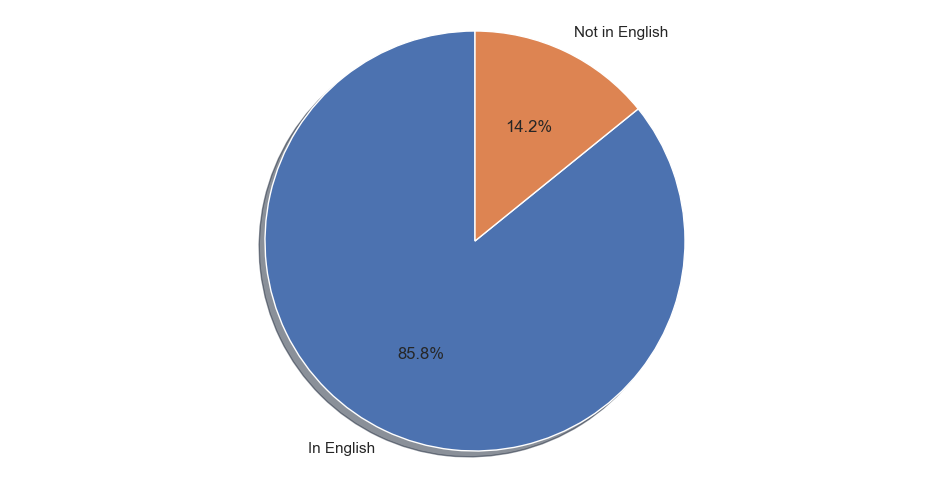

In [44]:
# plotting original data
labels = 'In English', 'Not in English'
btc_1 = [sum(train.in_english), (train.in_english == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()

# Bivariate Analysis

The figure layout has changed to tight


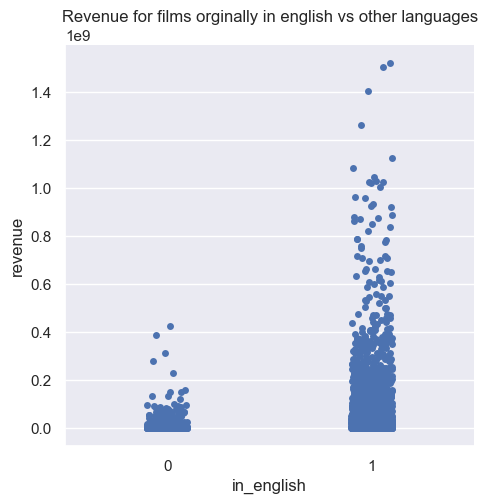

In [45]:
sns.catplot(x='in_english', y='revenue', data=train);
plt.title('Revenue for films orginally in english vs other languages');

In [46]:
#analysis of correlation and create log feature probably
corr, _ = pearsonr(train['in_english'], train['revenue'])
print('Pearsons correlation between in_english and revenue: %.3f' % corr)

Pearsons correlation between in_english and revenue: 0.142


# Overview

In [47]:
#overview
print('Movies missing an overview:',train.overview.isna().sum())

Movies missing an overview: 8


In [48]:
train.overview = train.overview.fillna("")
train['overview_len'] = train.overview.apply(len)
test.overview = test.overview.fillna("")
test['overview_len'] = test.overview.apply(len)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



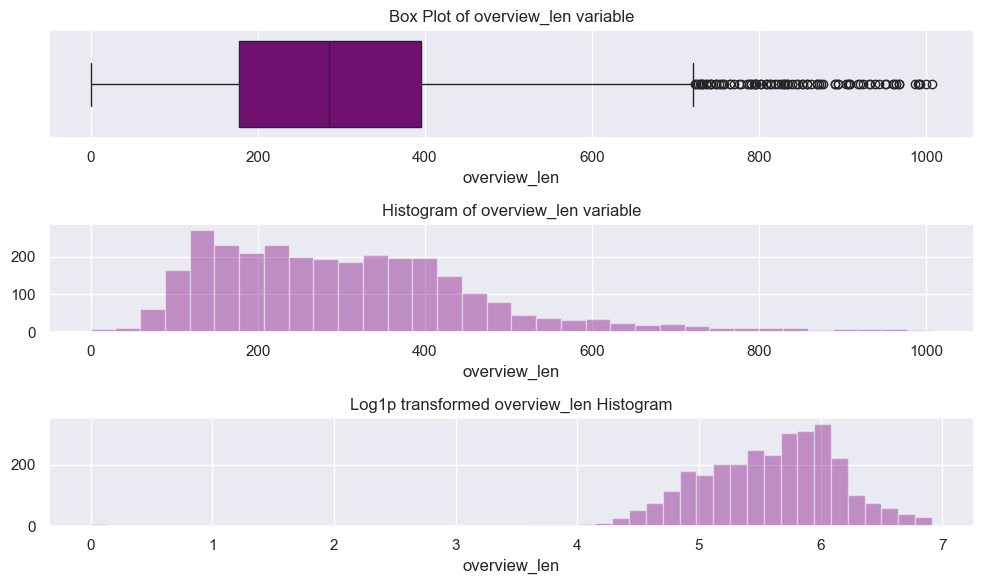

In [49]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.overview_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of overview_len variable")
sns.distplot(a=train.overview_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of overview_len variable")
sns.distplot(a=np.log1p(train.overview_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed overview_len Histogram")
f.tight_layout()

# Bivariate Analysis

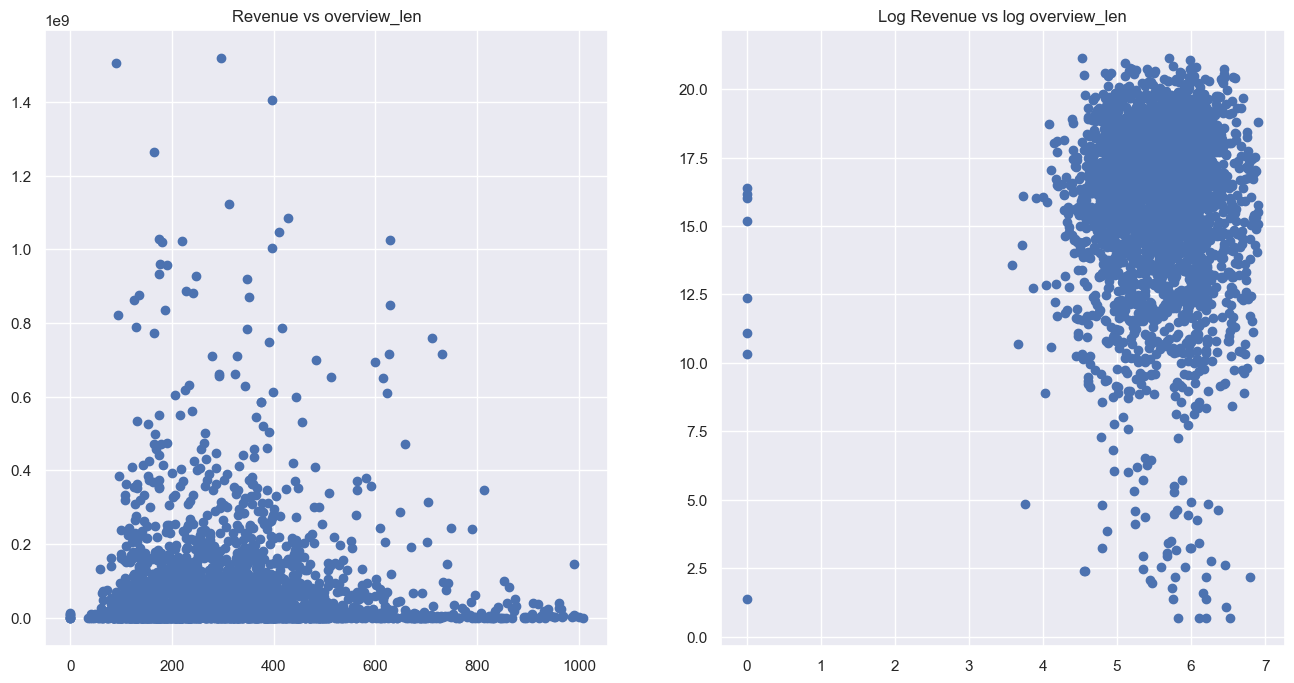

In [50]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['overview_len'], train['revenue'])
plt.title('Revenue vs overview_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['overview_len']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log overview_len');

In [51]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['overview_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: -0.005


# Popularity



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



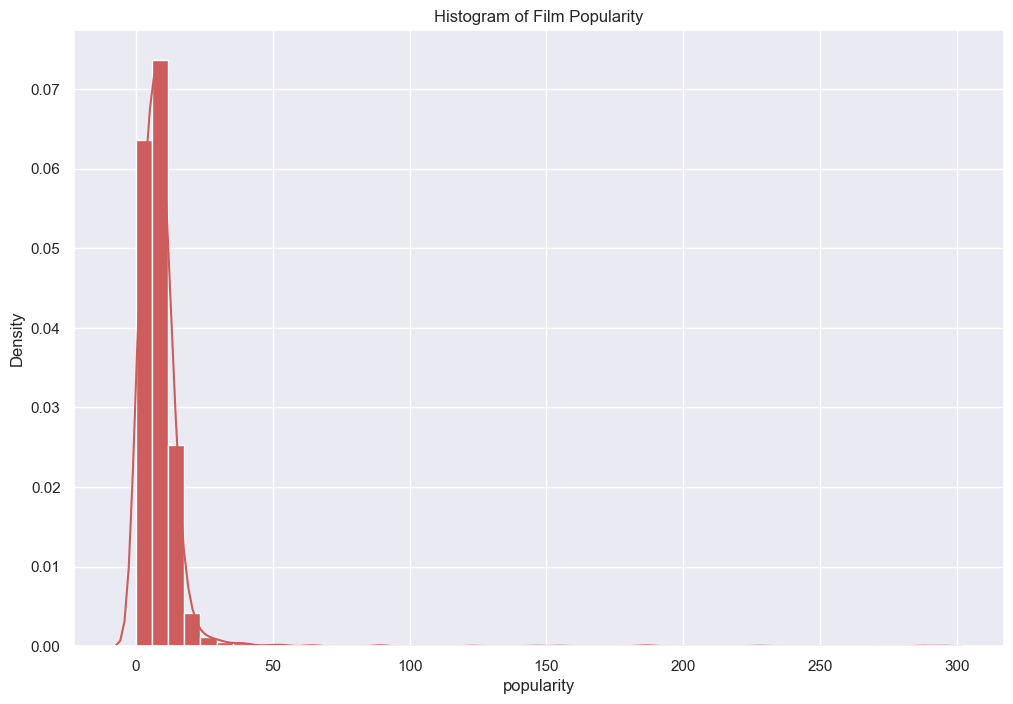

In [52]:
# plotting popularity
sns.distplot(train['popularity'], kde=True, color='indianred', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 2)})
plt.title('Histogram of Film Popularity')
plt.show();

In [53]:
print(train['popularity'].describe())

count    3000.000000
mean        8.463274
std        12.104000
min         0.000001
25%         4.018053
50%         7.374861
75%        10.890983
max       294.337037
Name: popularity, dtype: float64


# Bivariate Analysis

Pearsons correlation between popularity and revenue: 0.461
Pearsons correlation between popularity and revenue: 0.542


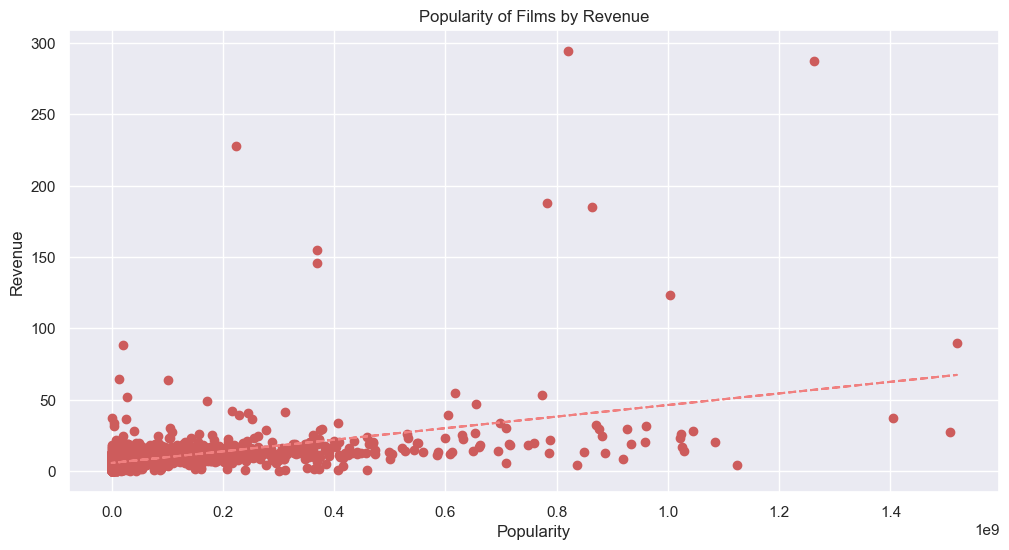

In [54]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['popularity'], train['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['popularity']), np.log1p(train['revenue']))
print('Pearsons correlation between popularity and revenue: %.3f' % corr)# bivariate: plotting popularity and revenue
sns.set(rc={'figure.figsize':(12, 6)})
cx = train['revenue']
pop = train['popularity']
plt.plot(cx, pop, 'o', color='indianred')
plt.ylabel("Revenue")
plt.xlabel("Popularity")
plt.title("Popularity of Films by Revenue")

z = np.polyfit(cx, pop, 1)
p = np.poly1d(z)
plt.plot(cx, p(cx), "--", color='lightcoral');

In [55]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['popularity'], train['revenue'])
print('Pearsons correlation between popularity and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['popularity']), np.log1p(train['revenue']))
print('Pearsons correlation between log popularity and log revenue: %.3f' % corr)

Pearsons correlation between popularity and revenue: 0.461
Pearsons correlation between log popularity and log revenue: 0.542


# Poster Path

In [56]:
#poster_path
print('Movies missing a poster path:',train.poster_path.isna().sum())

Movies missing a poster path: 1


In [57]:
train.poster_path.head(10)

0    /tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg
1    /w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg
2    /lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg
3    /aTXRaPrWSinhcmCrcfJK17urp3F.jpg
4    /m22s7zvkVFDU9ir56PiiqIEWFdT.jpg
5    /6IDqA1D2NBIVhzEEaMMRL28iBrq.jpg
6    /4QjzFuaZmB4btGnLwAgdp23BzIU.jpg
7    /83BV8fGy5p9i8RwE9oj76tZ1Ikp.jpg
8    /5A8gKzOrF9Z7tSUX6xd5dEx4NXf.jpg
9    /xwD4EsPOGLuKP50Q1gwqAsyhAFB.jpg
Name: poster_path, dtype: object

# Production Companies

### Preprocessing

In [58]:
train['production_companies'] = train['production_companies'].fillna('')
train['production_companies_reform'] = train['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

test['production_companies'] = test['production_companies'].fillna('')
test['production_companies_reform'] = test['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

df['production_companies'] = df['production_companies'].fillna('')
df['production_companies_reform'] = df['production_companies'].apply(lambda x:re.findall("'name': \'(.+?)\'", x))

In [59]:
# new column for a count of the number of production studios
train['num_studios'] = train.production_companies_reform.apply(lambda x: len(x))
test['num_studios'] = test.production_companies_reform.apply(lambda x: len(x))
df['num_studios'] = train.production_companies_reform.apply(lambda x: len(x))

train['num_studios'].value_counts()

num_studios
1     781
2     734
3     582
4     308
5     166
0     157
6     116
7      69
8      36
9      27
10      8
11      6
15      3
12      3
14      2
13      1
16      1
Name: count, dtype: int64

# Univariate Analysis



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



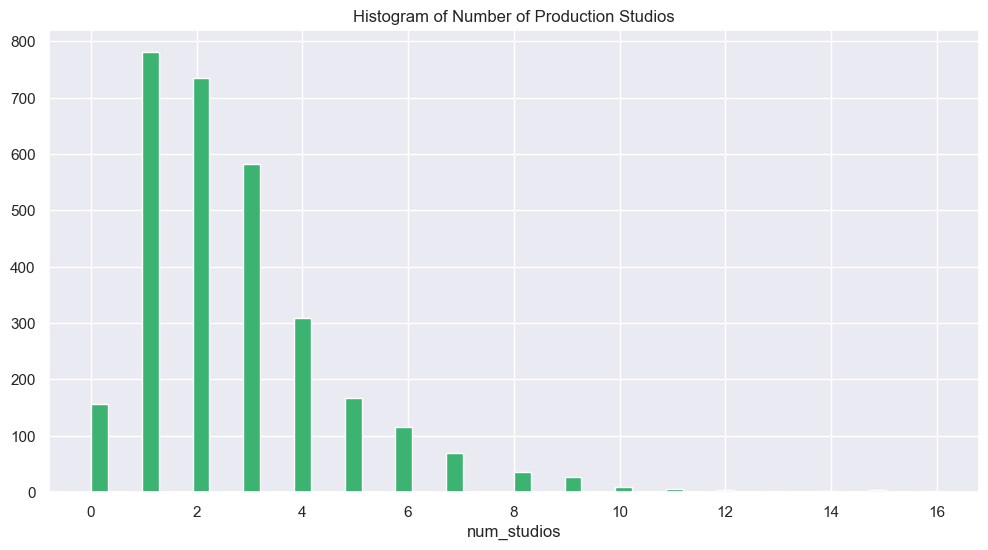

In [60]:
# plotting films by number of production studios
sns.distplot(train['num_studios'], kde=False, color='mediumseagreen', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})
plt.title('Histogram of Number of Production Studios')
plt.show();


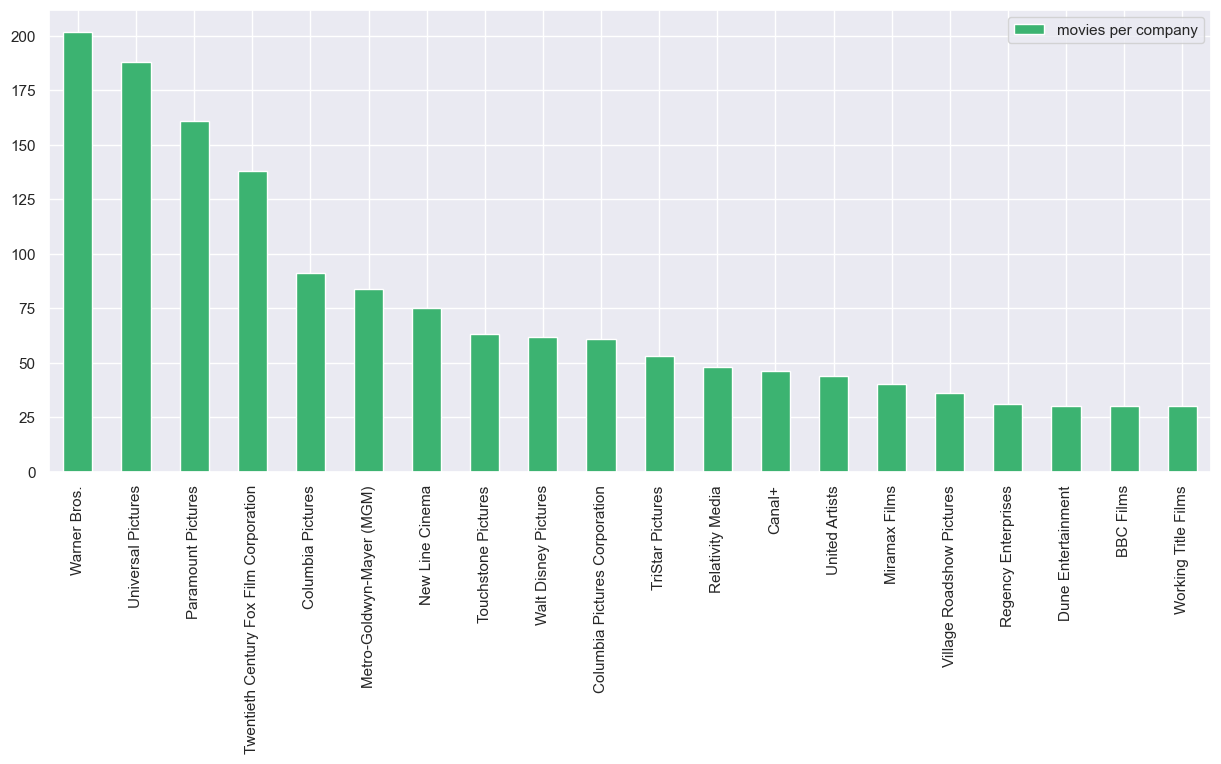

In [61]:
# production companies
companiesDict = {}
for element in train["production_companies_reform"].values:
    for company in element:
        if company not in companiesDict:
            companiesDict[company] = 1
        else:
            companiesDict[company] += 1

companies_train = pd.DataFrame.from_dict(companiesDict, orient='index', columns=["movies per company"])
companies_train.sort_values(by="movies per company", ascending=False).head(20).plot.bar(color='mediumseagreen')

companies_train.columns = ["number_of_studios"]

### Bivariate Analysis

# Production Countries

In [62]:
print('Movies missing production countries :',train.poster_path.isna().sum())

Movies missing production countries : 1


<Axes: xlabel='num_production_countries', ylabel='count'>

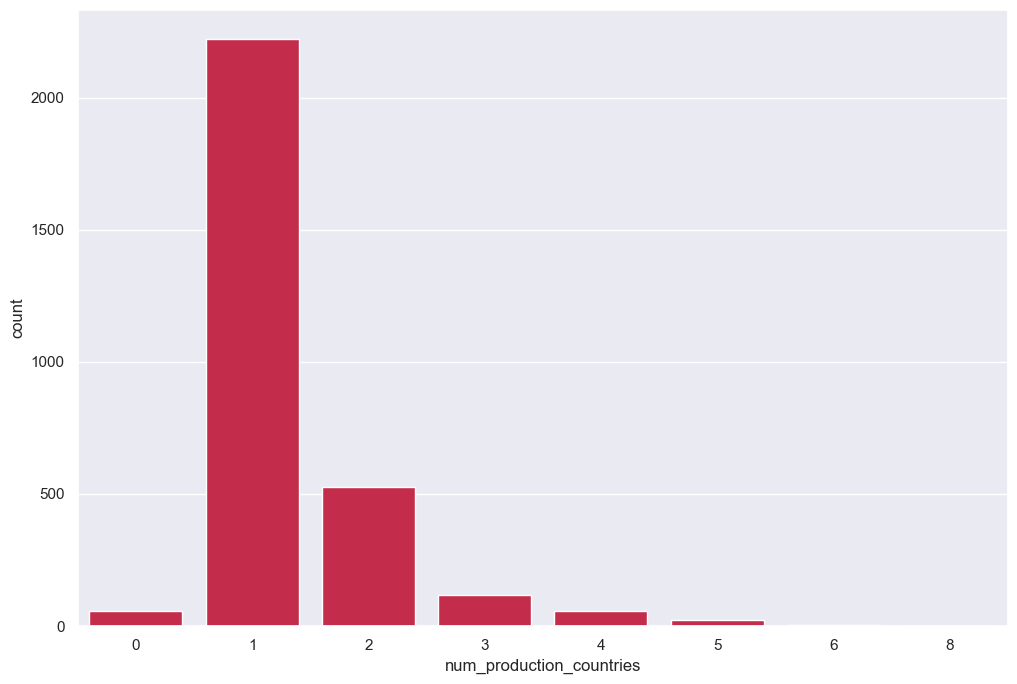

In [63]:
train.production_countries = train.production_countries.fillna("")
train['production_countries_processed'] = train['production_countries'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

train['num_production_countries'] = train['production_countries_processed'].apply(lambda x: len(x))

test.production_countries = test.production_countries.fillna("")
test['production_countries_processed'] = test['production_countries'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

test['num_production_countries'] = test['production_countries_processed'].apply(lambda x: len(x))
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=train.num_production_countries, color='crimson')

<Axes: >

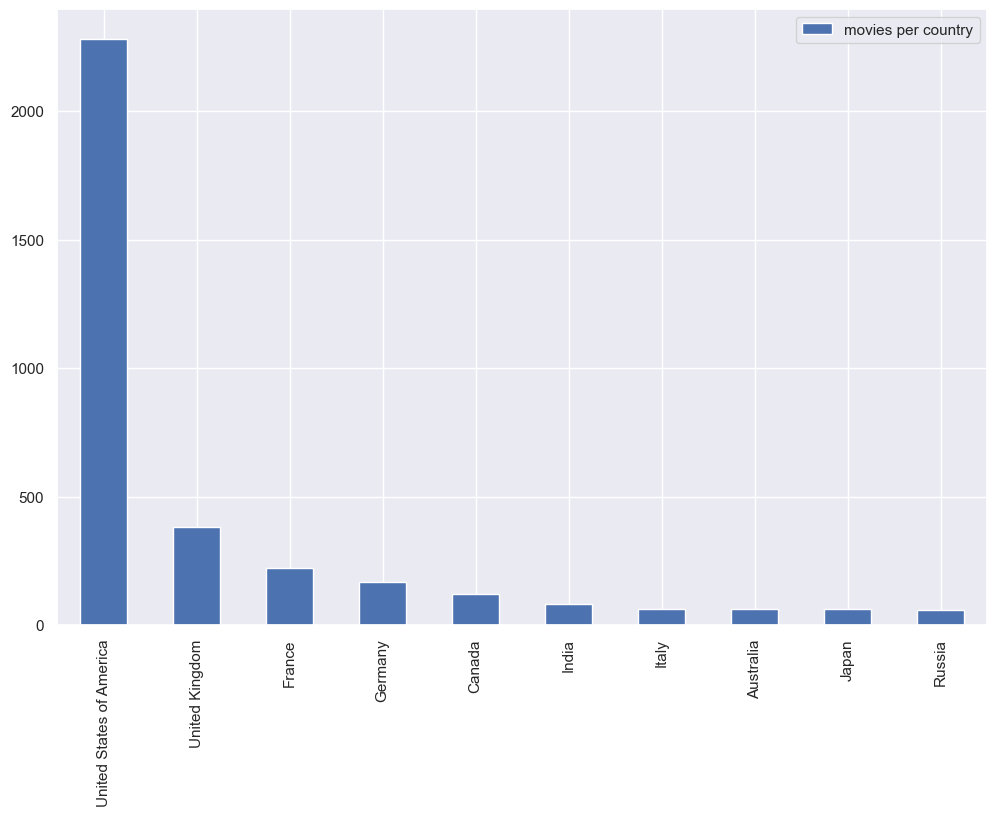

In [64]:
countriesDict = {}
for element in train["production_countries_processed"].values:
    for country in element:
        if country not in countriesDict:
            countriesDict[country] = 1
        else:
            countriesDict[country] += 1

countries_train = pd.DataFrame.from_dict(countriesDict, orient='index', columns=["movies per country"])
countries_train.sort_values(by="movies per country", ascending=False).head(10).plot.bar()

In [65]:
#Creating new feature
train['usa_produced'] = train.production_countries_processed.apply(lambda x: 1 if 'United States of America' in x else 0)
test['usa_produced'] = test.production_countries_processed.apply(lambda x: 1 if 'United States of America' in x else 0)
train['usa_produced'].value_counts()

usa_produced
1    2282
0     718
Name: count, dtype: int64

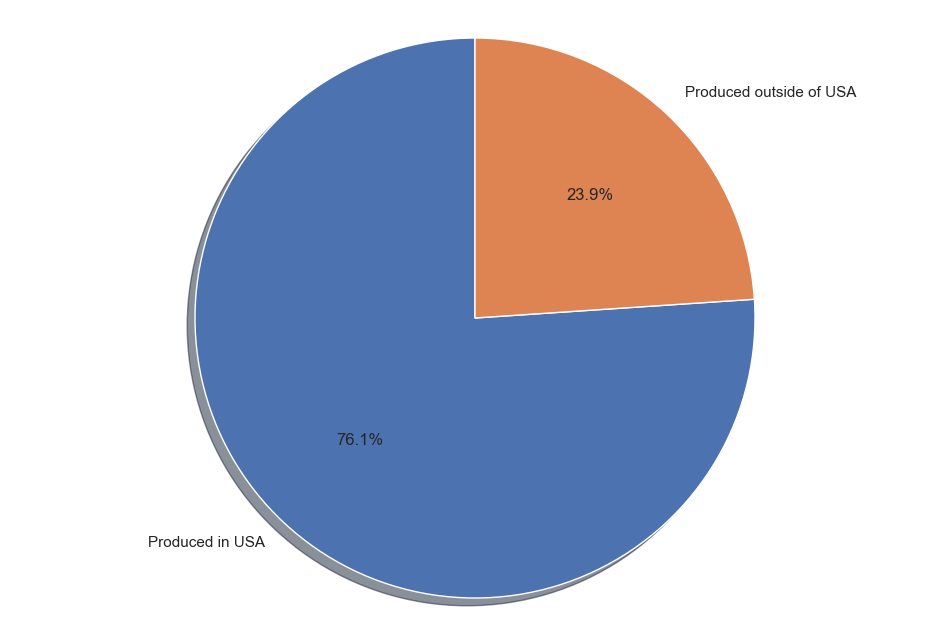

In [66]:
# plotting has a homepage data
labels = 'Produced in USA', 'Produced outside of USA'
btc_1 = [sum(train.usa_produced), (train.usa_produced == 0).sum(axis=0)]


fig, ax = plt.subplots()
ax.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax.axis('equal') # ensures chart is a circle

plt.show()                                        


# Bivariate Analysis

Text(0.5, 1.0, 'Revenue based on number of production countries')

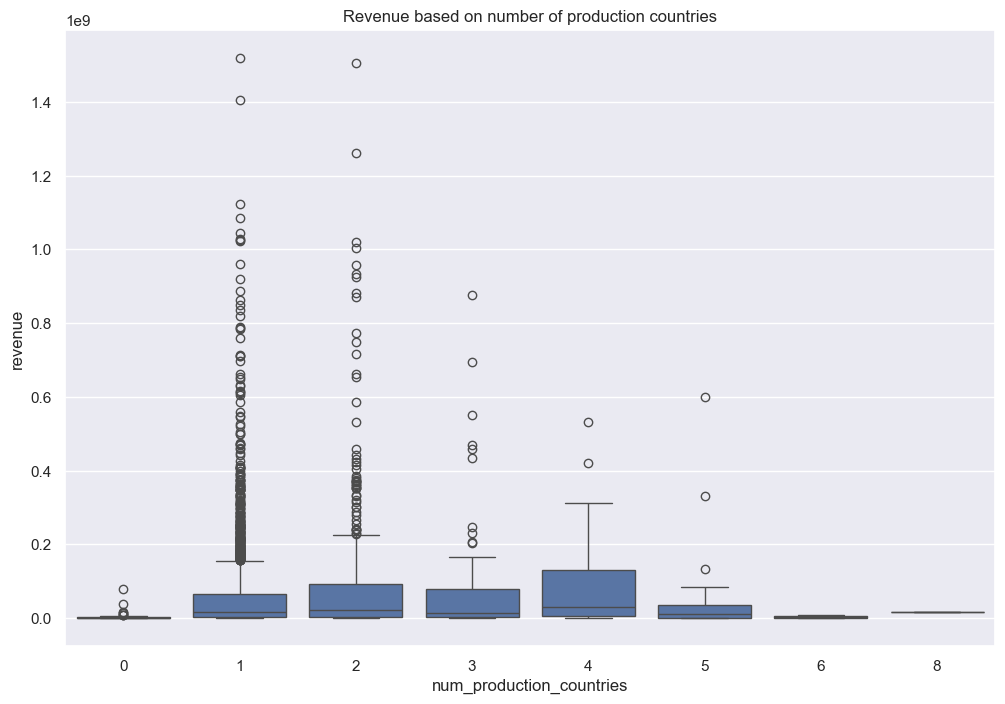

In [67]:
sns.boxplot(x='num_production_countries', y='revenue', data=train)
plt.title('Revenue based on number of production countries')

In [68]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['num_production_countries'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.053


The figure layout has changed to tight


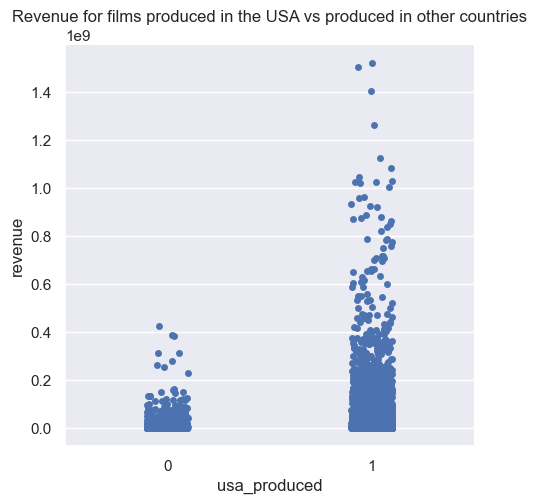

In [69]:
sns.catplot(x='usa_produced', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [70]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['usa_produced'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.198


# Release Date

In [71]:
# release date data manipulation
# naming a date-specific dataframe for housekeeping
train_date = train['release_date']

# converting to datetime format, with .dt used for accessing quantities
train_date = pd.to_datetime(train_date)
train_date.dt
print(train_date)

0      2015-02-20
1      2004-08-06
2      2014-10-10
3      2012-03-09
4      2009-02-05
          ...    
2995   1994-04-22
2996   2013-03-28
2997   1996-10-11
2998   2004-01-16
2999   2011-09-22
Name: release_date, Length: 3000, dtype: datetime64[ns]


Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [72]:
# possible output options
print(train_date.dt.year) # absolutely necessary
print(train_date.dt.dayofweek) # friday night hits!
print(train_date.dt.dayofyear) # it's a christmas miracle


0       2015
1       2004
2       2014
3       2012
4       2009
        ... 
2995    1994
2996    2013
2997    1996
2998    2004
2999    2011
Name: release_date, Length: 3000, dtype: int32
0       4
1       4
2       4
3       4
4       3
       ..
2995    4
2996    3
2997    4
2998    4
2999    3
Name: release_date, Length: 3000, dtype: int32
0        51
1       219
2       283
3        69
4        36
       ... 
2995    112
2996     87
2997    285
2998     16
2999    265
Name: release_date, Length: 3000, dtype: int32


In [73]:
print(train.release_date.describe())
print()
print(train_date.dt.year.describe())

count        3000
unique       2398
top       9/10/10
freq            5
Name: release_date, dtype: object

count    3000.000000
mean     2005.579667
std        16.453142
min      1973.000000
25%      1996.000000
50%      2006.000000
75%      2012.000000
max      2072.000000
Name: release_date, dtype: float64


# Univariate Analysis



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Year of Release Date by Number of Films')

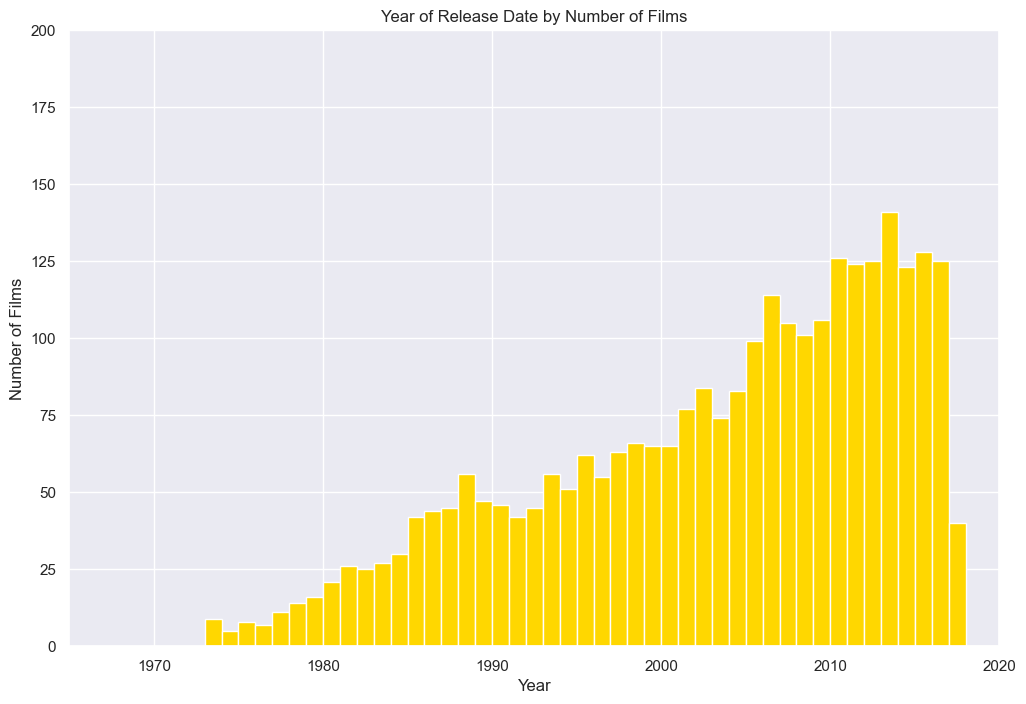

In [74]:
# plotting the year of the films release
fig, dx = plt.subplots()
sns.distplot(train_date.dt.year, bins=99, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(1965, 2020),ylim=(0,200))
dx.set_xlabel("Year")
dx.set_ylabel("Number of Films")
dx.set_title("Year of Release Date by Number of Films")



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

FixedFormatter should only be used together with FixedLocator


[Text(-1.0, 0, '−1'),
 Text(0.0, 0, 'Monday'),
 Text(1.0, 0, 'Tuesday'),
 Text(2.0, 0, 'Wednesday'),
 Text(3.0, 0, 'Thursday'),
 Text(4.0, 0, 'Friday'),
 Text(5.0, 0, 'Saturday'),
 Text(6.0, 0, 'Sunday'),
 Text(7.0, 0, '7')]

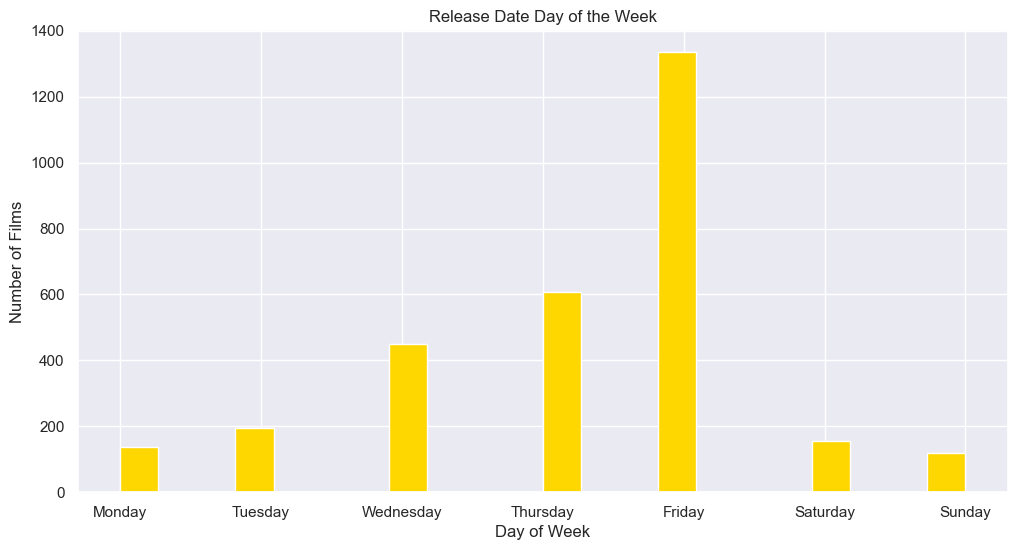

In [75]:
# plotting the films release day of the week
fig, ex = plt.subplots()
sns.distplot(train_date.dt.dayofweek, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

ex.set_xlabel("Day of Week")
ex.set_ylabel("Number of Films")
ex.set_title("Release Date Day of the Week")

labels = [item.get_text() for item in ex.get_xticklabels()]
labels[1] = 'Monday'
labels[2] = 'Tuesday'
labels[3] = 'Wednesday'
labels[4] = 'Thursday'
labels[5] = 'Friday'
labels[6] = 'Saturday'
labels[7] = 'Sunday'

ex.set_xticklabels(labels)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Release Date Day of the Year')

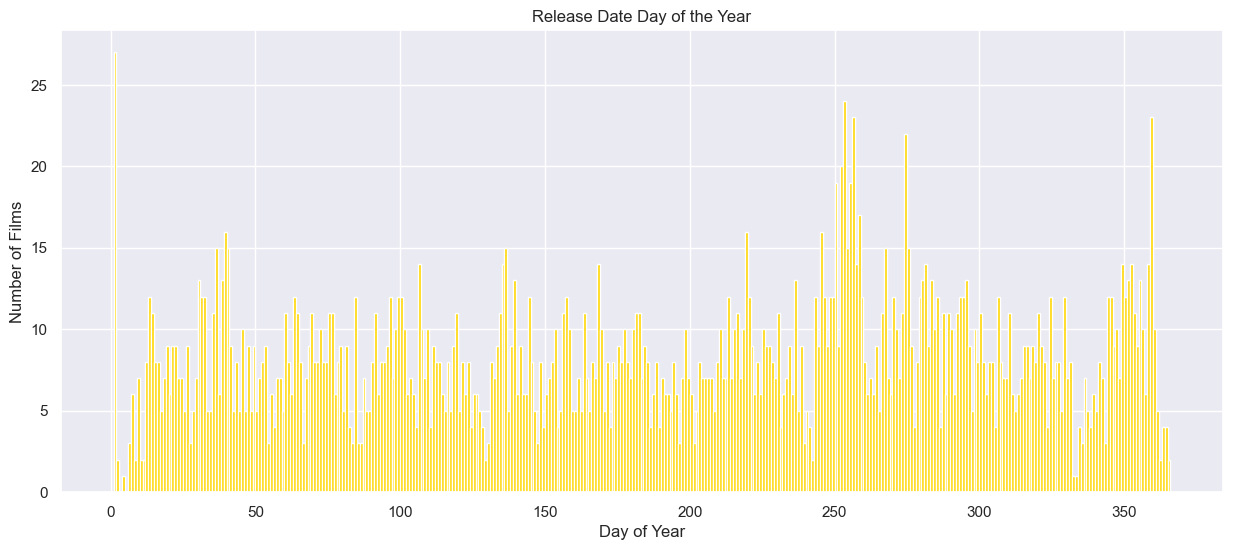

In [76]:
# plotting the films release day of the year
fig, fx = plt.subplots()
sns.distplot(train_date.dt.dayofyear, bins=365, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(15,6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Number of Films")
fx.set_title("Release Date Day of the Year")



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



Text(0.5, 1.0, 'Release Date Month of the Year')

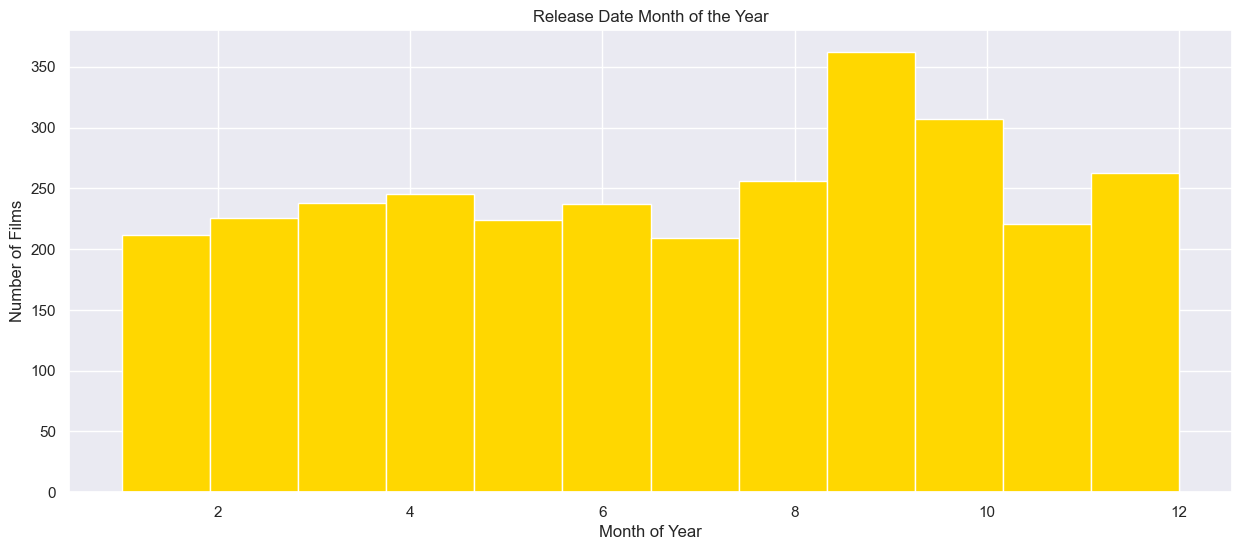

In [77]:
# plotting the films release month of the year
fig, hx = plt.subplots()
sns.distplot(train_date.dt.month, bins=12, kde=False, color='gold', hist_kws=dict(alpha=1))
sns.set(rc={'figure.figsize':(12,6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Number of Films")
hx.set_title("Release Date Month of the Year")

# Bivariate Analysis

FixedFormatter should only be used together with FixedLocator


[Text(0, 0, '1973'),
 Text(1, 0, '1974'),
 Text(2, 0, '1975'),
 Text(3, 0, '1976'),
 Text(4, 0, '1977'),
 Text(5, 0, '1978'),
 Text(6, 0, '1979'),
 Text(7, 0, '1980'),
 Text(8, 0, '1981'),
 Text(9, 0, '1982'),
 Text(10, 0, '1983'),
 Text(11, 0, '1984'),
 Text(12, 0, '1985'),
 Text(13, 0, '1986'),
 Text(14, 0, '1987'),
 Text(15, 0, '1988'),
 Text(16, 0, '1989'),
 Text(17, 0, '1990'),
 Text(18, 0, '1991'),
 Text(19, 0, '1992'),
 Text(20, 0, '1993'),
 Text(21, 0, '1994'),
 Text(22, 0, '1995'),
 Text(23, 0, '1996'),
 Text(24, 0, '1997'),
 Text(25, 0, '1998'),
 Text(26, 0, '1999'),
 Text(27, 0, '2000'),
 Text(28, 0, '2001'),
 Text(29, 0, '2002'),
 Text(30, 0, '2003'),
 Text(31, 0, '2004'),
 Text(32, 0, '2005'),
 Text(33, 0, '2006'),
 Text(34, 0, '2007'),
 Text(35, 0, '2008'),
 Text(36, 0, '2009'),
 Text(37, 0, '2010'),
 Text(38, 0, '2011'),
 Text(39, 0, '2012'),
 Text(40, 0, '2013'),
 Text(41, 0, '2014'),
 Text(42, 0, '2015'),
 Text(43, 0, '2016'),
 Text(44, 0, '2017'),
 Text(45, 0, '2021')

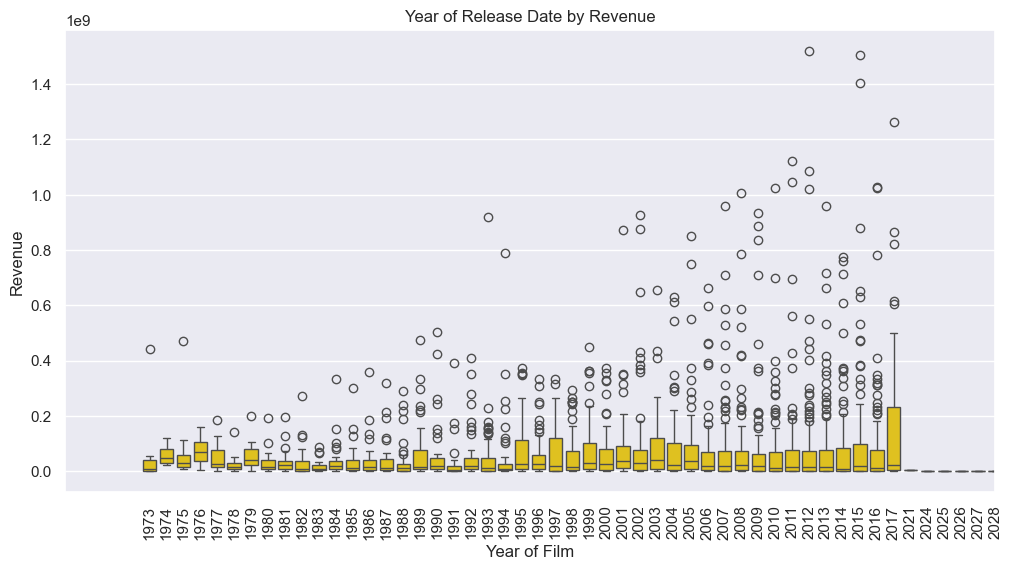

In [78]:
# bivariate year of release with revenue data
fig, dx = plt.subplots()
sns.boxplot(x=train_date.dt.year, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

dx.set(xlim=(-5, 50))
dx.set_xlabel("Year of Film")
dx.set_ylabel("Revenue")
dx.set_title("Year of Release Date by Revenue")

dx.set_xticklabels(dx.get_xticklabels(), rotation=90)

Text(0.5, 1.0, 'Release Date Day of the Year by Revenue')

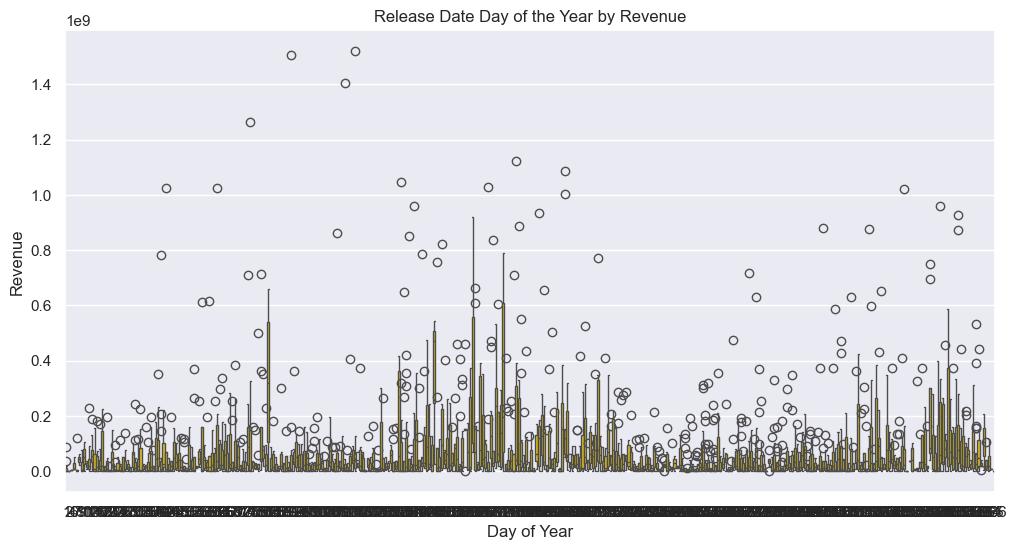

In [79]:
# bivariate day of year of release with revenue data
# WIP
fig, fx = plt.subplots()
sns.boxplot(x=train_date.dt.dayofyear, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

fx.set_xlabel("Day of Year")
fx.set_ylabel("Revenue")
fx.set_title("Release Date Day of the Year by Revenue")

Text(0.5, 1.0, 'Release Date Month by Revenue')

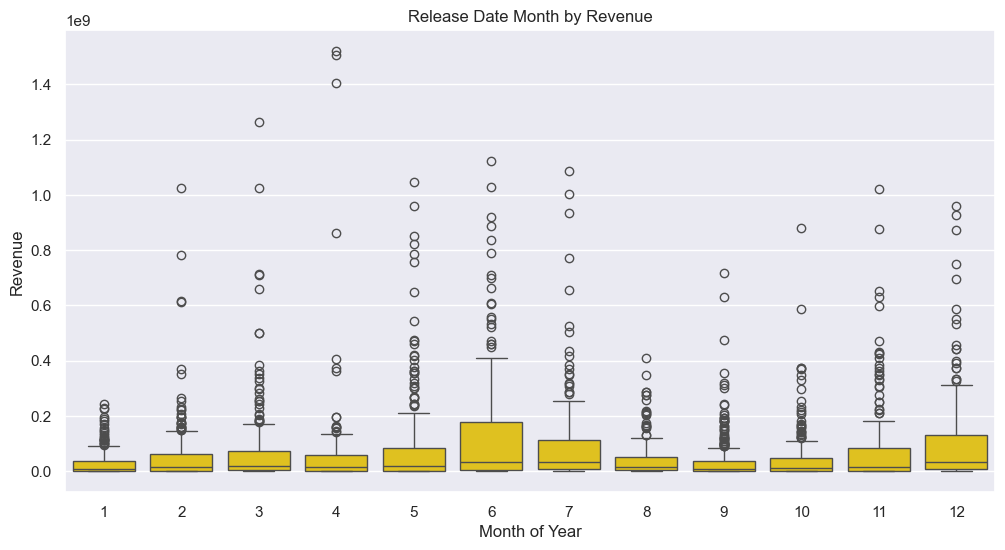

In [80]:
fig, hx = plt.subplots()
sns.boxplot(x=train_date.dt.month, y=train['revenue'], color='gold')
sns.set(rc={'figure.figsize':(12, 6)})

hx.set_xlabel("Month of Year")
hx.set_ylabel("Revenue")
hx.set_title("Release Date Month by Revenue")

In [81]:
train["release_date"] = train["release_date"].fillna(train["release_date"].mode()[0])
test["release_date"] = test["release_date"].fillna(train["release_date"].mode()[0])

train['temp'] = train.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))
test['temp'] = test.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train["month"] = train.temp.apply(lambda x: x.month)
test["month"] = test.temp.apply(lambda x: x.month)

train["season"] = train["month"]%4
test["season"] = test["month"]%4

train["year"] = train.temp.apply(lambda x: x.year)
test["year"] = test.temp.apply(lambda x: x.year)

train["day_of_week"] = train.temp.apply(lambda x: x.weekday()+1)
test["day_of_week"] = test.temp.apply(lambda x: x.weekday()+1)

train["week_of_year"] = train.temp.apply(lambda x: x.isocalendar()[1])
test["week_of_year"] = test.temp.apply(lambda x: x.isocalendar()[1])


train = train.drop(['temp'], axis=1)
test = test.drop(['temp'], axis=1)


train["day_of_week"] = train["day_of_week"].fillna(train["day_of_week"].mode()[0])
test["day_of_week"] = test["day_of_week"].fillna(train["day_of_week"].mode()[0])

train["year"] = train["year"].fillna(train["year"].mode()[0])
test["year"] = test["year"].fillna(train["year"].mode()[0])

train["month"] = train["month"].fillna(train["month"].mode()[0])
test["month"] = test["month"].fillna(train["month"].mode()[0])

train["week_of_year"] = train["week_of_year"].fillna(train["week_of_year"].mode()[0])
test["week_of_year"] = test["week_of_year"].fillna(train["week_of_year"].mode()[0])

train["season"] = train["season"].fillna(train["season"].mode()[0])
test["season"] = test["season"].fillna(train["season"].mode()[0])

train[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()


release_date  month  year  day_of_week  week_of_year  season
0      2/20/15      2  2015            5             8       2
1       8/6/04      8  2004            5            32       0
2     10/10/14     10  2014            5            41       2
3       3/9/12      3  2012            5            10       3
4       2/5/09      2  2009            4             6       2

In [82]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['day_of_week'], train['revenue'])
print('Pearsons correlation between day_of_week and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['day_of_week']), np.log1p(train['revenue']))
print('Pearsons correlation between day_of_week and revenue: %.3f' % corr)
print()

#analysis of correlation and create log feature
corr, _ = pearsonr(train['year'], train['revenue'])
print('Pearsons correlation between year and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['year']), np.log1p(train['revenue']))
print('Pearsons correlation between year and revenue: %.3f' % corr)
print()

#analysis of correlation and create log feature
corr, _ = pearsonr(train['month'], train['revenue'])
print('Pearsons correlation between month and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['month']), np.log1p(train['revenue']))
print('Pearsons correlation between month and revenue: %.3f' % corr)
print()

#analysis of correlation and create log feature
corr, _ = pearsonr(train['week_of_year'], train['revenue'])
print('Pearsons correlation between week_of_year and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['week_of_year']), np.log1p(train['revenue']))
print('Pearsons correlation between week_of_year and revenue: %.3f' % corr)
print()

#analysis of correlation and create log feature
corr, _ = pearsonr(train['season'], train['revenue'])
print('Pearsons correlation between season and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['season']), np.log1p(train['revenue']))
print('Pearsons correlation between season and revenue: %.3f' % corr)

Pearsons correlation between day_of_week and revenue: -0.141
Pearsons correlation between day_of_week and revenue: -0.023

Pearsons correlation between year and revenue: 0.021
Pearsons correlation between year and revenue: -0.072

Pearsons correlation between month and revenue: 0.020
Pearsons correlation between month and revenue: 0.041

Pearsons correlation between week_of_year and revenue: 0.017
Pearsons correlation between week_of_year and revenue: 0.030

Pearsons correlation between season and revenue: 0.053
Pearsons correlation between season and revenue: -0.007


# Runtime

In [83]:
#runtime
print('Movies missing a runtime:',train.runtime.isna().sum())

Movies missing a runtime: 2


In [84]:
#pre-processing
train.runtime = train.runtime.fillna(train.runtime.median())



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



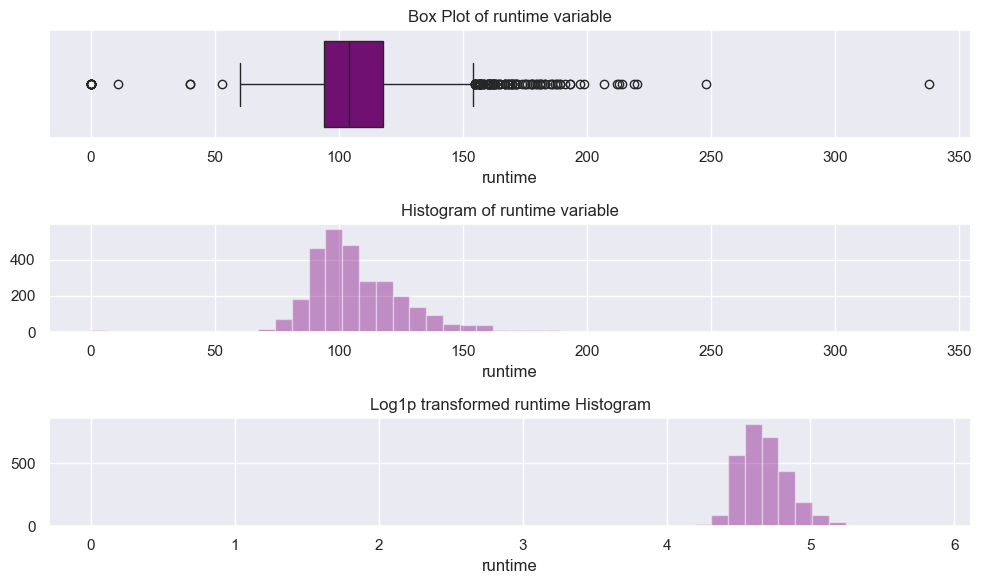

In [85]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.runtime, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime variable")
sns.distplot(a=train.runtime, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of runtime variable")
sns.distplot(a=np.log1p(train.runtime), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed runtime Histogram")
f.tight_layout()

In [86]:
train.loc[train['runtime'].argmax(), ['title', 'runtime']]

title      Carlos
runtime     338.0
Name: 1211, dtype: object

In [87]:
train = train.drop(train['runtime'].argmax())

In [88]:
print('Movies with runtime listed as 0: ',(train.runtime == 0).sum())

Movies with runtime listed as 0:  12


In [89]:
median = train.loc[train['runtime'] > 0, 'runtime'].median()
train["runtime_processed"] = train["runtime"].mask(train["runtime"] == 0, median)
test["runtime_processed"] = test["runtime"].mask(train["runtime"] == 0, median)



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



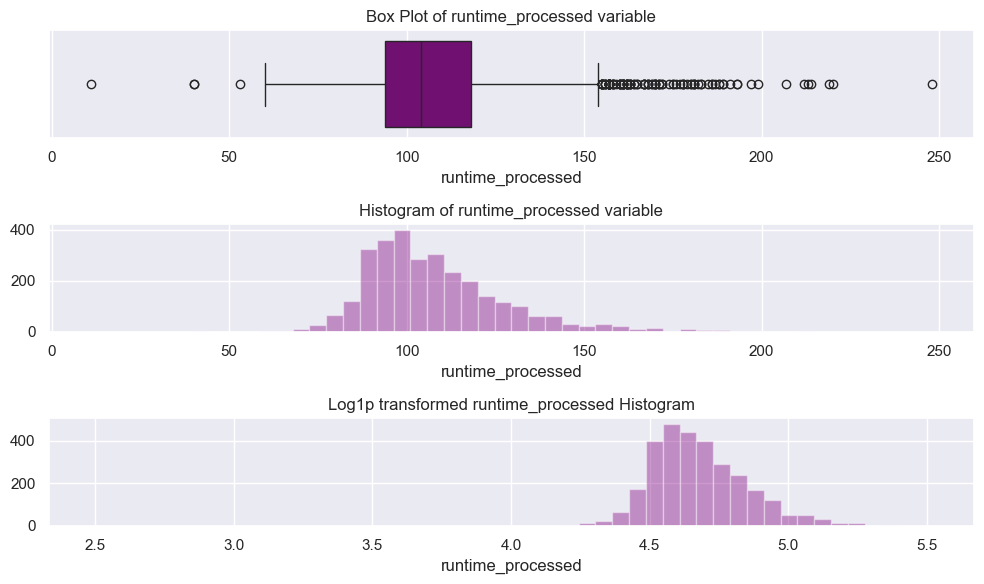

In [90]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.runtime_processed, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of runtime_processed variable")
sns.distplot(a=train.runtime_processed, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of runtime_processed variable")
sns.distplot(a=np.log1p(train.runtime_processed), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed runtime_processed Histogram")
f.tight_layout()

# Bivariate Analysis

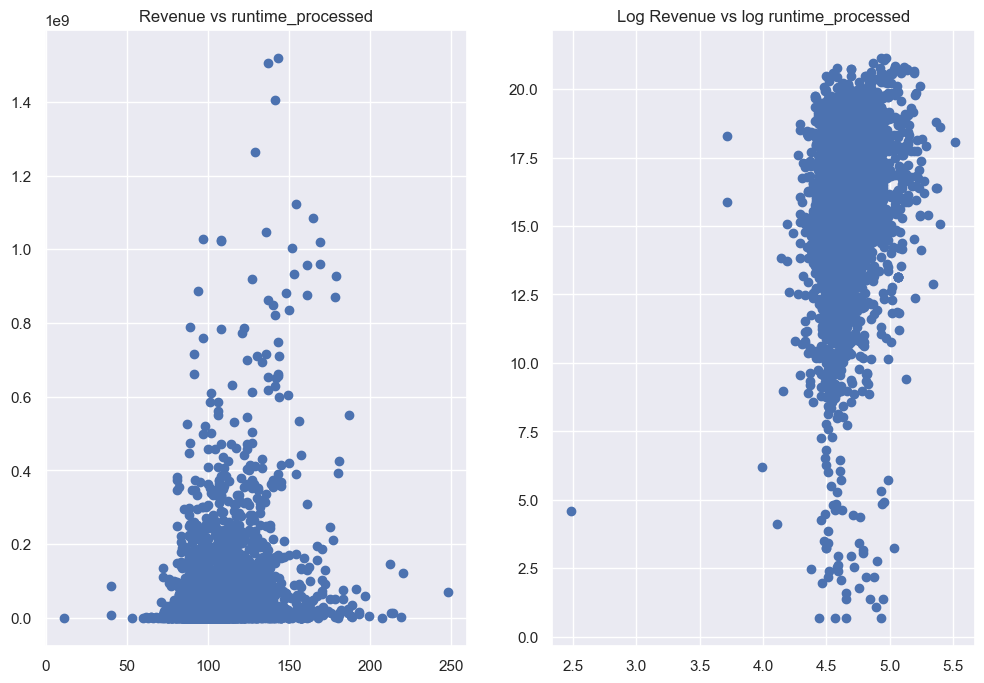

In [91]:
#### Bivariate Analysisplt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['runtime_processed'], train['revenue'])
plt.title('Revenue vs runtime_processed');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['runtime_processed']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log runtime_processed');

In [92]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['runtime_processed'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['runtime_processed']), np.log1p(train['revenue']))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.226
Pearsons correlation: 0.227


# Spoken Languages

In [93]:
# new column for a count of the number of spoken languages
train.spoken_languages = train.spoken_languages.fillna("")
train['spoken_languages_reform'] = train['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
train['num_languages'] = train.spoken_languages_reform.apply(lambda x: len(x))
print(train['num_languages'])


test.spoken_languages = test.spoken_languages.fillna("")
test['spoken_languages_reform'] = test['spoken_languages'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
test['num_languages'] = test.spoken_languages_reform.apply(lambda x: len(x))
print(test['num_languages'])

0       1
1       1
2       1
3       2
4       1
       ..
2995    1
2996    1
2997    1
2998    1
2999    1
Name: num_languages, Length: 2999, dtype: int64
0       2
1       1
2       1
3       3
4       1
       ..
4393    5
4394    1
4395    1
4396    1
4397    1
Name: num_languages, Length: 4398, dtype: int64


In [94]:
print(train.num_languages.describe())

count    2999.000000
mean        1.440814
std         0.872691
min         0.000000
25%         1.000000
50%         1.000000
75%         2.000000
max         9.000000
Name: num_languages, dtype: float64


# Univariate Analysis

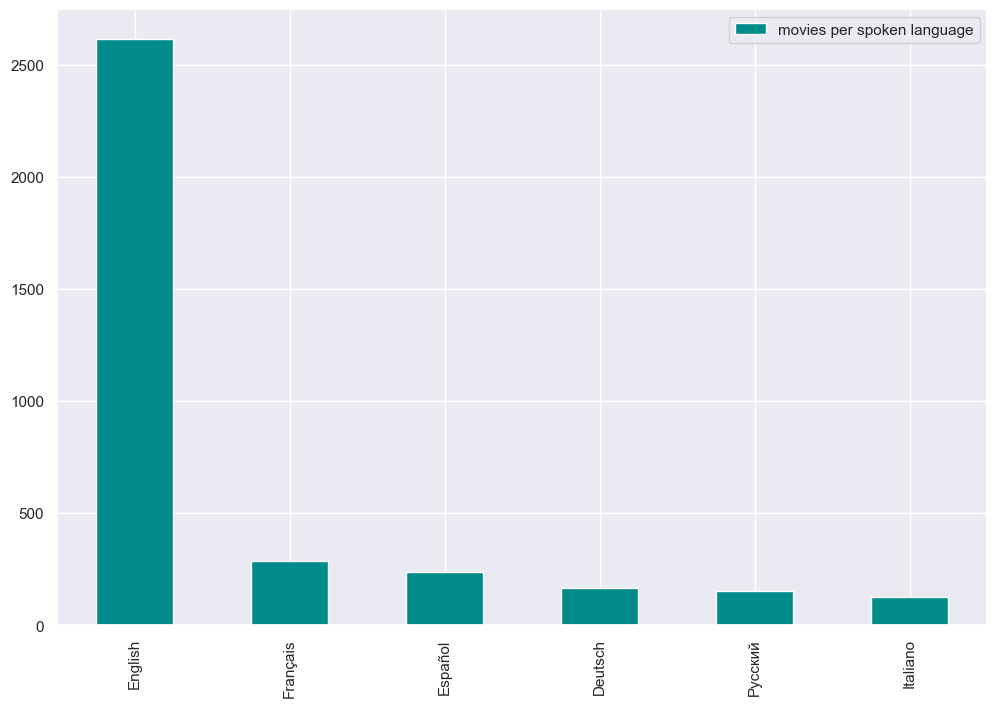

In [95]:
# univariate analysis of spoken languages
languagesDict = {}
for element in train["spoken_languages_reform"].values:
    for name in element:
        if name not in languagesDict:
            languagesDict[name] = 1
        else:
            languagesDict[name] += 1

languages_train = pd.DataFrame.from_dict(languagesDict, orient='index', columns=["movies per spoken language"])
languages_train.sort_values(by="movies per spoken language", ascending=False).head(6).plot.bar(color='darkcyan')

languages_train.columns = ["number_of_languages"]

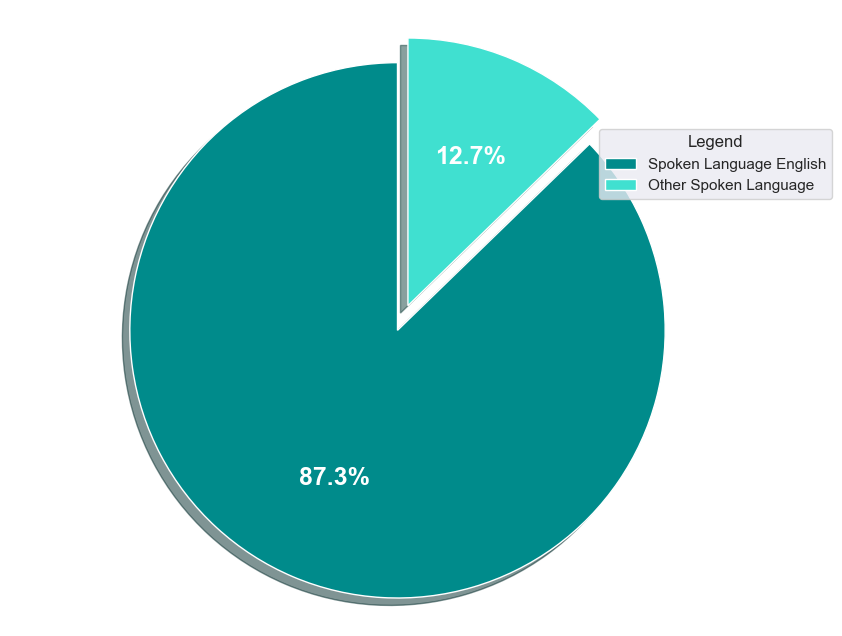

In [96]:
# spoken languages (english vs non-english)
train['lang'] = train['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)
test['lang'] = test['spoken_languages_reform'].apply(lambda x: 1 if 'English' in x else 0)

lang = [sum(train.lang), (train.lang == 0).sum(axis=0)]
lang_test = [sum(test.lang), (test.lang == 0).sum(axis=0)]

labels = 'Spoken Language English', 'Other Spoken Language'
explode = (0.1, 0)

# plot
colors = ["darkcyan", "turquoise"]

fig, ix = plt.subplots(figsize=(10, 8))
ix.pie(lang, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize':18, 'weight':"bold"})
ix.axis('equal')

ix.legend(labels,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(0.75, 0.25, 0.5, 1))

# Bivariate Analysis

eng
English is Spoken Language        2617
English is Not Spoken Language     382
Name: count, dtype: int64
eng
English is Spoken Language        3831
English is Not Spoken Language     567
Name: count, dtype: int64




Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0.5, 0, 'Language Status')

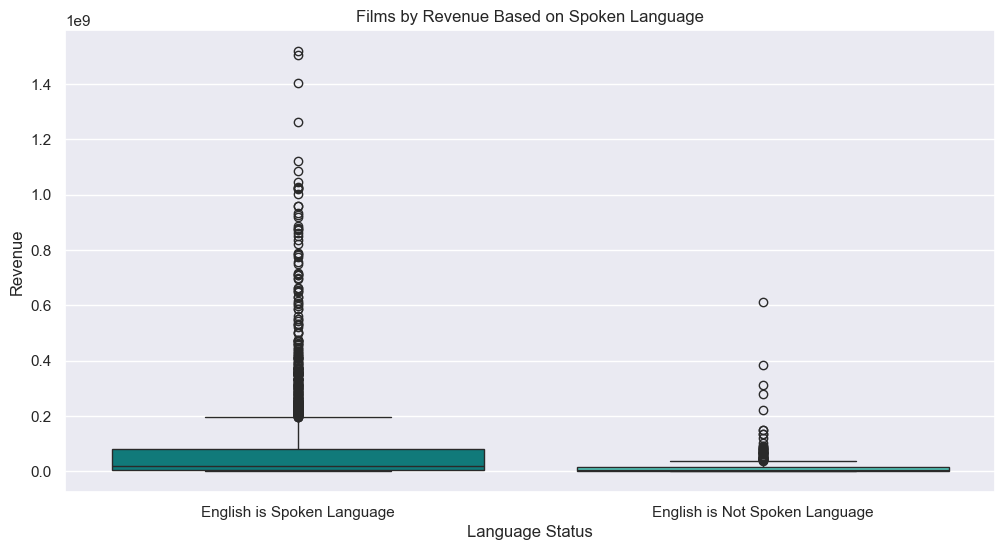

In [97]:
# bivariate analysis of revenue with english as spoken language
train['eng'] = train['lang'].apply(lambda x: 'English is Spoken Language' if x == 1 else 'English is Not Spoken Language')
print(train['eng'].value_counts())

test['eng'] = test['lang'].apply(lambda x: 'English is Spoken Language' if x == 1 else 'English is Not Spoken Language')
print(test['eng'].value_counts())

pal2 = ["darkcyan", "turquoise"]

sns.set(rc={'figure.figsize':(12, 6)})
sns.boxplot(x='eng', y='revenue', data=train, palette=pal2)
plt.title('Films by Revenue Based on Spoken Language')
plt.ylabel("Revenue")
plt.xlabel("Language Status")

In [98]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['lang'], train['revenue'])
print('Pearsons correlation between lang and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['lang']), np.log1p(train['revenue']))
print('Pearsons correlation between lang and revenue: %.3f' % corr)

Pearsons correlation between lang and revenue: 0.135
Pearsons correlation between lang and revenue: 0.229


In [99]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_languages'], train['revenue'])
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_languages']), np.log1p(train['revenue']))
print('Pearsons correlation between num_languages and revenue: %.3f' % corr)

Pearsons correlation between num_languages and revenue: 0.067
Pearsons correlation between num_languages and revenue: 0.124


# Status

In [100]:
#status
print(train.status.value_counts())

status
Released    2995
Rumored        4
Name: count, dtype: int64


# Tagline

In [101]:
print('Movies missing keywords:', train.tagline.isna().sum())

Movies missing keywords: 597


In [102]:
train['has_tagline'] = train.tagline.apply(lambda x: 1 if type(x) == str else 0)
test['has_tagline'] = test.tagline.apply(lambda x: 1 if type(x) == str else 0)

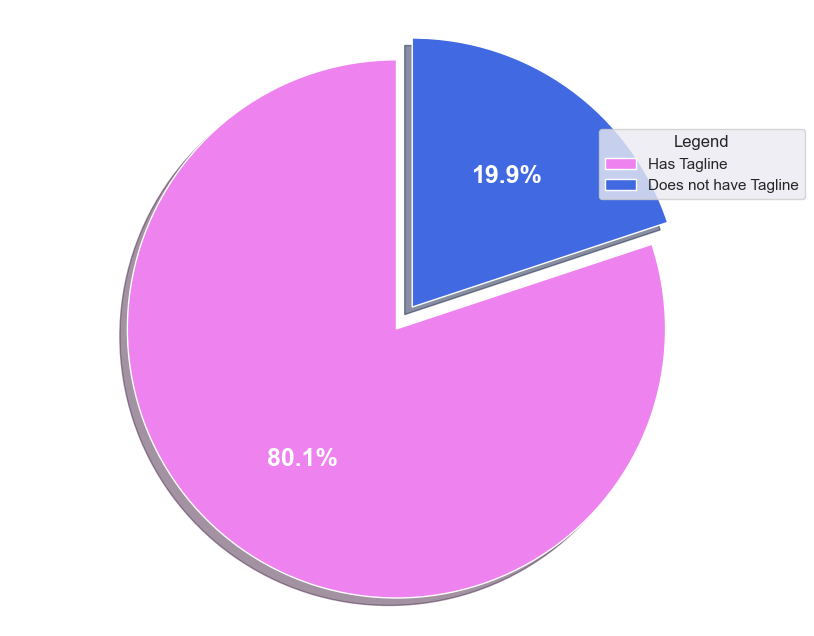

In [103]:
# plotting belongs to collection data
labels = 'Has Tagline', 'Does not have Tagline'
btc_1 = [sum(train.has_tagline), (train.has_tagline == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['violet', 'royalblue']

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 18, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(0.75, 0.25, 0.5, 1))

# Bivariate Analysis



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0.5, 0, 'Tagline Exists')

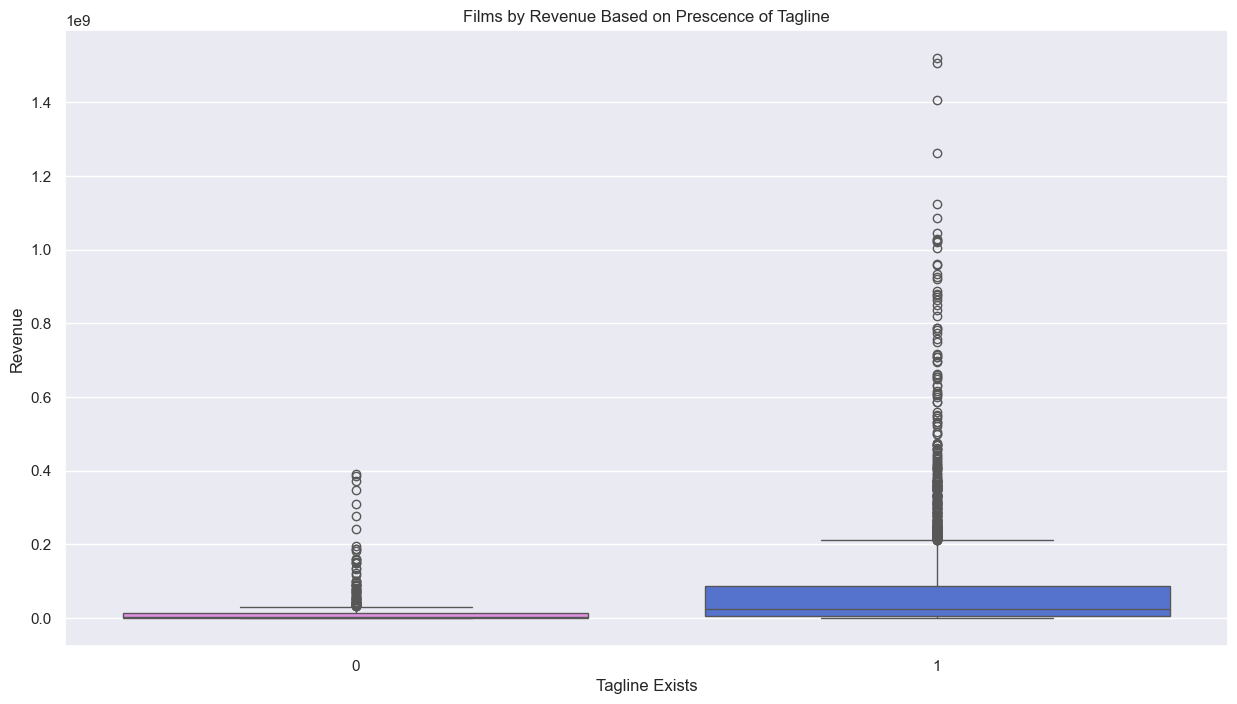

In [104]:
pal1 = ['violet', 'royalblue']

sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='has_tagline', y='revenue', data=train, palette=pal1)
plt.title('Films by Revenue Based on Prescence of Tagline')
plt.ylabel("Revenue")
plt.xlabel("Tagline Exists")

The figure layout has changed to tight


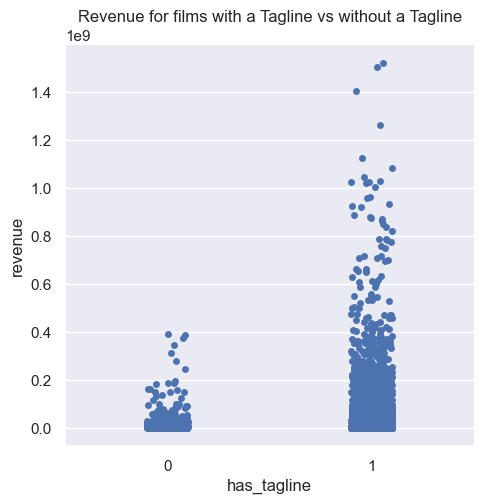

In [105]:
sns.catplot(x='has_tagline', y='revenue', data=train);
plt.title('Revenue for films with a Tagline vs without a Tagline');

In [106]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['has_tagline'], train['revenue'])
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)
corr, _ = pearsonr(train['has_tagline'], np.log1p(train['revenue']))
print('Pearsons correlation between has_tagline and revenue: %.3f' % corr)

Pearsons correlation between has_tagline and revenue: 0.180
Pearsons correlation between has_tagline and revenue: 0.320


# Title

In [107]:
print('Movies missing a title:',train.title.isna().sum())

Movies missing a title: 0


In [108]:
train.title.fillna('')
test.title.fillna('')
train['title_len'] = train.title.apply(lambda x: len(str(x)))
test['title_len'] = test.title.apply(lambda x: len(str(x)))



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



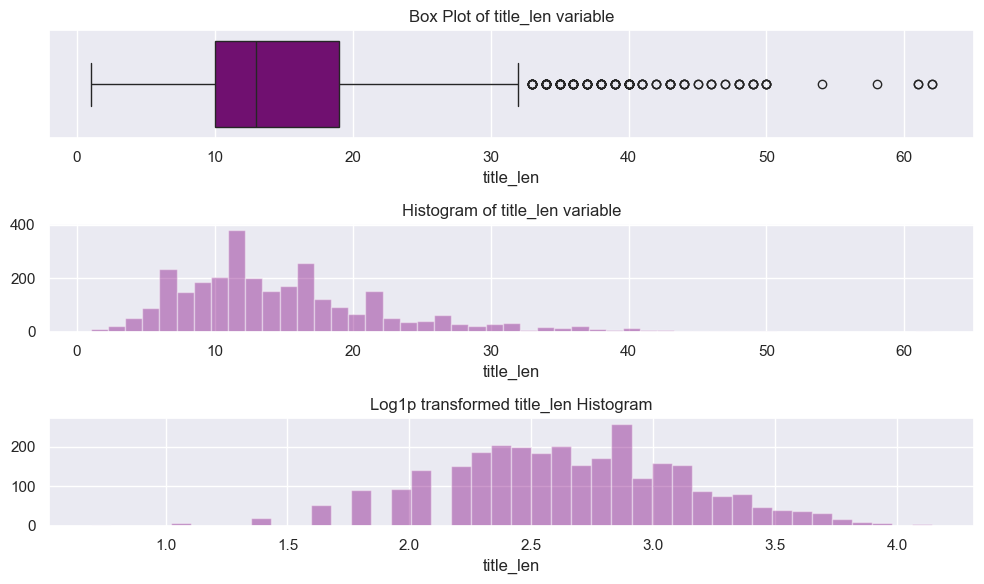

In [109]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.title_len, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of title_len variable")
sns.distplot(a=train.title_len, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of title_len variable")
sns.distplot(a=np.log1p(train.title_len), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed title_len Histogram")
f.tight_layout()

# Bivariate Analysis

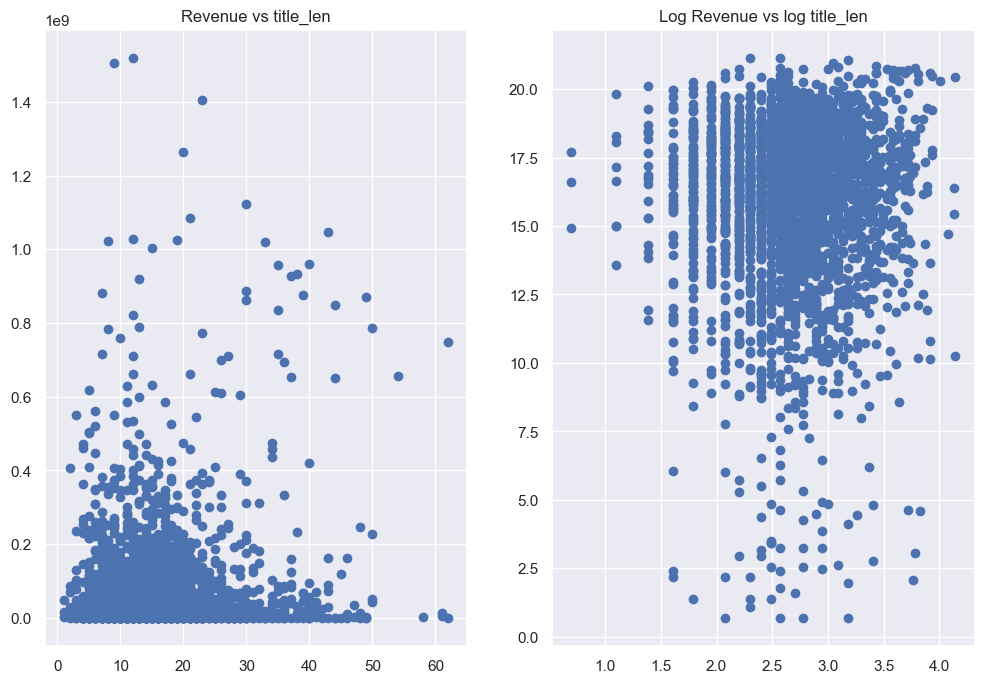

In [110]:
#### Bivariate Analysisplt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['title_len'], train['revenue'])
plt.title('Revenue vs title_len');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['title_len']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log title_len');

In [111]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['title_len'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.110


# Keywords

In [112]:
print('Movies missing keywords:', train.Keywords.isna().sum())

Movies missing keywords: 276


In [113]:
train['has_keywords'] = train.Keywords.apply(lambda x: 1 if type(x) == str else 0)
test['has_keywords'] = test.Keywords.apply(lambda x: 1 if type(x) == str else 0)

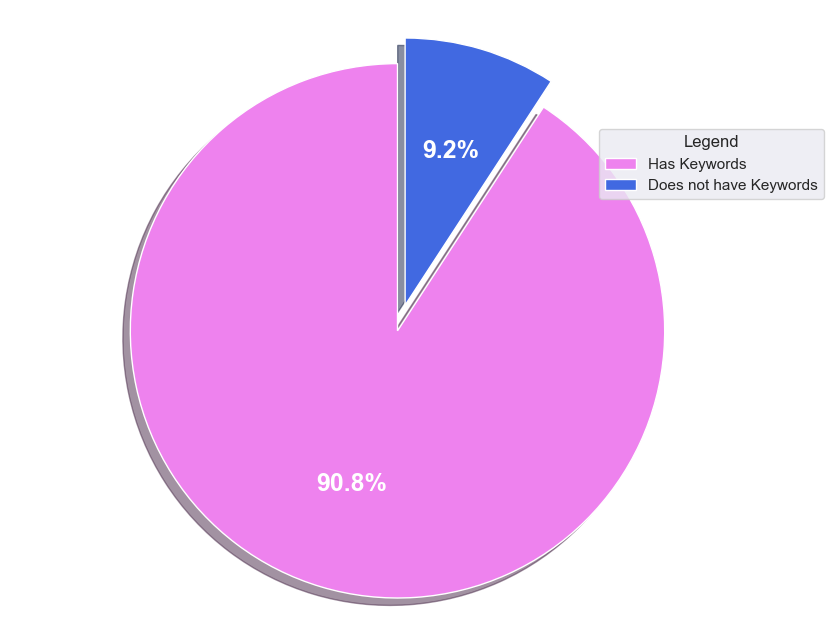

In [114]:
# plotting belongs to collection data
labels = 'Has Keywords', 'Does not have Keywords'
btc_1 = [sum(train.has_keywords), (train.has_keywords == 0).sum(axis=0)]
explode = (0.1, 0)

colors = ['violet', 'royalblue']

# plot
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(btc_1, explode=explode, autopct='%1.1f%%', shadow=True, startangle=90, colors=colors, textprops={'color':"w", 'fontsize': 18, 'weight':"bold"})
ax.axis('equal') # ensures chart is a circle

ax.legend(labels,
          title="Legend",
          loc="center left",
          bbox_to_anchor=(0.75, 0.25, 0.5, 1))

# Bivariate Analysis



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.



Text(0.5, 0, 'Keywords Exist')

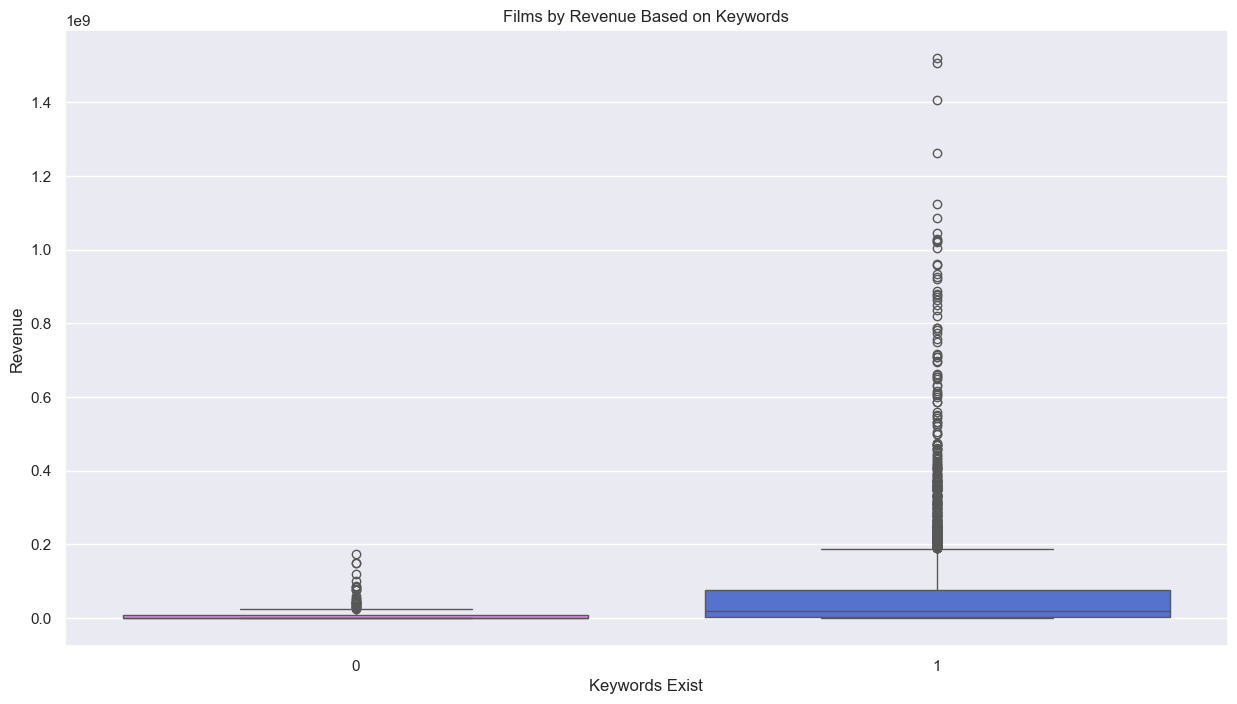

In [115]:
pal1 = ['violet', 'royalblue']

sns.set(rc={'figure.figsize':(15, 8)})
sns.boxplot(x='has_keywords', y='revenue', data=train, palette=pal1)
plt.title('Films by Revenue Based on Keywords')
plt.ylabel("Revenue")
plt.xlabel("Keywords Exist")

The figure layout has changed to tight


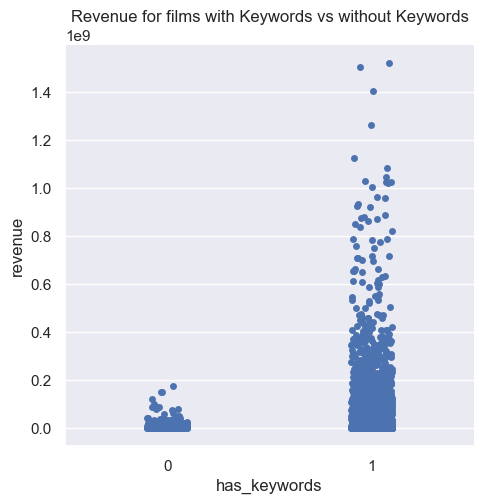

In [116]:
sns.catplot(x='has_keywords', y='revenue', data=train);
plt.title('Revenue for films with Keywords vs without Keywords');

In [117]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['has_keywords'], train['revenue'])
print('Pearsons correlation between has_keywords and revenue: %.3f' % corr)
corr, _ = pearsonr(train['has_keywords'], np.log1p(train['revenue']))
print('Pearsons correlation between has_keywords and revenue: %.3f' % corr)

Pearsons correlation between has_keywords and revenue: 0.129
Pearsons correlation between has_keywords and revenue: 0.251


# Cast --Reorder Section

In [118]:
print('Movies missing a cast:',train.cast.isna().sum())

Movies missing a cast: 13


In [119]:
#pre-processing
train.cast = train.cast.fillna("")
train['cast_processed'] = train['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))
test.cast = test.cast.fillna("")
test['cast_processed'] = test['cast'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))

In [120]:
train['num_cast'] = train['cast_processed'].apply(lambda x: len(x))
test['num_cast'] = test['cast_processed'].apply(lambda x: len(x))
train['num_cast'].value_counts()

num_cast
15     204
16     158
10     136
14     133
13     129
      ... 
120      1
77       1
79       1
85       1
92       1
Name: count, Length: 105, dtype: int64



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



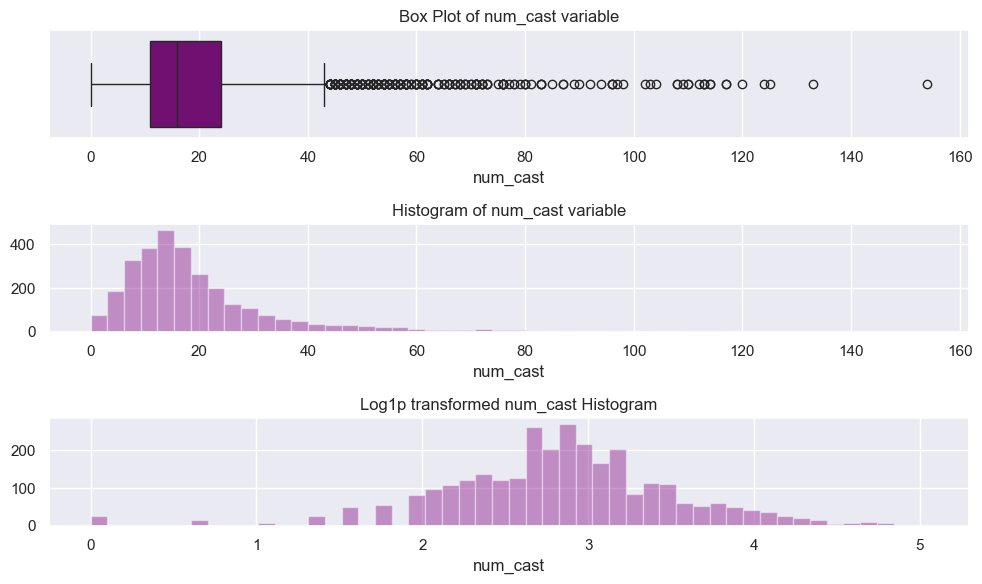

In [121]:
f, ax = plt.subplots(3, figsize=(10,6))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train.num_cast, ax = ax[0], color='purple')
ax[0].set_title("Box Plot of num_cast variable")
sns.distplot(a=train.num_cast, kde = False, ax = ax[1], color='purple')
ax[1].set_title("Histogram of num_cast variable")
sns.distplot(a=np.log1p(train.num_cast), kde = False, ax = ax[2], color='purple')
ax[2].set_title("Log1p transformed num_cast Histogram")
f.tight_layout()


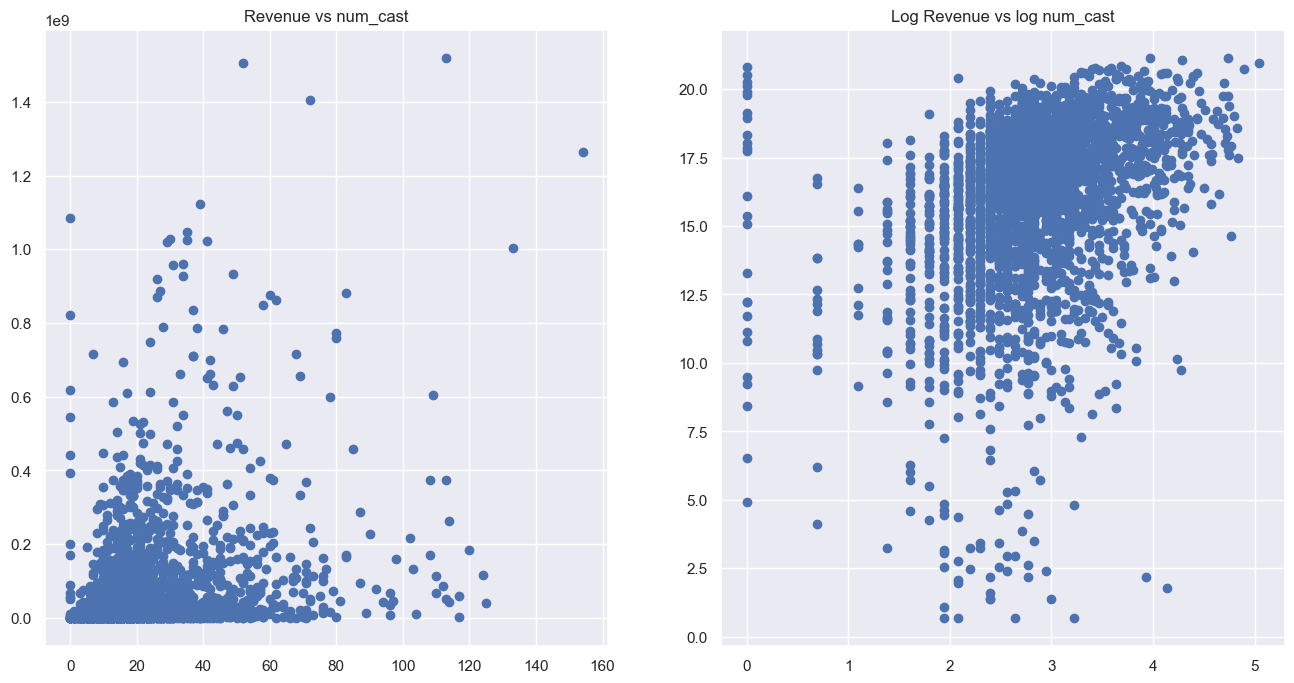

In [122]:
plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.scatter(train['num_cast'], train['revenue'])
plt.title('Revenue vs num_cast');
plt.subplot(1, 2, 2)
plt.scatter(np.log1p(train['num_cast']), np.log1p(train['revenue']))
plt.title('Log Revenue vs log num_cast');

In [123]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['num_cast'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_cast']), np.log1p(train['revenue']))
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.336
Pearsons correlation: 0.360


In [124]:
train['log_num_cast'] =  np.log1p(train['num_cast'])
test['log_num_cast'] =  np.log1p(test['num_cast'])

<Axes: >

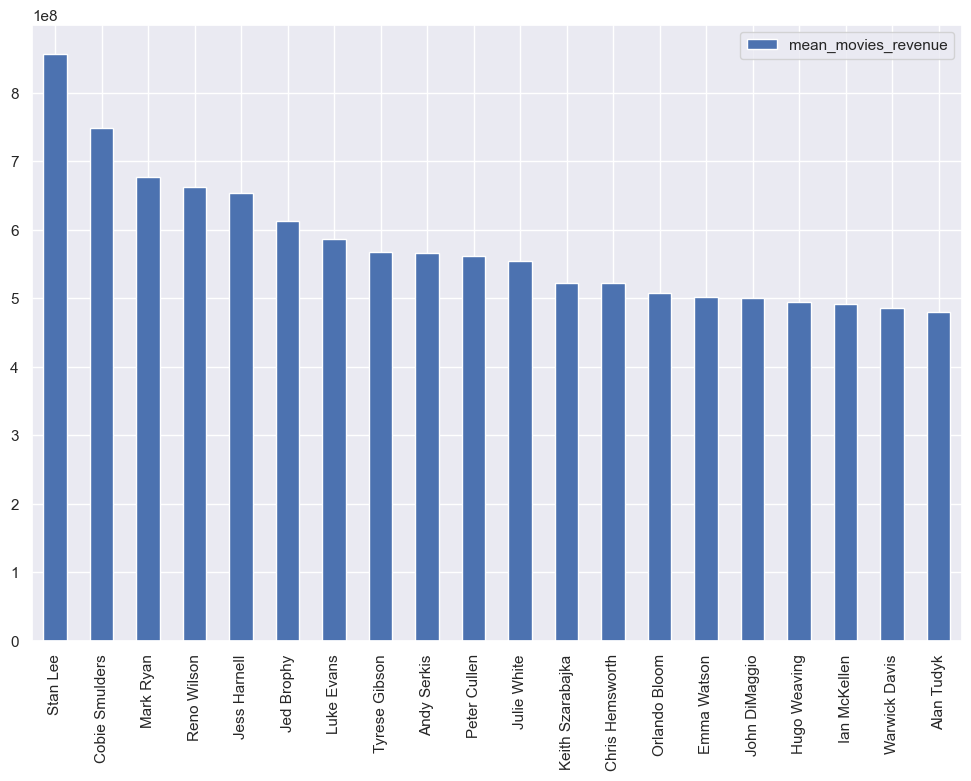

In [125]:
actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
    
    for actor in element[1]:
        if actor not in actorsDict:
            actorsDict[actor] = [element[0], 1]
        else:
            actorsDict[actor][0] += element[0]
            actorsDict[actor][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]

actors_train = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_train.sort_values(by="mean_movies_revenue", ascending=False).head(20).plot.bar()

<Axes: >

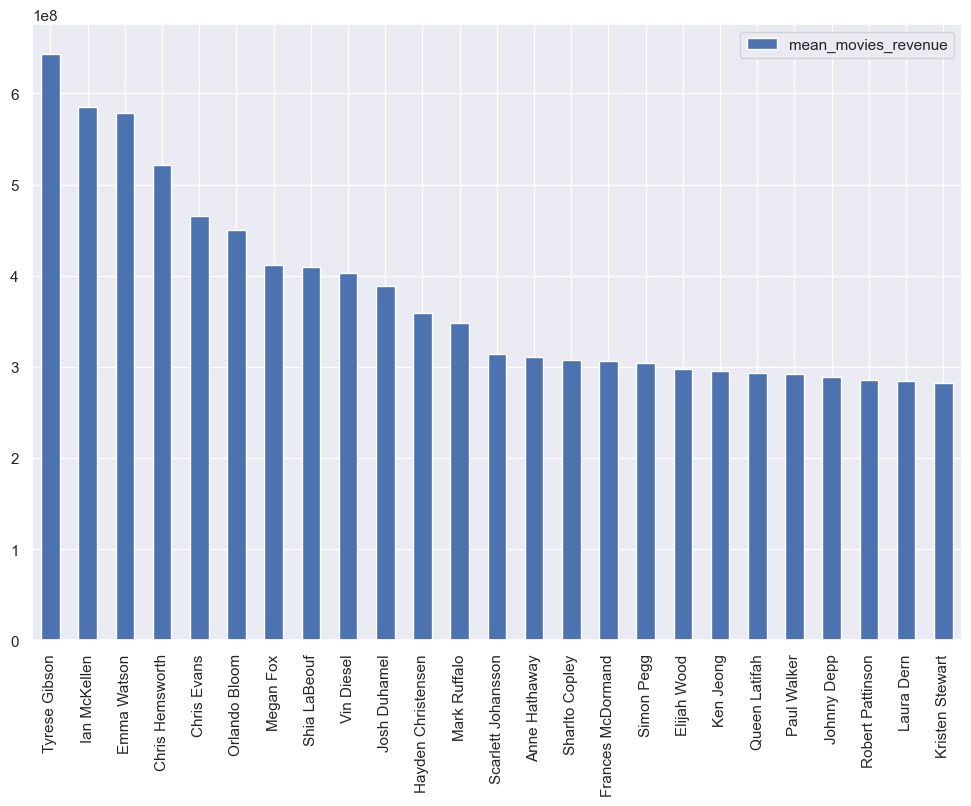

In [126]:
#cast

actorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 5
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in actorsDict:
            actorsDict[element[1][i]] = [element[0], 1]
        else:
            actorsDict[element[1][i]][0] += element[0]
            actorsDict[element[1][i]][1] += 1    

actorsDict = {k: v for k, v in actorsDict.items() if v[1] >= 5}

for actor in actorsDict:
    actorsDict[actor][0] = actorsDict[actor][0]/actorsDict[actor][1]
    actorsDict[actor] = actorsDict[actor][0]


    
    
actors_train = pd.DataFrame.from_dict(actorsDict, orient='index', columns=["mean_movies_revenue"])
actors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar()

### Analysis

<Axes: >

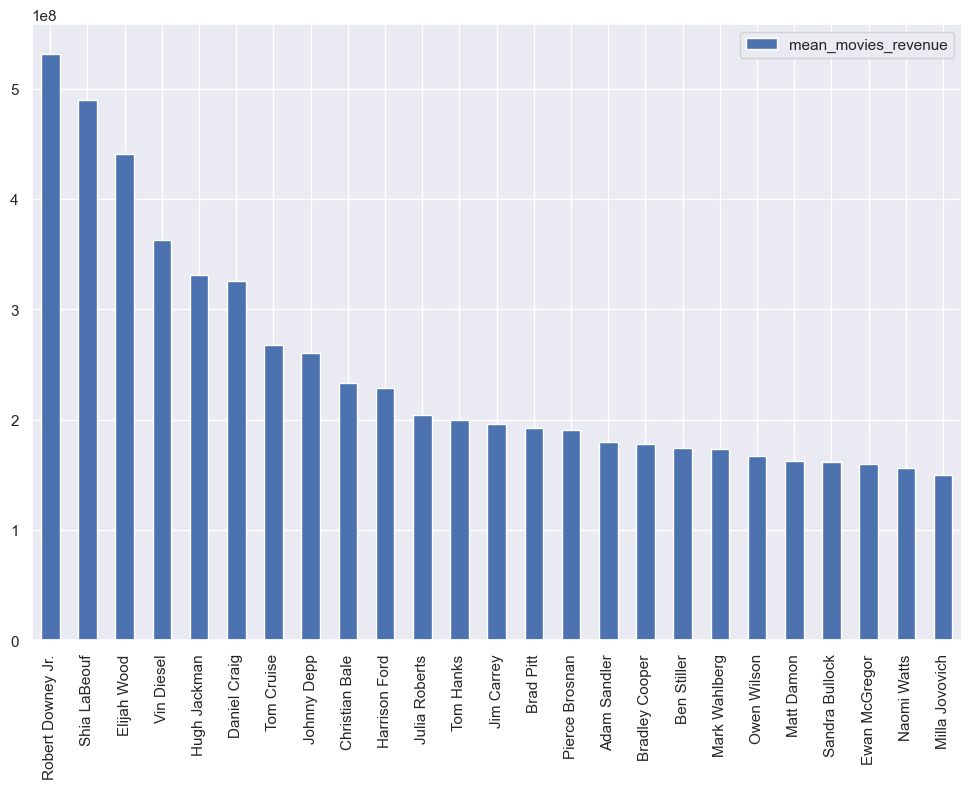

In [127]:
leadActorsDict = {}
for element in train[["revenue", "cast_processed"]].values:
   # compare results when looking at x top actors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadActorsDict:
            leadActorsDict[element[1][i]] = [element[0], 1]
        else:
            leadActorsDict[element[1][i]][0] += element[0]
            leadActorsDict[element[1][i]][1] += 1    

leadActorsDict = {k: v for k, v in leadActorsDict.items() if v[1] >= 5}

for actor in leadActorsDict:
    leadActorsDict[actor][0] = leadActorsDict[actor][0]/leadActorsDict[actor][1]
    leadActorsDict[actor] = leadActorsDict[actor][0]


    
    
actors_train = pd.DataFrame.from_dict(leadActorsDict, orient='index', columns=["mean_movies_revenue"])
actors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar()

In [128]:
# Sort both of our dicts of actors and lead actors to more easily access the 'top actors'
leadActorsDict = {k: v for k, v in sorted(leadActorsDict.items(), key=lambda item: item[1], reverse = True)}
actorsDict = {k: v for k, v in sorted(actorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top actor'
def checkLeadActor(cast):
    if len(cast) < 1 or cast[0] not in list(leadActorsDict)[:25]:
        return 0
    else:
        return 1

def checkTopActors(cast):
    if len(cast) < 1:
        return 0
    count = 0
    for actor in cast[:5]:
        if actor in list(actorsDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD actors
train['topLeadActor'] = train['cast_processed'].apply(lambda x: checkLeadActor(x))
test['topLeadActor'] = test['cast_processed'].apply(lambda x: checkLeadActor(x))
#Creating feature for number of top actors
train['numTopActors'] = train['cast_processed'].apply(lambda x: checkTopActors(x))
test['numTopActors'] = test['cast_processed'].apply(lambda x: checkTopActors(x))

print(train['topLeadActor'].value_counts())
print()
print(train['numTopActors'].value_counts())

topLeadActor
0    2787
1     212
Name: count, dtype: int64

numTopActors
0    2344
1     491
2     120
3      29
4       8
5       7
Name: count, dtype: int64


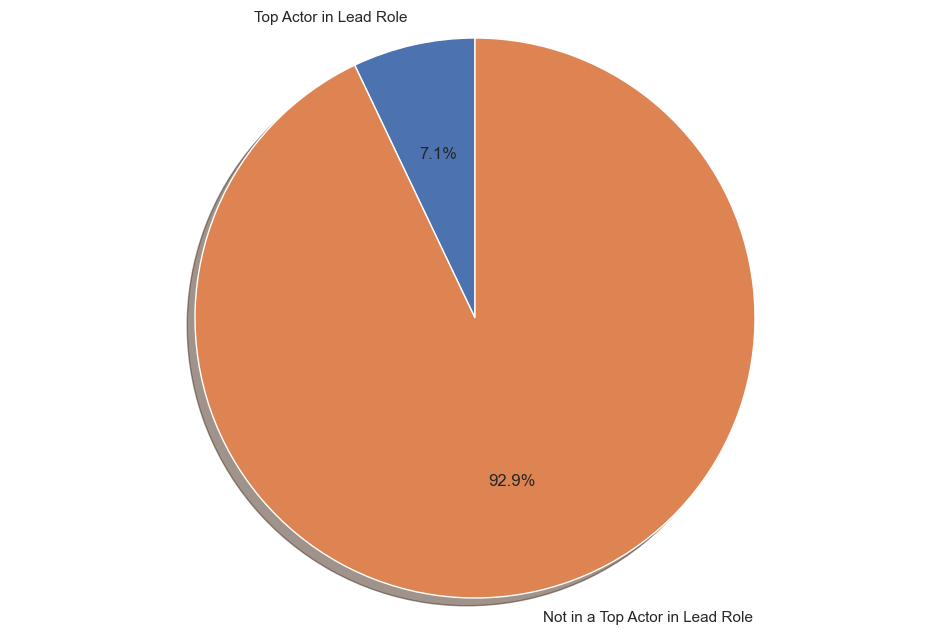

In [129]:
# plotting original data
labels = 'Top Actor in Lead Role', 'Not in a Top Actor in Lead Role'
btc_1 = [sum(train.topLeadActor), (train.topLeadActor == 0).sum(axis=0)]


fig, ax = plt.subplots()

plt.pie(btc_1, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal') # ensures chart is a circle



plt.show()

The figure layout has changed to tight


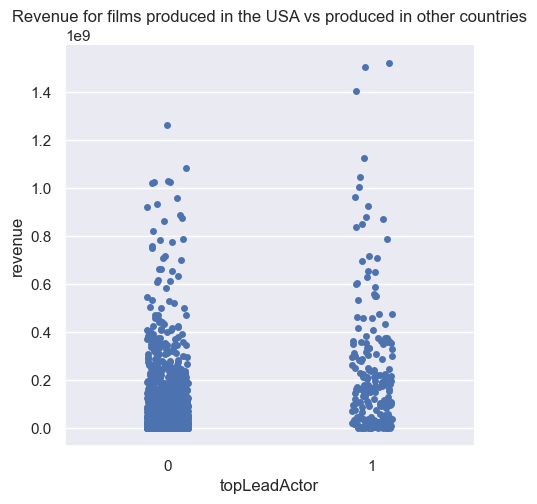

In [130]:
sns.catplot(x='topLeadActor', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [131]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['topLeadActor'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.326


<Axes: xlabel='numTopActors', ylabel='count'>

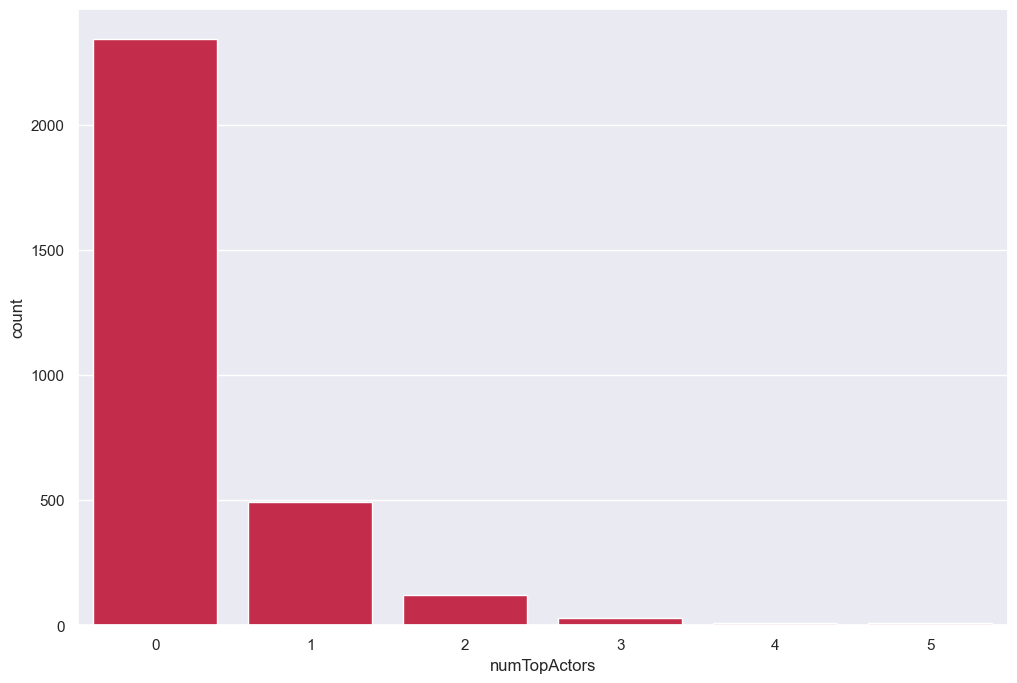

In [132]:
sns.set(rc={'figure.figsize':(12,8)})
sns.countplot(x=train.numTopActors, color='crimson')

The figure layout has changed to tight


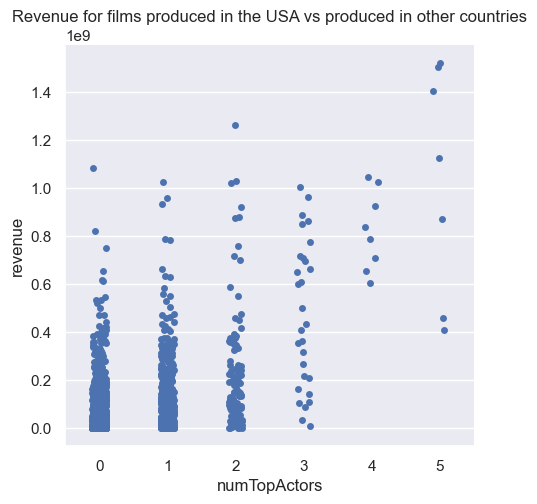

In [133]:
sns.catplot(x='numTopActors', y='revenue', data=train);
plt.title('Revenue for films produced in the USA vs produced in other countries');

In [134]:
# calculate Pearson's correlation
corr, _ = pearsonr(train['numTopActors'], train['revenue'])
print('Pearsons correlation: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['numTopActors']), np.log1p((train['revenue'])))
print('Pearsons correlation: %.3f' % corr)


Pearsons correlation: 0.558
Pearsons correlation: 0.305


# Crew Analysis

In [135]:
# pre-processing
train.crew = train.crew.fillna("")
train['crew_processed'] = train['crew'].apply(lambda x: re.findall("'name': \'(.+?)\'", x))


In [136]:
train.crew.head()

0    [{'credit_id': '59ac067c92514107af02c8c8', 'de...
1    [{'credit_id': '52fe43fe9251416c7502563d', 'de...
2    [{'credit_id': '54d5356ec3a3683ba0000039', 'de...
3    [{'credit_id': '52fe48779251416c9108d6eb', 'de...
4    [{'credit_id': '52fe464b9251416c75073b43', 'de...
Name: crew, dtype: object

In [137]:
train.crew.describe()

count     2999
unique    2984
top           
freq        16
Name: crew, dtype: object

# General Crew Features



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



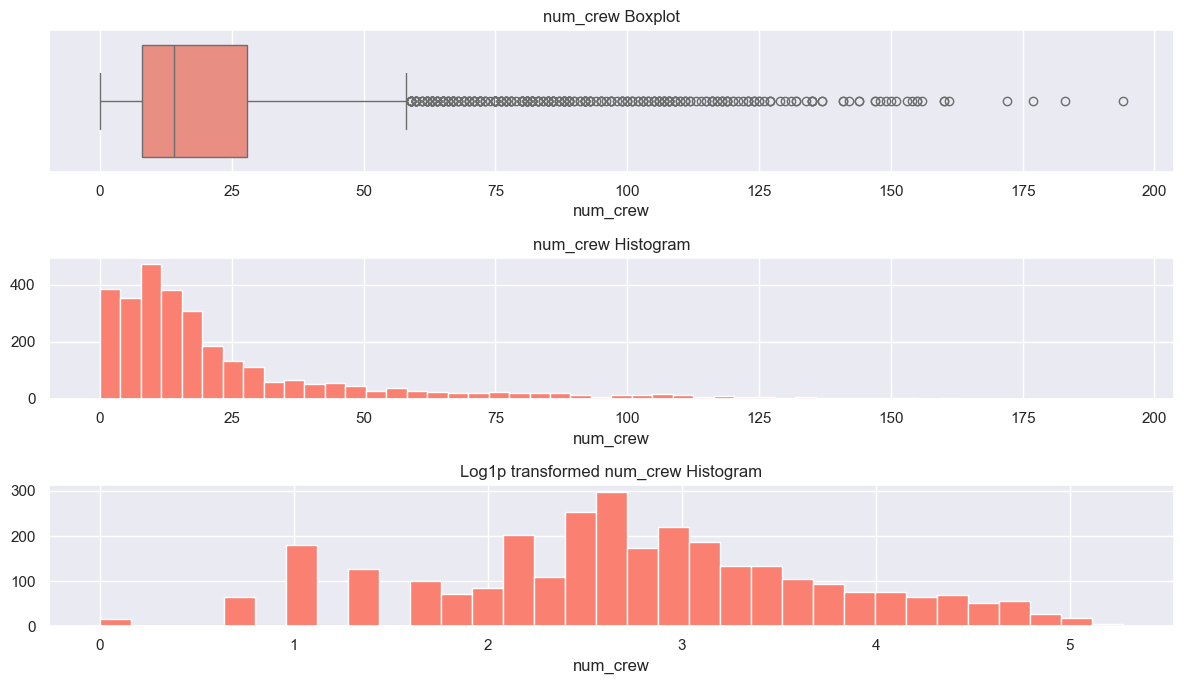

In [138]:
# new feature for a count of the number of crew
train['crew']= train['crew'].fillna("")
train["num_crew"] = train["crew"].str.count("'job")

test['crew']= test['crew'].fillna("")
test["num_crew"] = test["crew"].str.count("'job")

f, ax = plt.subplots(3, figsize=(12,7))

# plot
sns.boxplot(x=train.num_crew, ax = ax[0], color='salmon')
ax[0].set_title("num_crew Boxplot")

sns.distplot(a=train.num_crew, kde = False, ax = ax[1], color='salmon', hist_kws=dict(alpha=1))
ax[1].set_title("num_crew Histogram")

sns.distplot(a=np.log1p(train.num_crew), kde = False, ax = ax[2], color='salmon', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed num_crew Histogram")

f.tight_layout()

In [139]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_crew'], train['revenue'])
print('Pearsons correlation between num_crew and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_crew']), np.log1p(train['revenue']))
print('Pearsons correlation between num_crew and revenue: %.3f' % corr)

Pearsons correlation between num_crew and revenue: 0.372
Pearsons correlation between num_crew and revenue: 0.385




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



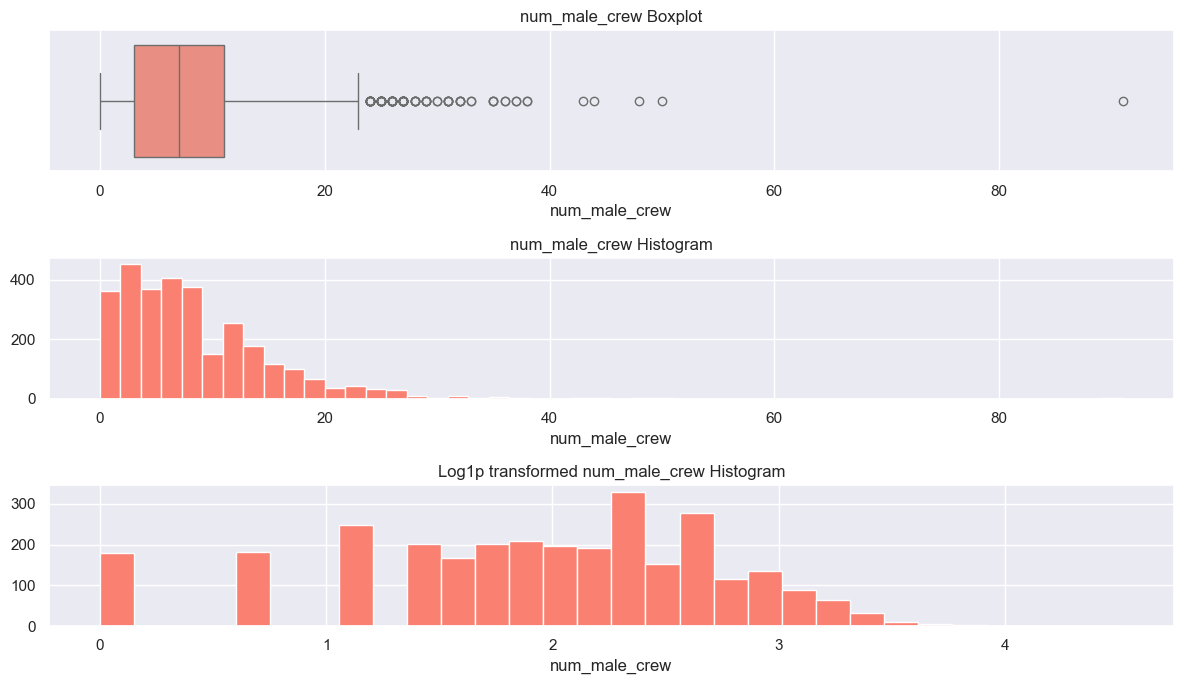

In [140]:
# male crew
train["num_male_crew"] = train["crew"].str.count("'gender': 2")
test["num_male_crew"] = test["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

train.num_male_crew = train.num_male_crew.fillna(0)
test.num_male_crew = test.num_crew.fillna(0)

# plot
sns.boxplot(x=train.num_male_crew, ax = ax[0], color='salmon')
ax[0].set_title("num_male_crew Boxplot")

sns.distplot(a=train.num_male_crew, kde = False, ax = ax[1], color='salmon', hist_kws=dict(alpha=1))
ax[1].set_title("num_male_crew Histogram")

sns.distplot(a=np.log1p(train.num_male_crew), kde = False, ax = ax[2], color='salmon', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed num_male_crew Histogram")

f.tight_layout()

In [141]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_male_crew'], train['revenue'])
print('Pearsons correlation between num_male_crew and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_male_crew']), np.log1p(train['revenue']))
print('Pearsons correlation between num_male_crew and revenue: %.3f' % corr)


Pearsons correlation between num_male_crew and revenue: 0.383
Pearsons correlation between num_male_crew and revenue: 0.462




`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



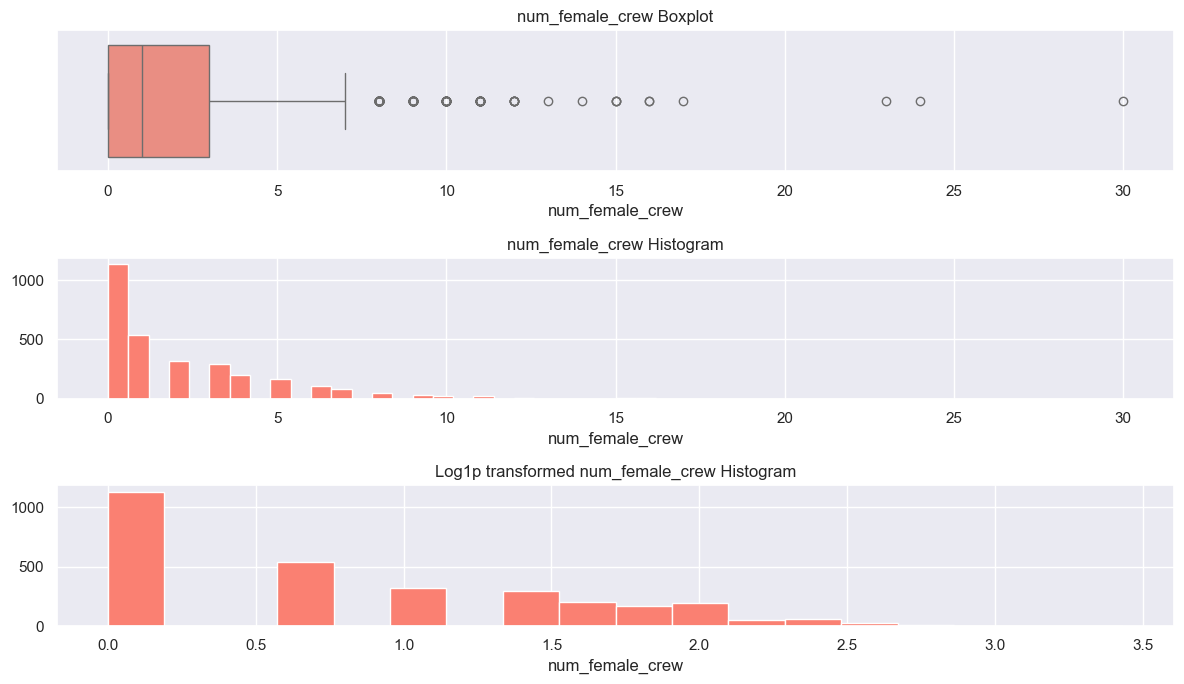

In [142]:
# female crew
train["num_female_crew"] = train["crew"].str.count("'gender': 1")
test["num_female_crew"] = test["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

train.num_male_crew = train.num_male_crew.fillna(0)
test.num_male_crew = test.num_crew.fillna(0)

# plot
sns.boxplot(x=train.num_female_crew, ax = ax[0], color='salmon')
ax[0].set_title("num_female_crew Boxplot")

sns.distplot(a=train.num_female_crew, kde = False, ax = ax[1], color='salmon', hist_kws=dict(alpha=1))
ax[1].set_title("num_female_crew Histogram")

sns.distplot(a=np.log1p(train.num_female_crew), kde = False, ax = ax[2], color='salmon', hist_kws=dict(alpha=1))
ax[2].set_title("Log1p transformed num_female_crew Histogram")

f.tight_layout()


In [143]:
#analysis of correlation and create log feature
corr, _ = pearsonr(train['num_female_crew'], train['revenue'])
print('Pearsons correlation between num_female_crew and revenue: %.3f' % corr)
corr, _ = pearsonr(np.log1p(train['num_female_crew']), np.log1p(train['revenue']))
print('Pearsons correlation between num_female_crew and revenue: %.3f' % corr)

Pearsons correlation between num_female_crew and revenue: 0.267
Pearsons correlation between num_female_crew and revenue: 0.348


# Bivariate Analysis

# Specific Crew Features By Revenue

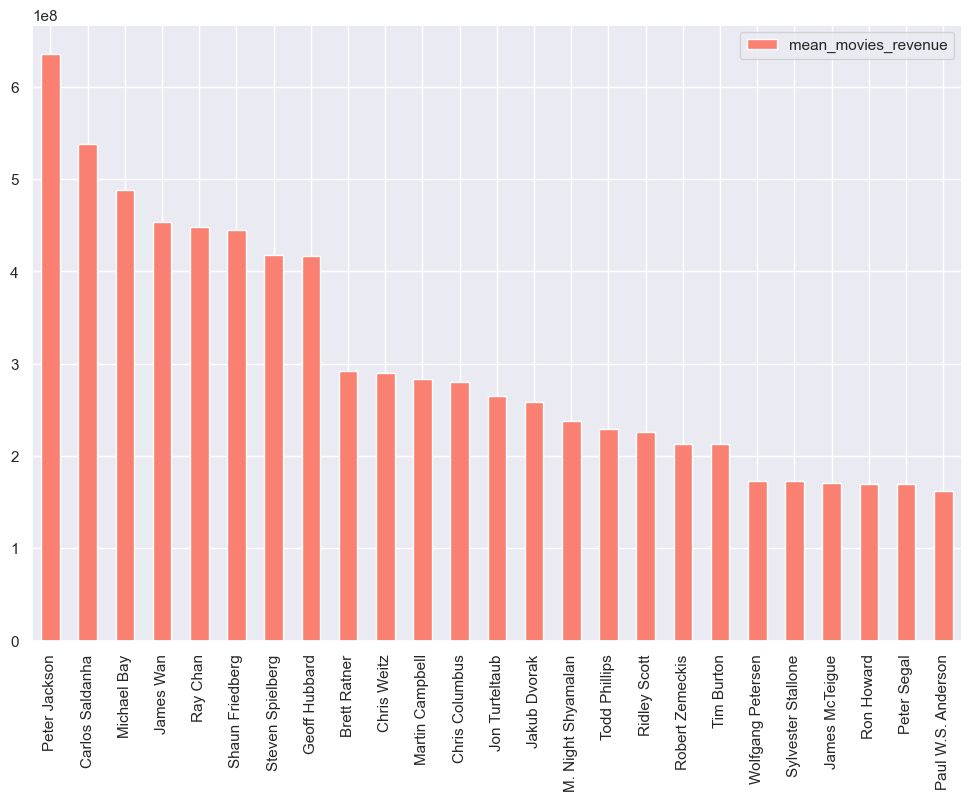

In [144]:
# bivariate directors
train['directors'] = train['crew'].apply(lambda x: re.findall("Director', 'name': '(.+?)'", x))
test['directors'] = test['crew'].apply(lambda x: re.findall("Director', 'name': '(.+?)'", x))

directorsDict = {}
for element in train[["revenue", "directors"]].values:

    for director in element[1]:
        if director not in directorsDict:
            directorsDict[director] = [element[0], 1]
        else:
            directorsDict[director][0] += element[0]
            directorsDict[director][1] += 1

directorsDict = {k: v for k, v in directorsDict.items() if v[1] >= 5}

for director in directorsDict:
    directorsDict[director][0] = directorsDict[director][0]/directorsDict[director][1]
    directorsDict[director] = directorsDict[director][0]

    
directors_train = pd.DataFrame.from_dict(directorsDict, orient='index', columns=["mean_movies_revenue"])
directors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

directors_train.columns = ["number_of_directors"]

<Axes: >

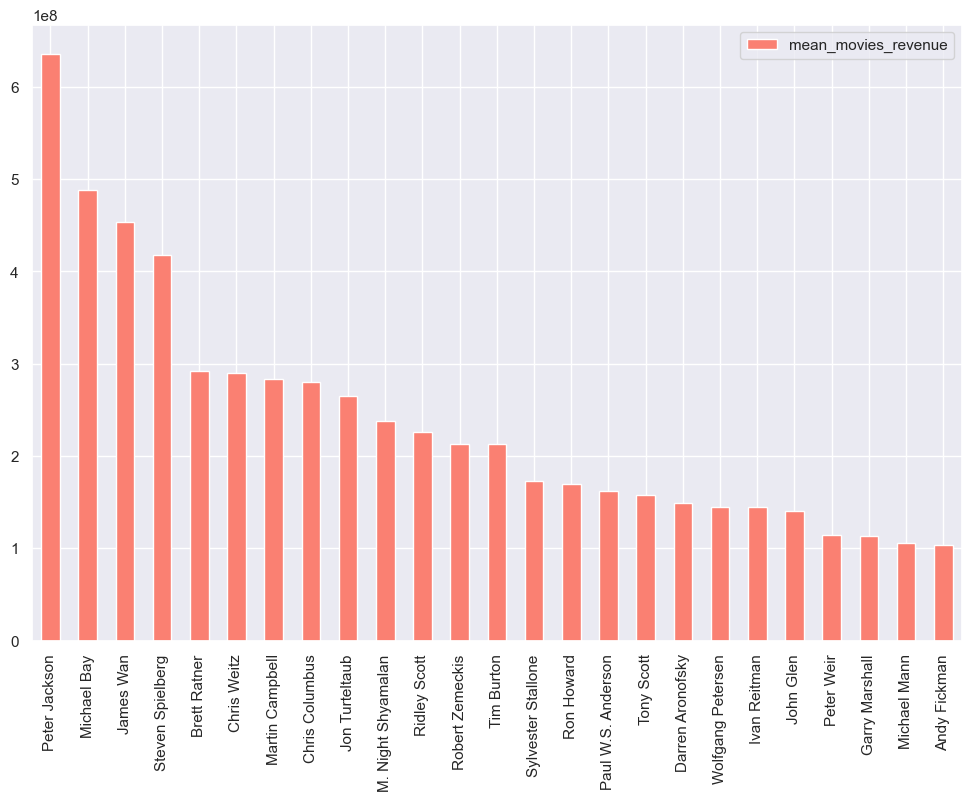

In [145]:
leadDirectorsDict = {}
for element in train[["revenue", "directors"]].values:
   # compare results when looking at x top directors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadDirectorsDict:
            leadDirectorsDict[element[1][i]] = [element[0], 1]
        else:
            leadDirectorsDict[element[1][i]][0] += element[0]
            leadDirectorsDict[element[1][i]][1] += 1    

leadDirectorsDict = {k: v for k, v in leadDirectorsDict.items() if v[1] >= 5}

for director in leadDirectorsDict:
    leadDirectorsDict[director][0] = leadDirectorsDict[director][0]/leadDirectorsDict[director][1]
    leadDirectorsDict[director] = leadDirectorsDict[director][0]


    
    
directors_train = pd.DataFrame.from_dict(leadDirectorsDict, orient='index', columns=["mean_movies_revenue"])
directors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [146]:
# Sort both of our dicts
leadDirectorsDict = {k: v for k, v in sorted(leadDirectorsDict.items(), key=lambda item: item[1], reverse = True)}
directorsDict = {k: v for k, v in sorted(directorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top director'
def checkLeadDirector(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorsDict)[:25]:
        return 0
    else:
        return 1

def checkTopDirectors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(directorsDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD directors
train['topLeadDirector'] = train['directors'].apply(lambda x: checkLeadDirector(x))
test['topLeadDirector'] = test['directors'].apply(lambda x: checkLeadDirector(x))

#Creating feature for number of top directors
train['numTopDirectors'] = train['directors'].apply(lambda x: checkTopDirectors(x))
test['numTopDirectors'] = test['directors'].apply(lambda x: checkTopDirectors(x))


print(train['topLeadDirector'].value_counts())
print()
print(train['numTopDirectors'].value_counts())

topLeadDirector
0    2847
1     152
Name: count, dtype: int64

numTopDirectors
0    2499
1     489
2      10
3       1
Name: count, dtype: int64


<Axes: >

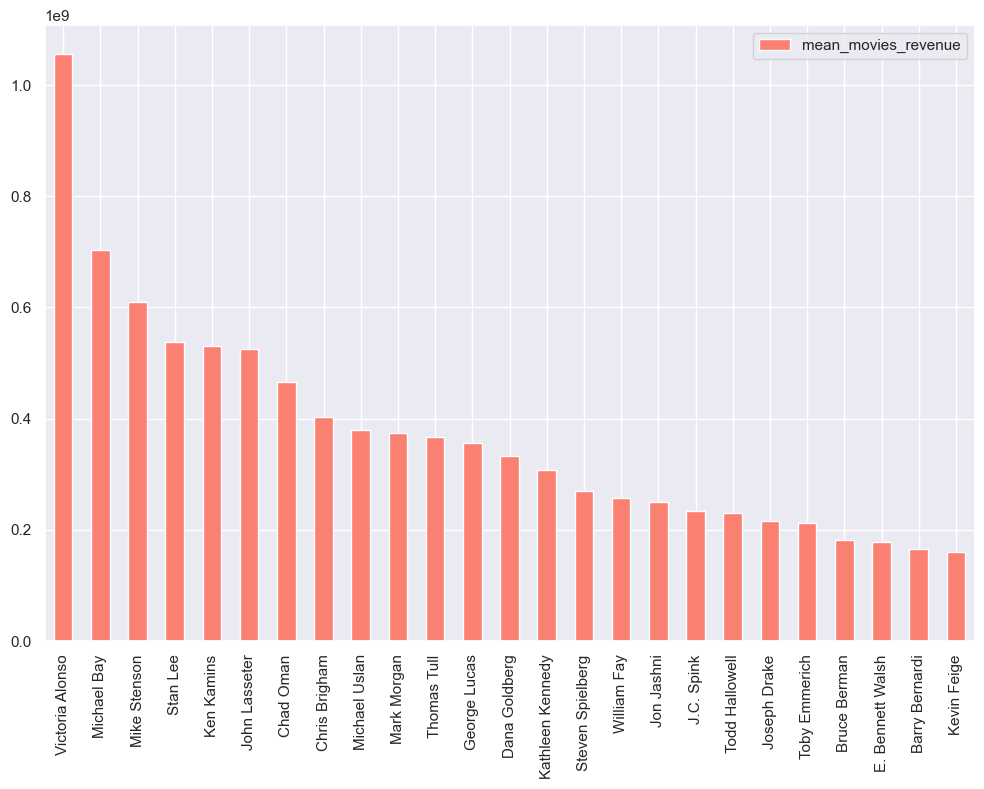

In [147]:
# bivariate executive producers
train['exec_producers'] = train['crew'].apply(lambda x: re.findall("Executive Producer', 'name': '(.+?)'", x))
test['exec_producers'] = test['crew'].apply(lambda x: re.findall("Executive Producer', 'name': '(.+?)'", x))

exec_producersDict = {}
for element in train[["revenue", "exec_producers"]].values:

    for exec_producer in element[1]:
        if exec_producer not in exec_producersDict:
            exec_producersDict[exec_producer] = [element[0], 1]
        else:
            exec_producersDict[exec_producer][0] += element[0]
            exec_producersDict[exec_producer][1] += 1

exec_producersDict = {k: v for k, v in exec_producersDict.items() if v[1] >= 5}

for exec_producer in exec_producersDict:
    exec_producersDict[exec_producer][0] = exec_producersDict[exec_producer][0]/exec_producersDict[exec_producer][1]
    exec_producersDict[exec_producer] = exec_producersDict[exec_producer][0]




exec_producers_train = pd.DataFrame.from_dict(exec_producersDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')


<Axes: >

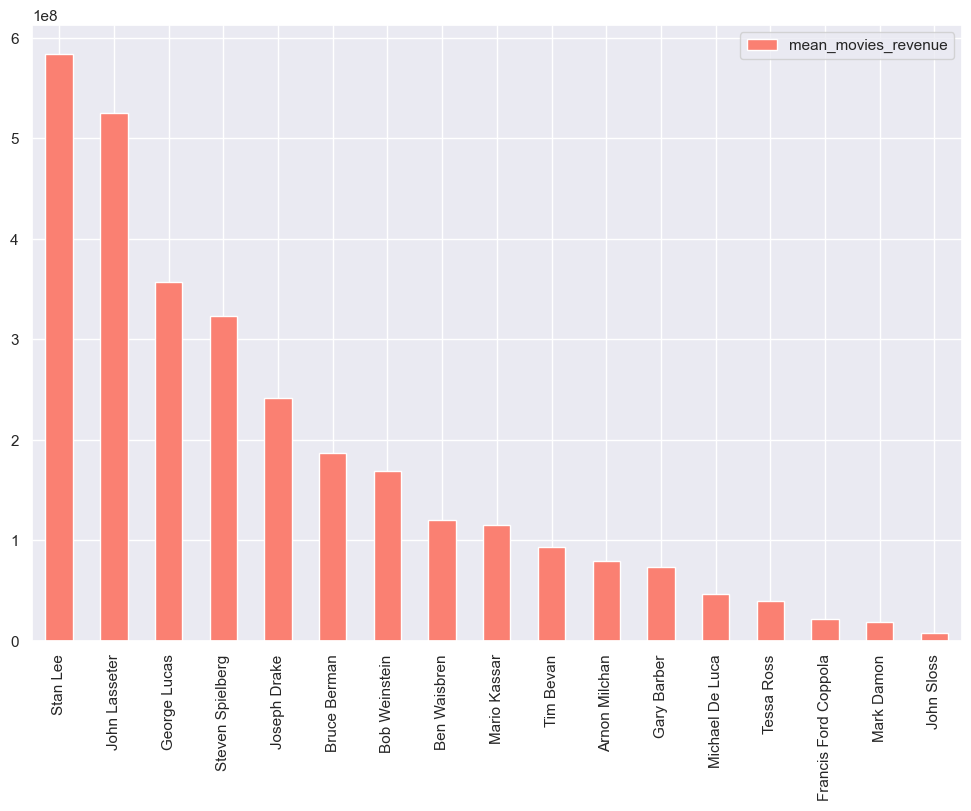

In [148]:
leadExecProdDict = {}
for element in train[["revenue", "exec_producers"]].values:
   # compare results when looking at x top exec producers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadExecProdDict:
            leadExecProdDict[element[1][i]] = [element[0], 1]
        else:
            leadExecProdDict[element[1][i]][0] += element[0]
            leadExecProdDict[element[1][i]][1] += 1    

leadExecProdDict = {k: v for k, v in leadExecProdDict.items() if v[1] >= 5}

for exec_producer in leadExecProdDict:
    leadExecProdDict[exec_producer][0] = leadExecProdDict[exec_producer][0]/leadExecProdDict[exec_producer][1]
    leadExecProdDict[exec_producer] = leadExecProdDict[exec_producer][0]


    
    
exec_producers_train = pd.DataFrame.from_dict(leadExecProdDict, orient='index', columns=["mean_movies_revenue"])
exec_producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [149]:
# Sort both of our dicts
leadExecProdDict = {k: v for k, v in sorted(leadExecProdDict.items(), key=lambda item: item[1], reverse = True)}
exec_producersDict = {k: v for k, v in sorted(exec_producersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top director'
def checkLeadExecProd(crew):
    if len(crew) < 1 or crew[0] not in list(leadExecProdDict)[:25]:
        return 0
    else:
        return 1

def checkTopExecProd(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(exec_producersDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD execprod
train['topLeadExecProd'] = train['exec_producers'].apply(lambda x: checkLeadExecProd(x))
test['topLeadExecProd'] = test['exec_producers'].apply(lambda x: checkLeadExecProd(x))

#Creating feature for number of top execprod
train['numTopExecProd'] = train['exec_producers'].apply(lambda x: checkTopExecProd(x))
test['numTopExecProd'] = test['exec_producers'].apply(lambda x: checkTopExecProd(x))


print(train['topLeadExecProd'].value_counts())
print()
print(train['numTopExecProd'].value_counts())

topLeadExecProd
0    2859
1     140
Name: count, dtype: int64

numTopExecProd
0    2630
1     236
2     106
3      20
4       6
5       1
Name: count, dtype: int64


<Axes: >

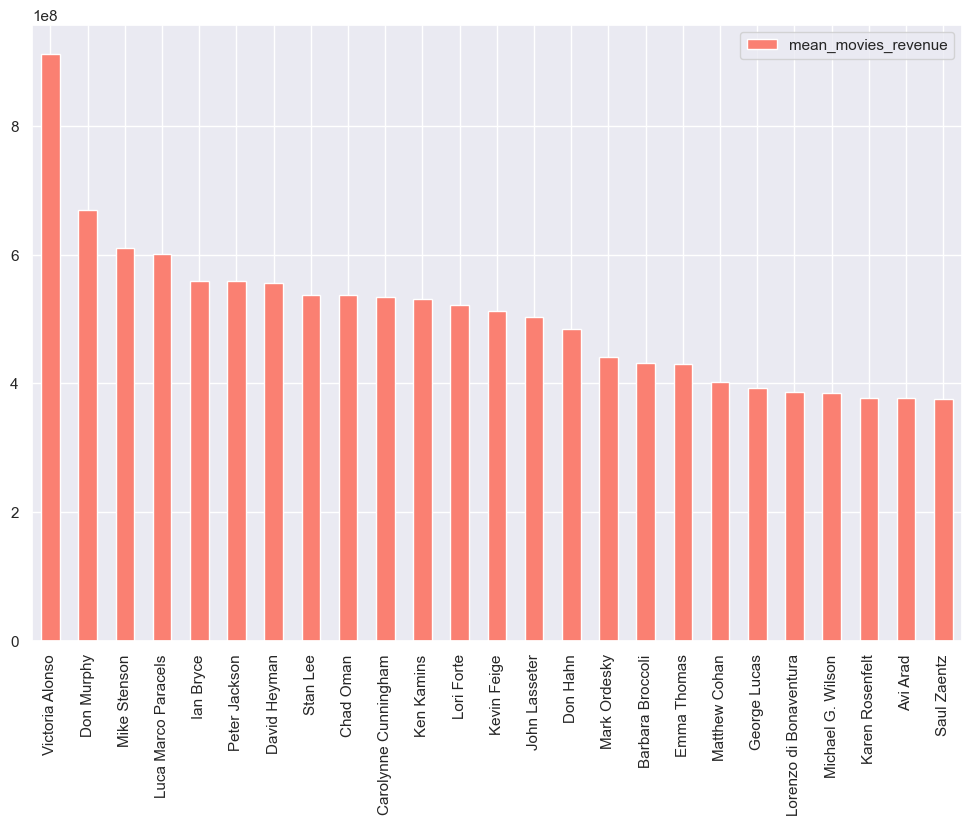

In [150]:
# bivariate producers
train['producers'] = train['crew'].apply(lambda x: re.findall("Producer', 'name': '(.+?)'", x))
test['producers'] = test['crew'].apply(lambda x: re.findall("Producer', 'name': '(.+?)'", x))

producersDict = {}
for element in train[["revenue", "producers"]].values:

    for producer in element[1]:
        if producer not in producersDict:
            producersDict[producer] = [element[0], 1]
        else:
            producersDict[producer][0] += element[0]
            producersDict[producer][1] += 1

producersDict = {k: v for k, v in producersDict.items() if v[1] >= 5}

for producer in producersDict:
    producersDict[producer][0] = producersDict[producer][0]/producersDict[producer][1]
    producersDict[producer] = producersDict[producer][0]




producers_train = pd.DataFrame.from_dict(producersDict, orient='index', columns=["mean_movies_revenue"])
producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')


<Axes: >

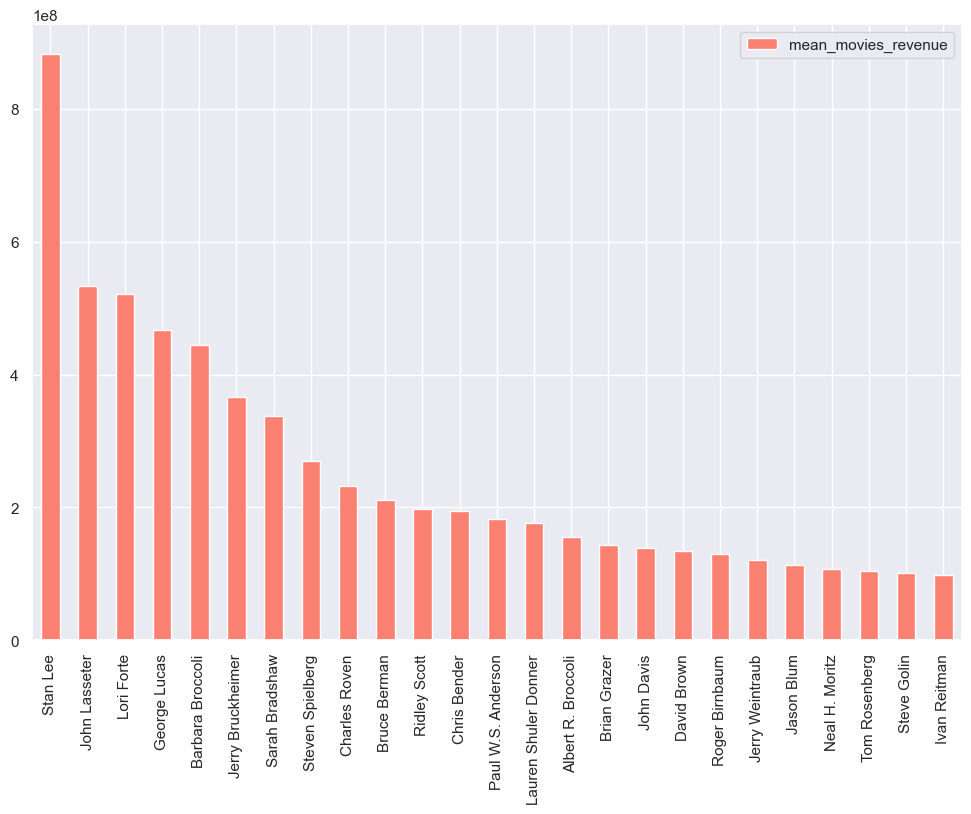

In [151]:
leadProducerDict = {}
for element in train[["revenue", "producers"]].values:
   # compare results when looking at x top producers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadProducerDict:
            leadProducerDict[element[1][i]] = [element[0], 1]
        else:
            leadProducerDict[element[1][i]][0] += element[0]
            leadProducerDict[element[1][i]][1] += 1    

leadProducerDict = {k: v for k, v in leadProducerDict.items() if v[1] >= 5}

for producer in leadProducerDict:
    leadProducerDict[producer][0] = leadProducerDict[producer][0]/leadProducerDict[producer][1]
    leadProducerDict[producer] = leadProducerDict[producer][0]


    
    
producers_train = pd.DataFrame.from_dict(leadProducerDict, orient='index', columns=["mean_movies_revenue"])
producers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [152]:
# Sort both of our dicts
leadProducerDict = {k: v for k, v in sorted(leadProducerDict.items(), key=lambda item: item[1], reverse = True)}
producersDict = {k: v for k, v in sorted(producersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top producer'
def checkLeadProducer(crew):
    if len(crew) < 1 or crew[0] not in list(leadProducerDict)[:25]:
        return 0
    else:
        return 1

def checkTopProducers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for producer in crew[:5]:
        if producer in list(producersDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD Producers
train['topLeadProducer'] = train['producers'].apply(lambda x: checkLeadProducer(x))
test['topLeadProducer'] = test['producers'].apply(lambda x: checkLeadProducer(x))

#Creating feature for number of top Producers
train['numTopProducers'] = train['producers'].apply(lambda x: checkTopProducers(x))
test['numTopProducers'] = test['producers'].apply(lambda x: checkTopProducers(x))


print(train['topLeadProducer'].value_counts())
print()
print(train['numTopProducers'].value_counts())

topLeadProducer
0    2798
1     201
Name: count, dtype: int64

numTopProducers
0    2590
1     249
2      89
3      47
4      17
5       7
Name: count, dtype: int64


<Axes: >

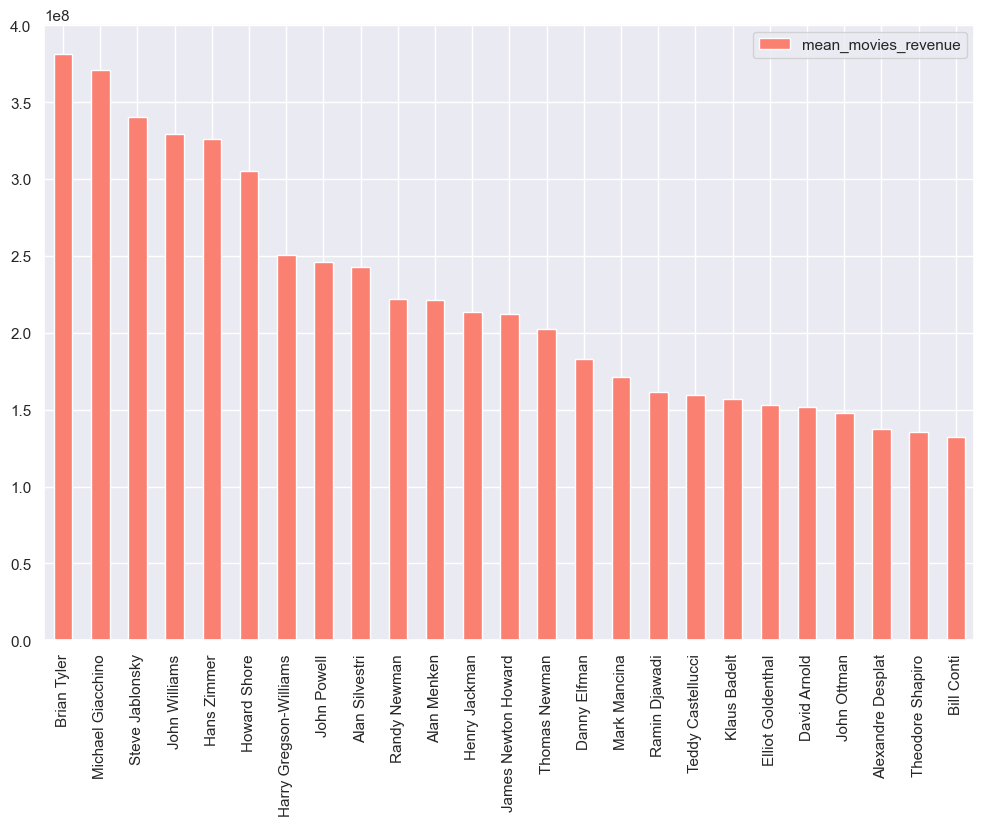

In [153]:
# bivariate composer
train['composers'] = train['crew'].apply(lambda x: re.findall("Composer', 'name': '(.+?)'", x))
test['composers'] = test['crew'].apply(lambda x: re.findall("Composer', 'name': '(.+?)'", x))

composersDict = {}
for element in train[["revenue", "composers"]].values:

    for composer in element[1]:
        if composer not in composersDict:
            composersDict[composer] = [element[0], 1]
        else:
            composersDict[composer][0] += element[0]
            composersDict[composer][1] += 1

composersDict = {k: v for k, v in composersDict.items() if v[1] >= 5}

for composer in composersDict:
    composersDict[composer][0] = composersDict[composer][0]/composersDict[composer][1]
    composersDict[composer] = composersDict[composer][0]




composers_train = pd.DataFrame.from_dict(composersDict, orient='index', columns=["mean_movies_revenue"])
composers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

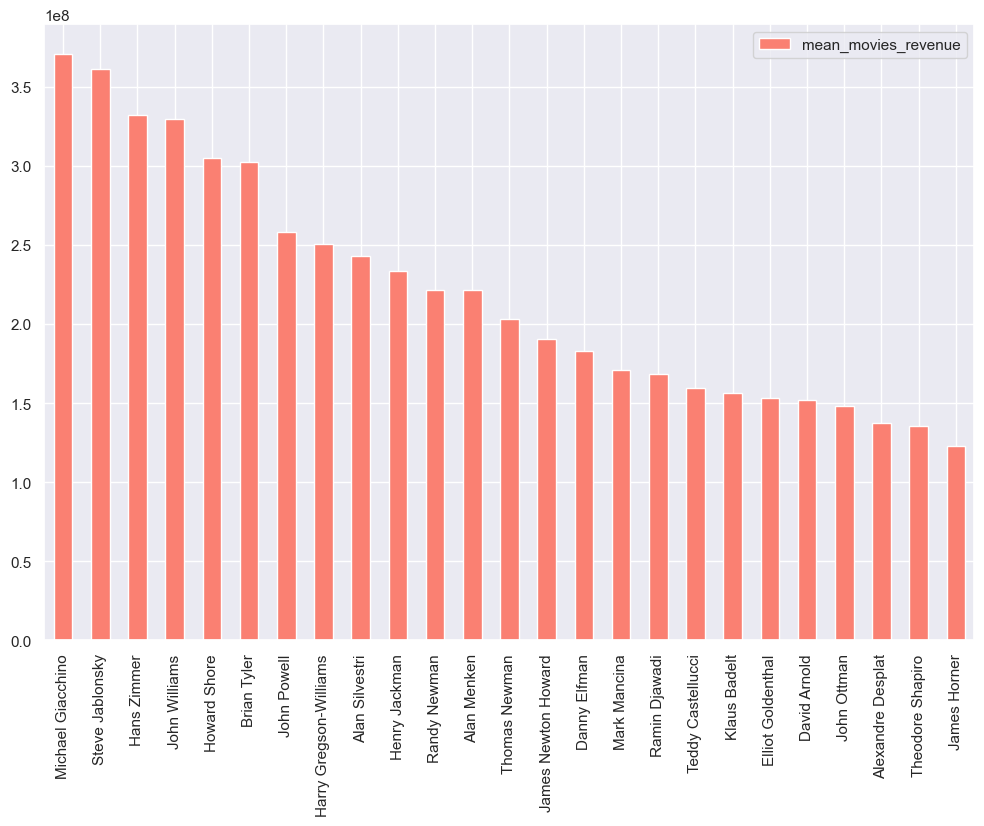

In [154]:
leadComposerDict = {}
for element in train[["revenue", "composers"]].values:
   # compare results when looking at x top composers in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadComposerDict:
            leadComposerDict[element[1][i]] = [element[0], 1]
        else:
            leadComposerDict[element[1][i]][0] += element[0]
            leadComposerDict[element[1][i]][1] += 1    

leadComposerDict = {k: v for k, v in leadComposerDict.items() if v[1] >= 5}

for composer in leadComposerDict:
    leadComposerDict[composer][0] = leadComposerDict[composer][0]/leadComposerDict[composer][1]
    leadComposerDict[composer] = leadComposerDict[composer][0]


    
    
composers_train = pd.DataFrame.from_dict(leadComposerDict, orient='index', columns=["mean_movies_revenue"])
composers_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [155]:
# Sort both of our dicts
leadComposerDict = {k: v for k, v in sorted(leadComposerDict.items(), key=lambda item: item[1], reverse = True)}
composersDict = {k: v for k, v in sorted(composersDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top Composer'
def checkLeadComposer(crew):
    if len(crew) < 1 or crew[0] not in list(leadComposerDict)[:25]:
        return 0
    else:
        return 1

def checkTopComposers(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for composer in crew[:5]:
        if composer in list(composersDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD Composers
train['topLeadComposer'] = train['composers'].apply(lambda x: checkLeadComposer(x))
test['topLeadComposer'] = test['composers'].apply(lambda x: checkLeadComposer(x))

#Creating feature for number of top Composers
train['numTopComposers'] = train['composers'].apply(lambda x: checkTopComposers(x))
test['numTopComposers'] = test['composers'].apply(lambda x: checkTopComposers(x))


print(train['topLeadComposer'].value_counts())
print()
print(train['numTopComposers'].value_counts())


topLeadComposer
0    2665
1     334
Name: count, dtype: int64

numTopComposers
0    2116
1     872
2      11
Name: count, dtype: int64


<Axes: >

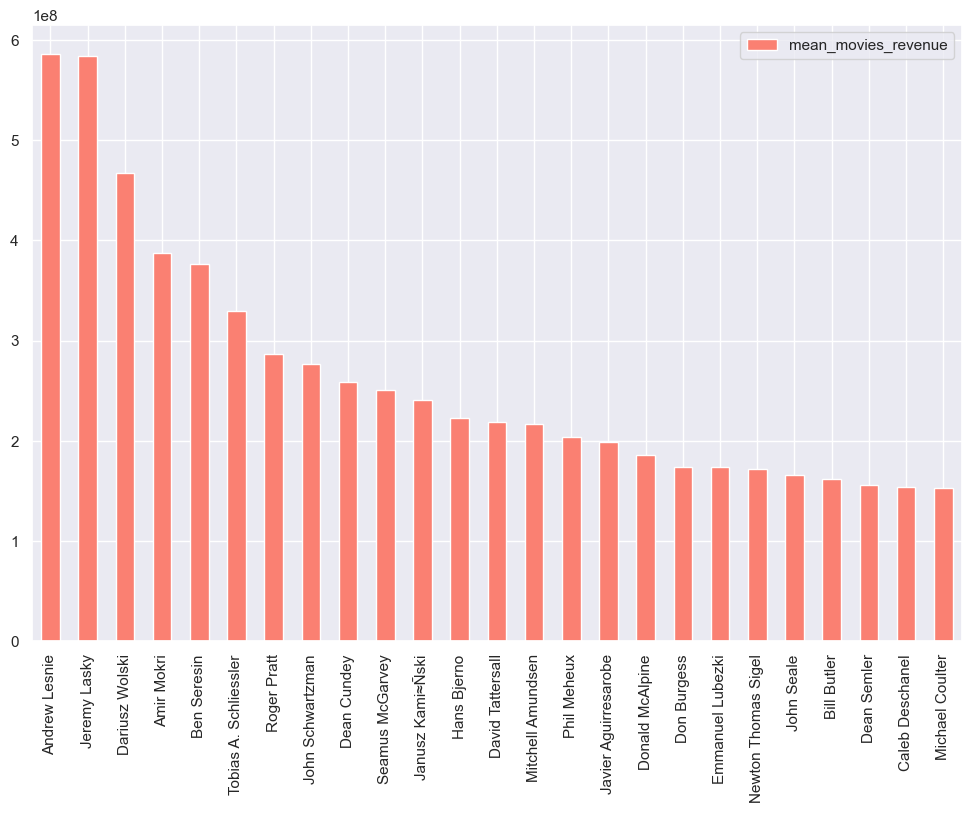

In [156]:
# bivariate director of photography
train['director_photos'] = train['crew'].apply(lambda x: re.findall("Director of Photography', 'name': '(.+?)'", x))
test['director_photos'] = test['crew'].apply(lambda x: re.findall("Director of Photography', 'name': '(.+?)'", x))

director_photosDict = {}
for element in train[["revenue", "director_photos"]].values:

    for director_photo in element[1]:
        if director_photo not in director_photosDict:
            director_photosDict[director_photo] = [element[0], 1]
        else:
            director_photosDict[director_photo][0] += element[0]
            director_photosDict[director_photo][1] += 1

director_photosDict = {k: v for k, v in director_photosDict.items() if v[1] >= 5}

for director_photo in director_photosDict:
    director_photosDict[director_photo][0] = director_photosDict[director_photo][0]/director_photosDict[director_photo][1]
    director_photosDict[director_photo] = director_photosDict[director_photo][0]




director_photos_train = pd.DataFrame.from_dict(director_photosDict, orient='index', columns=["mean_movies_revenue"])
director_photos_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

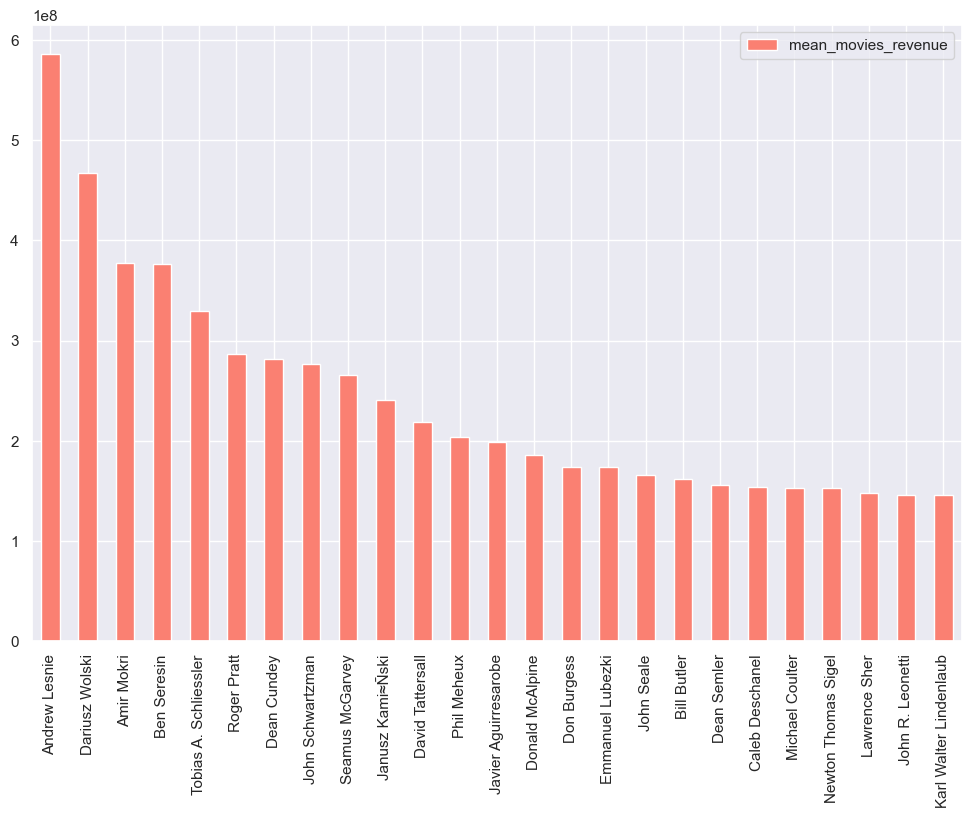

In [157]:
leadDirectorPhotoDict = {}
for element in train[["revenue", "director_photos"]].values:
   # compare results when looking at x top director_photos in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadDirectorPhotoDict:
            leadDirectorPhotoDict[element[1][i]] = [element[0], 1]
        else:
            leadDirectorPhotoDict[element[1][i]][0] += element[0]
            leadDirectorPhotoDict[element[1][i]][1] += 1    

leadDirectorPhotoDict = {k: v for k, v in leadDirectorPhotoDict.items() if v[1] >= 5}

for director_photo in leadDirectorPhotoDict:
    leadDirectorPhotoDict[director_photo][0] = leadDirectorPhotoDict[director_photo][0]/leadDirectorPhotoDict[director_photo][1]
    leadDirectorPhotoDict[director_photo] = leadDirectorPhotoDict[director_photo][0]


    
    
director_photos_train = pd.DataFrame.from_dict(leadDirectorPhotoDict, orient='index', columns=["mean_movies_revenue"])
director_photos_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [158]:
# Sort both of our dicts
leadDirectorPhotoDict = {k: v for k, v in sorted(leadDirectorPhotoDict.items(), key=lambda item: item[1], reverse = True)}
director_photosDict = {k: v for k, v in sorted(director_photosDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top director'
def checkLeadDirectorPhoto(crew):
    if len(crew) < 1 or crew[0] not in list(leadDirectorPhotoDict)[:25]:
        return 0
    else:
        return 1

def checkTopDirectorsPhotos(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for director in crew[:5]:
        if director in list(director_photosDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD director of photography
train['topLeadDirectorPhoto'] = train['director_photos'].apply(lambda x: checkLeadDirectorPhoto(x))
test['topLeadDirectorPhoto'] = test['director_photos'].apply(lambda x: checkLeadDirectorPhoto(x))

#Creating feature for number of top director of photography
train['numTopDirectorsPhoto'] = train['director_photos'].apply(lambda x: checkTopDirectorsPhotos(x))
test['numTopDirectorsPhoto'] = test['director_photos'].apply(lambda x: checkTopDirectorsPhotos(x))


print(train['topLeadDirectorPhoto'].value_counts())
print()
print(train['numTopDirectorsPhoto'].value_counts())

topLeadDirectorPhoto
0    2796
1     203
Name: count, dtype: int64

numTopDirectorsPhoto
0    2248
1     743
2       8
Name: count, dtype: int64


<Axes: >

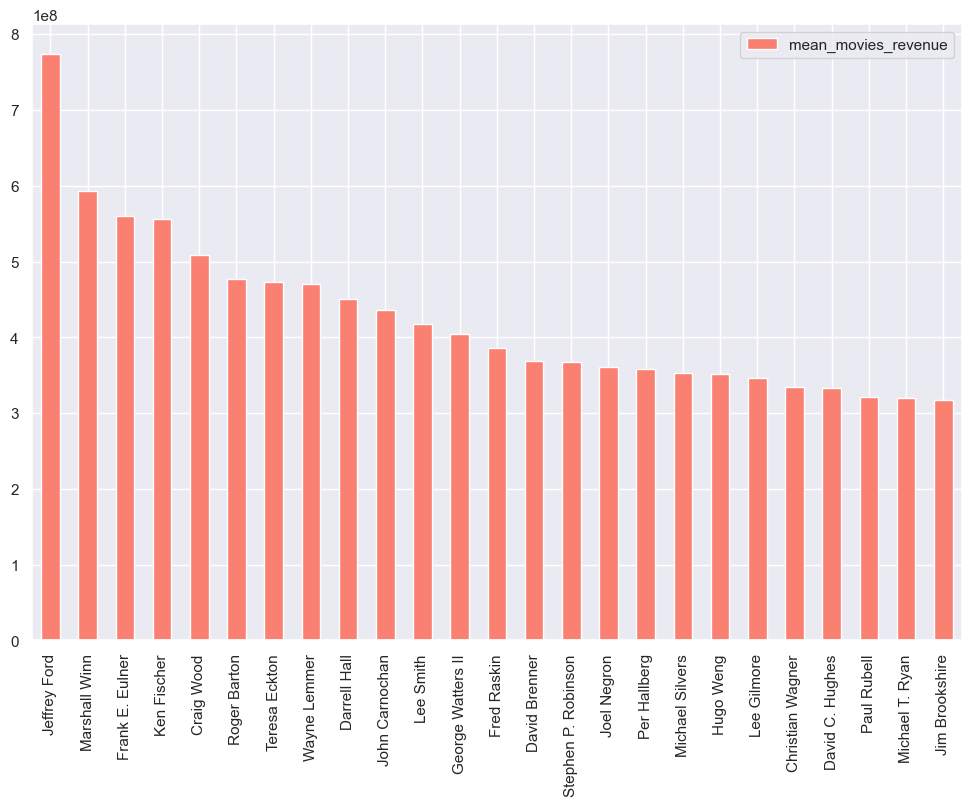

In [159]:
# bivariate editor
train['editors'] = train['crew'].apply(lambda x: re.findall("Editor', 'name': '(.+?)'", x))
test['editors'] = test['crew'].apply(lambda x: re.findall("Editor', 'name': '(.+?)'", x))

editorsDict = {}
for element in train[["revenue", "editors"]].values:

    for editor in element[1]:
        if editor not in editorsDict:
            editorsDict[editor] = [element[0], 1]
        else:
            editorsDict[editor][0] += element[0]
            editorsDict[editor][1] += 1

editorsDict = {k: v for k, v in editorsDict.items() if v[1] >= 5}

for editor in editorsDict:
    editorsDict[editor][0] = editorsDict[editor][0]/editorsDict[editor][1]
    editorsDict[editor] = editorsDict[editor][0]




editors_train = pd.DataFrame.from_dict(editorsDict, orient='index', columns=["mean_movies_revenue"])
editors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

<Axes: >

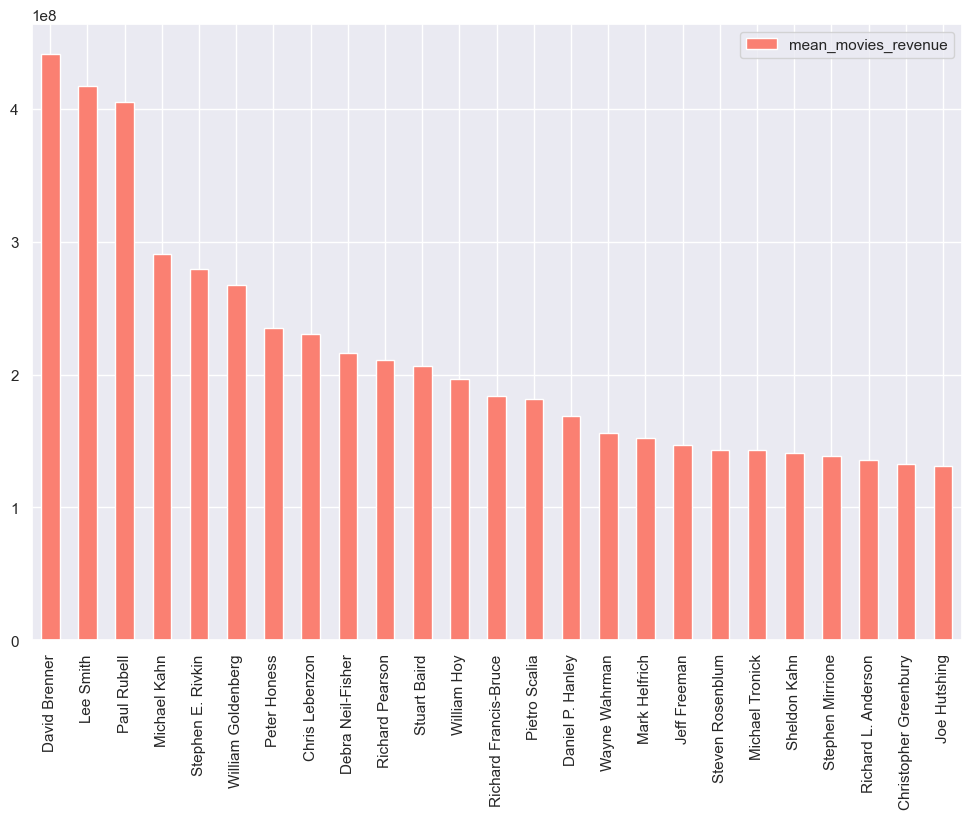

In [160]:
leadEditorDict = {}
for element in train[["revenue", "editors"]].values:
   # compare results when looking at x top editors in films vs whole cast 
    temp = 1
    if len(element[1]) < temp:
        temp = len(element[1])
    for i in range(temp):
        if element[1][i] not in leadEditorDict:
            leadEditorDict[element[1][i]] = [element[0], 1]
        else:
            leadEditorDict[element[1][i]][0] += element[0]
            leadEditorDict[element[1][i]][1] += 1    

leadEditorDict = {k: v for k, v in leadEditorDict.items() if v[1] >= 5}

for editor in leadEditorDict:
    leadEditorDict[editor][0] = leadEditorDict[editor][0]/leadEditorDict[editor][1]
    leadEditorDict[editor] = leadEditorDict[editor][0]


    
    
editors_train = pd.DataFrame.from_dict(leadEditorDict, orient='index', columns=["mean_movies_revenue"])
editors_train.sort_values(by="mean_movies_revenue", ascending=False).head(25).plot.bar(color='salmon')

In [161]:
# Sort both of our dicts
leadEditorDict = {k: v for k, v in sorted(leadEditorDict.items(), key=lambda item: item[1], reverse = True)}
editorsDict = {k: v for k, v in sorted(editorsDict.items(), key=lambda item: item[1], reverse = True)}


# function to check if lead role is a 'top Editor'
def checkLeadEditor(crew):
    if len(crew) < 1 or crew[0] not in list(leadEditorDict)[:25]:
        return 0
    else:
        return 1

def checkTopEditors(crew):
    if len(crew) < 1:
        return 0
    count = 0
    for editor in crew[:5]:
        if editor in list(editorsDict)[:100]:
            count += 1
    return count

#Creating a feature for top LEAD Editors
train['topLeadEditor'] = train['editors'].apply(lambda x: checkLeadEditor(x))
test['topLeadEditor'] = test['editors'].apply(lambda x: checkLeadEditor(x))

#Creating feature for number of top Editors
train['numTopEditors'] = train['editors'].apply(lambda x: checkTopEditors(x))
test['numTopEditors'] = test['editors'].apply(lambda x: checkTopEditors(x))


print(train['topLeadEditor'].value_counts())
print()
print(train['numTopEditors'].value_counts())

topLeadEditor
0    2817
1     182
Name: count, dtype: int64

numTopEditors
0    2662
1     222
2      74
3      32
4       9
Name: count, dtype: int64


# Feature Selection

In [162]:
train['year_to_budget_ratio'] = train.apply(lambda x: (x.budget_processed / x.year), axis=1)
test['year_to_budget_ratio'] = test.apply(lambda x: (x.budget_processed / x.year), axis=1)

In [163]:
train['cast_to_budget_ratio'] = train.apply(lambda x: (x.budget_processed / x.num_cast) if x.num_cast != 0 else 0 , axis=1)
test['cast_to_budget_ratio'] = test.apply(lambda x: (x.budget_processed / x.num_cast)  if x.num_cast != 0 else 0 , axis=1)

In [164]:
train['topActor_to_budget_ratio'] = train.apply(lambda x: (x.budget_processed / x.numTopActors)   if x.numTopActors != 0 else 0 , axis=1)
test['topActor_to_budget_ratio'] = test.apply(lambda x: (x.budget_processed / x.numTopActors)  if x.numTopActors != 0 else 0 , axis=1)

In [165]:
train.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'has_collection', 'budget_processed', 'genres_reform', 'num_genres',
       'genre_rank', 'has_homepage', 'in_english', 'overview_len',
       'production_companies_reform', 'num_studios',
       'production_countries_processed', 'num_production_countries',
       'usa_produced', 'month', 'season', 'year', 'day_of_week',
       'week_of_year', 'runtime_processed', 'spoken_languages_reform',
       'num_languages', 'lang', 'eng', 'has_tagline', 'title_len',
       'has_keywords', 'cast_processed', 'num_cast', 'log_num_cast',
       'topLeadActor', 'numTopActors', 'crew_processed', 'num_crew',
       'num_male_crew', 'num_female_crew'

Text(0.5, 1.0, 'Correlation between numerical features')

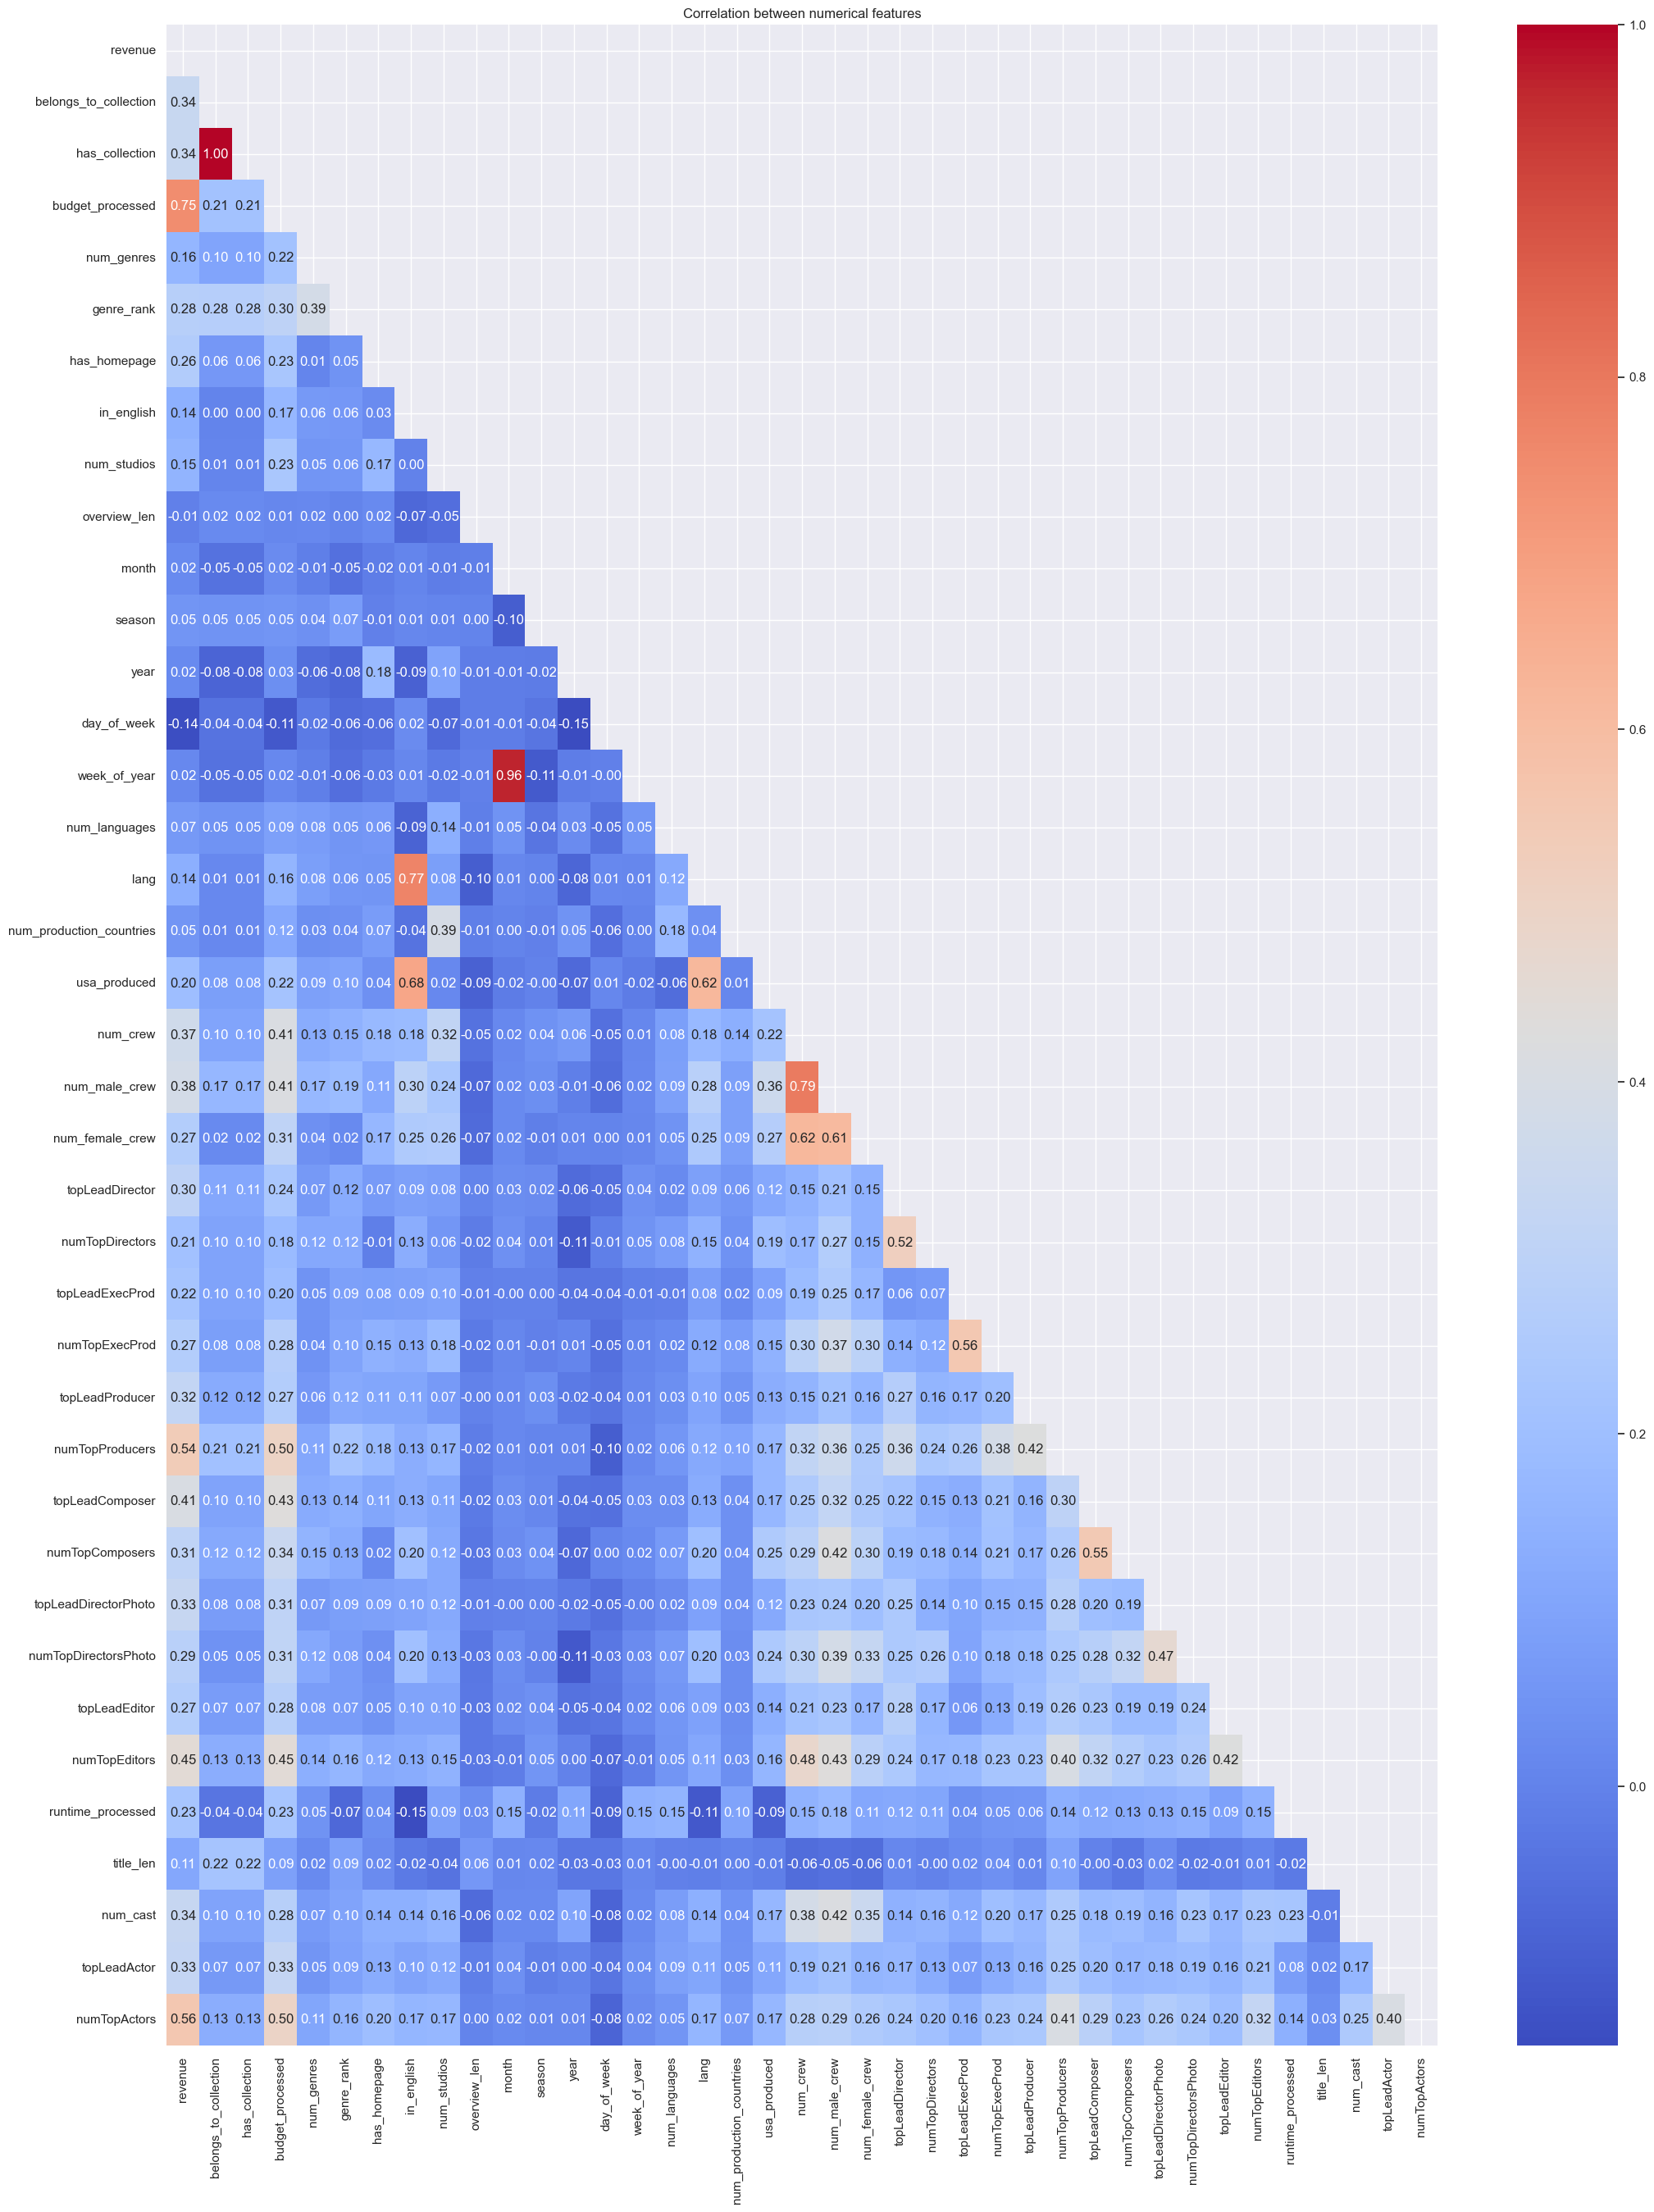

In [166]:
# Correlation matrix here
sns.set(rc={'figure.figsize':(25,32)})

# Compute the correlation matrix
corr = train[[ 'revenue', 'belongs_to_collection',
       'has_collection', 'budget_processed',
       'num_genres', 'genre_rank',
       'has_homepage', 'in_english', 
       'num_studios', 'overview_len', 'month',
       'season', 'year', 'day_of_week', 'week_of_year',
       'num_languages', 'lang', 'num_production_countries','usa_produced',  
       'num_crew','num_male_crew','num_female_crew','topLeadDirector', 'numTopDirectors', 'topLeadExecProd', 
       'numTopExecProd', 'topLeadProducer','numTopProducers', 'topLeadComposer', 
       'numTopComposers','topLeadDirectorPhoto', 'numTopDirectorsPhoto',
       'topLeadEditor', 'numTopEditors', 'runtime_processed', 'title_len',
       'num_cast', 'topLeadActor','numTopActors']].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

In [167]:
train_features = [ 'belongs_to_collection', 'has_homepage', 'in_english', 'usa_produced', 'lang', 'topLeadActor', 
       'has_tagline', 'has_keywords',
       'topLeadDirector', 'topLeadExecProd', 'topLeadProducer',
       'topLeadComposer',  'topLeadDirectorPhoto',  'topLeadEditor' ]

In [168]:
log_features = ['budget_processed', 'num_genres', 'genre_rank', 
       'overview_len', 'num_studios', 
       'num_production_countries', 'month', 'season', 
       'year', 'day_of_week','week_of_year', 'runtime_processed',
       'num_languages', 'title_len', 'num_cast', 'numTopActors',
       'num_crew', 'num_male_crew', 'num_female_crew',
       'numTopDirectors',  'numTopExecProd', 'numTopProducers', 
       'numTopComposers', 'numTopDirectorsPhoto', 'numTopEditors',
               'year_to_budget_ratio', 'cast_to_budget_ratio', 'topActor_to_budget_ratio']

In [169]:
for feat in log_features:
    train["log_" + feat] = np.log1p(train[feat])
    test["log_" + feat] = np.log1p(test[feat]) 
    train_features.append("log_" + feat)
    #train_features.append(feat)

In [170]:
train['log_revenue'] = np.log1p(train['revenue'])

In [171]:
train_features

['belongs_to_collection',
 'has_homepage',
 'in_english',
 'usa_produced',
 'lang',
 'topLeadActor',
 'has_tagline',
 'has_keywords',
 'topLeadDirector',
 'topLeadExecProd',
 'topLeadProducer',
 'topLeadComposer',
 'topLeadDirectorPhoto',
 'topLeadEditor',
 'log_budget_processed',
 'log_num_genres',
 'log_genre_rank',
 'log_overview_len',
 'log_num_studios',
 'log_num_production_countries',
 'log_month',
 'log_season',
 'log_year',
 'log_day_of_week',
 'log_week_of_year',
 'log_runtime_processed',
 'log_num_languages',
 'log_title_len',
 'log_num_cast',
 'log_numTopActors',
 'log_num_crew',
 'log_num_male_crew',
 'log_num_female_crew',
 'log_numTopDirectors',
 'log_numTopExecProd',
 'log_numTopProducers',
 'log_numTopComposers',
 'log_numTopDirectorsPhoto',
 'log_numTopEditors',
 'log_year_to_budget_ratio',
 'log_cast_to_budget_ratio',
 'log_topActor_to_budget_ratio']

In [172]:
print ('Train set:', train[train_features].shape)
print ('Test set:', test[train_features].shape)

Train set: (2999, 42)
Test set: (4398, 42)


In [173]:
train[train_features].to_csv('trainX.csv', index=False)
train['log_revenue'].to_csv('trainY.csv', index=False)

# Modelling

In [174]:
#Set up our X and y
X = train[train_features]
y = train['log_revenue']

In [175]:
# create a 80/20 stratified split of the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20)

In [176]:
#Ensure the dimensions are correct
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (2399, 42) (2399,)
Test set: (600, 42) (600,)


In [177]:
def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='neg_root_mean_squared_error',
                       do_probabilities = False):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        n_jobs=-1, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, y_train_data)
    
    if do_probabilities:
        pred = fitted_model.predict_proba(X_test_data)
    else:
        pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [178]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Average Error: {:0.4f}'.format(np.mean(errors)))
    print('Accuracy = {:0.3f}%'.format(accuracy))
    
    return accuracy

In [179]:
def metrics(y_pred, y_test):
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    errors = abs(y_pred - y_test)
    mae = np.mean(errors)
    mape = 100 * (errors / y_test)
    print('Mean Squared Error: ', round(mse, 4))
    print('Root Mean Squared Error: ', round(rmse, 4))
    print('Mean Absolute Error: ', round(mae, 4))

    
    # Calculate and display accuracy
    test_accuracy = 100 - np.mean(mape)
    print('Test Set Accuracy (from Mean Absolute Percentage Error):{:.3f}%'.format(test_accuracy))

# Random Forest

# Baseline

In [184]:
rfr_base_model = RandomForestRegressor(random_state=42)
rfr_base_model.fit(X_train, y_train.values.ravel())

RandomForestRegressor(random_state=42)

In [186]:
y_pred = rfr_base_model.predict(X_test)


In [187]:
errors = abs(np.expm1(y_pred) - np.expm1(y_test.values))
# Print out the mean absolute error (mae)
print('Average Error:', round(np.mean(errors), 2))

Average Error: 35295039.55


In [188]:
print('Random Forest Baseline Model Metrics:')
metrics(y_pred, y_test.values)

Random Forest Baseline Model Metrics:
Mean Squared Error:  4.9939
Root Mean Squared Error:  2.2347
Mean Absolute Error:  1.4621
Test Set Accuracy (from Mean Absolute Percentage Error):82.961%


# Grid Search HyperParameter Tuning

In [189]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [10, 25, 30],
    'max_features': [.4, 'auto'],
    'min_samples_leaf': [1, 2, 5],
    'min_samples_split': [1, 3, 5],
    'n_estimators': [100,400]
}

# Create a based model
rfr = RandomForestRegressor(random_state=42)
# Instantiate the grid search model
rfr, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, rfr, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-rfr.best_score_))
print(rfr.best_params_)

Fitting 5 folds for each of 108 candidates, totalling 540 fits



360 fits failed out of a total of 540.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\L

1.4965944099760908
{'bootstrap': True, 'max_depth': 10, 'max_features': 0.4, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 400}


In [190]:
print('Base Model:')
base_accuracy = evaluate(rfr_base_model, X_test, y_test.values)
print()
print('Model after Tuning:')
rfr_best_model = rfr.best_estimator_
best_accuracy = evaluate(rfr_best_model, X_test, y_test.values)

print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base Model:
Average Error: 1.4621
Accuracy = 82.961%

Model after Tuning:
Average Error: 1.4335
Accuracy = 82.736%
Improvement of -0.27%.


In [191]:
y_pred = rfr_best_model.predict(X_test)
print('Random Forest Model (After Tuning) Metrics:')
metrics(y_pred, y_test.values)

Random Forest Model (After Tuning) Metrics:
Mean Squared Error:  4.8998
Root Mean Squared Error:  2.2135
Mean Absolute Error:  1.4335
Test Set Accuracy (from Mean Absolute Percentage Error):82.736%


# Features Importance

In [193]:
feature_importances = rfr_best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. log_year_to_budget_ratio (0.235791)
2. log_budget_processed (0.211424)
3. log_num_male_crew (0.111182)
4. log_year (0.046152)
5. log_num_cast (0.038225)
6. log_runtime_processed (0.032516)
7. log_cast_to_budget_ratio (0.032315)
8. log_overview_len (0.027032)
9. log_num_crew (0.025452)
10. log_topActor_to_budget_ratio (0.024934)
11. log_genre_rank (0.020881)
12. log_title_len (0.019444)
13. log_week_of_year (0.018628)
14. belongs_to_collection (0.016717)
15. log_day_of_week (0.014344)
16. log_numTopDirectorsPhoto (0.013228)
17. log_num_studios (0.011785)
18. log_month (0.011585)
19. has_tagline (0.010869)
20. log_numTopComposers (0.010849)


<Axes: >

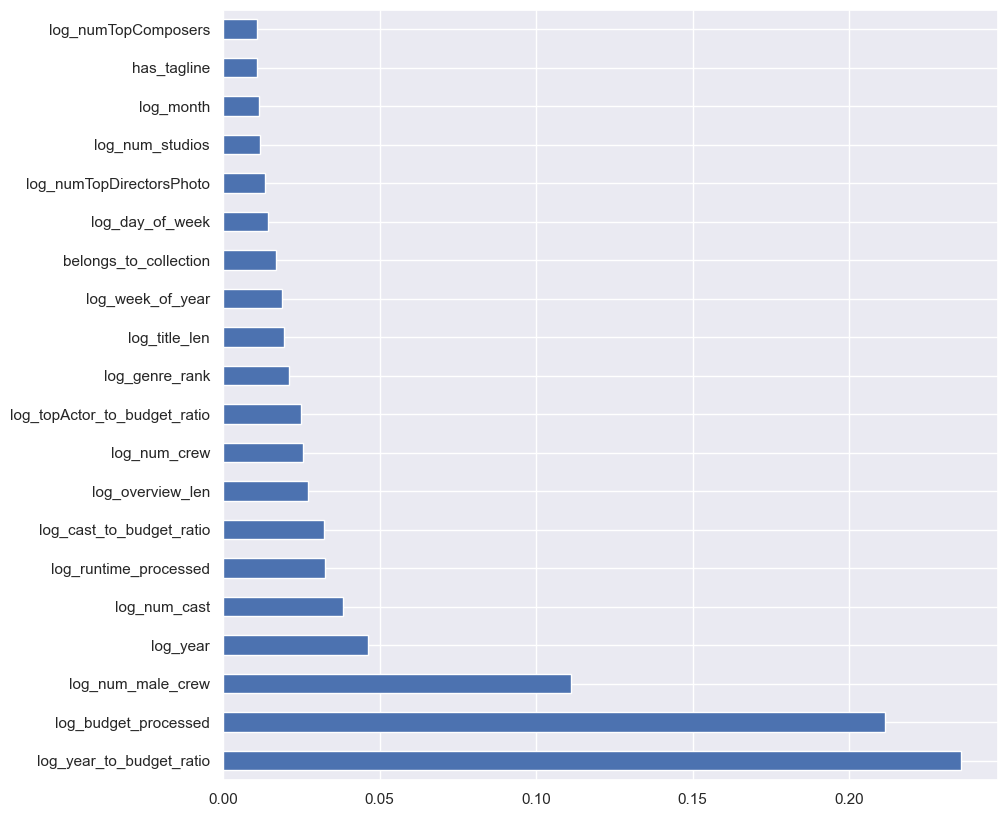

In [194]:
feat_importances = pd.Series(feature_importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=[10,10])

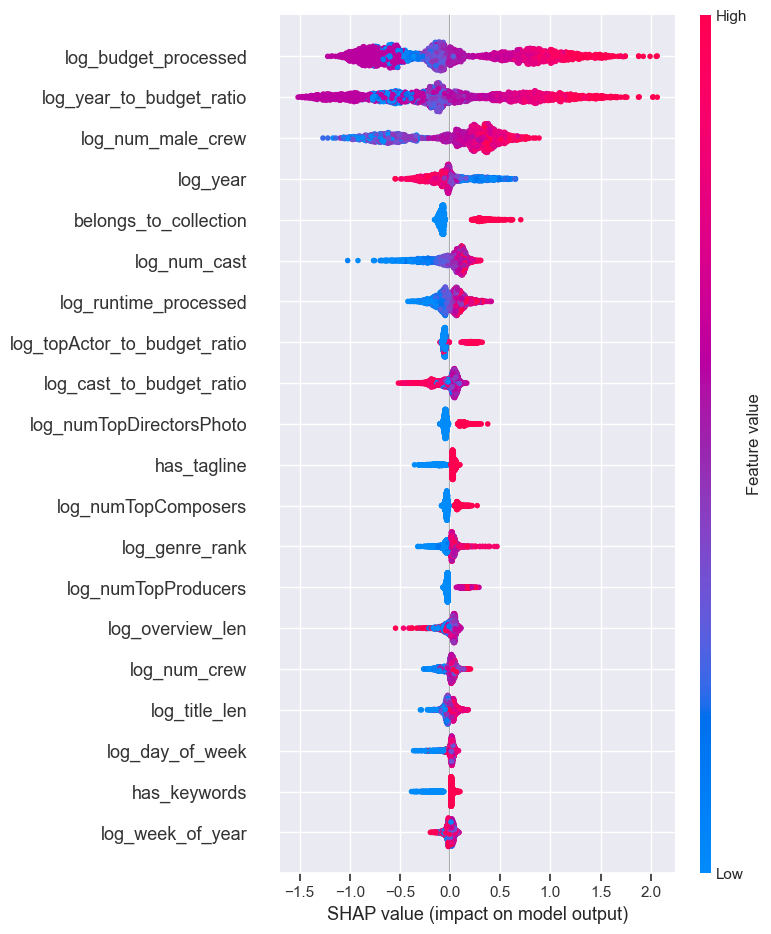

In [195]:
explainer = shap.TreeExplainer(rfr_best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

# Extra Trees

# Baseline

In [196]:
et_base_model = ExtraTreesRegressor(random_state = 42)
et_base_model.fit(X_train, y_train.values.ravel())

ExtraTreesRegressor(random_state=42)

In [197]:
y_pred = et_base_model.predict(X_test)

In [198]:
print('Extra Trees Baseline Model Metrics:')
metrics(y_pred, y_test.values)

Extra Trees Baseline Model Metrics:
Mean Squared Error:  5.1754
Root Mean Squared Error:  2.2749
Mean Absolute Error:  1.5062
Test Set Accuracy (from Mean Absolute Percentage Error):82.370%


# Grid Search HyperParameter Tuning

In [199]:
et_model = ExtraTreesRegressor(random_state = 42)
param_grid = {
    'bootstrap': [True],
    'max_depth': [35, 40, 45],
    'max_features': [.4, .6, 'auto'],
    'min_samples_leaf': [1, 2],
    'min_samples_split': [4, 5, 7],
    'n_estimators': [100, 250, 400]
}

et_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, et_model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-et_model.best_score_))
print(et_model.best_params_)

Fitting 5 folds for each of 162 candidates, totalling 810 fits



270 fits failed out of a total of 810.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
111 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\

1.5065510152591859
{'bootstrap': True, 'max_depth': 35, 'max_features': 0.6, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}


In [200]:
base_accuracy = evaluate(et_base_model, X_test, y_test.values)

et_best_model = et_model.best_estimator_
best_accuracy = evaluate(et_best_model, X_test, y_test.values)


print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Average Error: 1.5062
Accuracy = 82.370%
Average Error: 1.4956
Accuracy = 82.057%
Improvement of -0.38%.


In [201]:
y_pred = et_best_model.predict(X_test)
print('Extra Trees Model (After Tuning) Metrics:')
metrics(y_pred, y_test.values)

Extra Trees Model (After Tuning) Metrics:
Mean Squared Error:  5.1845
Root Mean Squared Error:  2.2769
Mean Absolute Error:  1.4956
Test Set Accuracy (from Mean Absolute Percentage Error):82.057%


# Feature Importance 

In [202]:
feature_importances = et_best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. log_num_male_crew (0.107013)
2. log_year_to_budget_ratio (0.084733)
3. log_budget_processed (0.073128)
4. log_numTopDirectorsPhoto (0.052004)
5. has_tagline (0.048962)
6. log_numTopComposers (0.046670)
7. belongs_to_collection (0.035202)
8. log_runtime_processed (0.031722)
9. log_num_cast (0.031694)
10. log_genre_rank (0.031274)
11. log_day_of_week (0.027374)
12. log_num_crew (0.026315)
13. log_year (0.025885)
14. log_numTopProducers (0.024634)
15. log_season (0.022202)
16. log_num_studios (0.021950)
17. log_num_female_crew (0.021811)
18. has_keywords (0.021557)
19. log_cast_to_budget_ratio (0.021092)
20. log_overview_len (0.020735)


<Axes: >

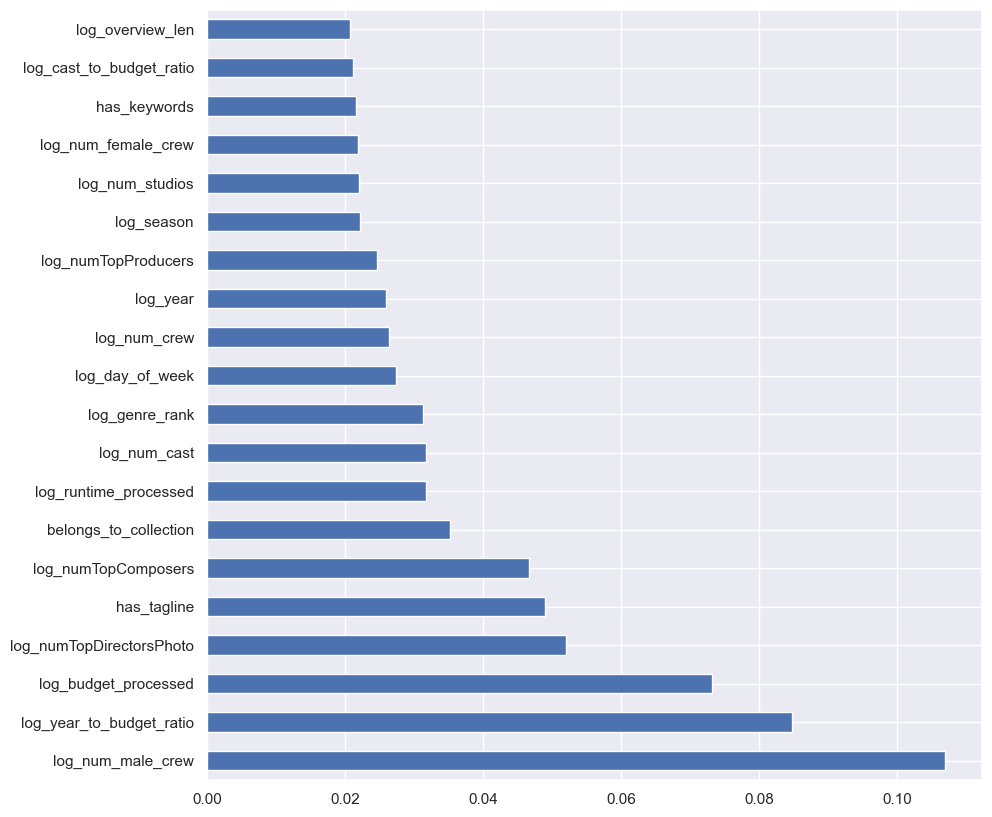

In [203]:
feat_importances = pd.Series(feature_importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=[10,10])

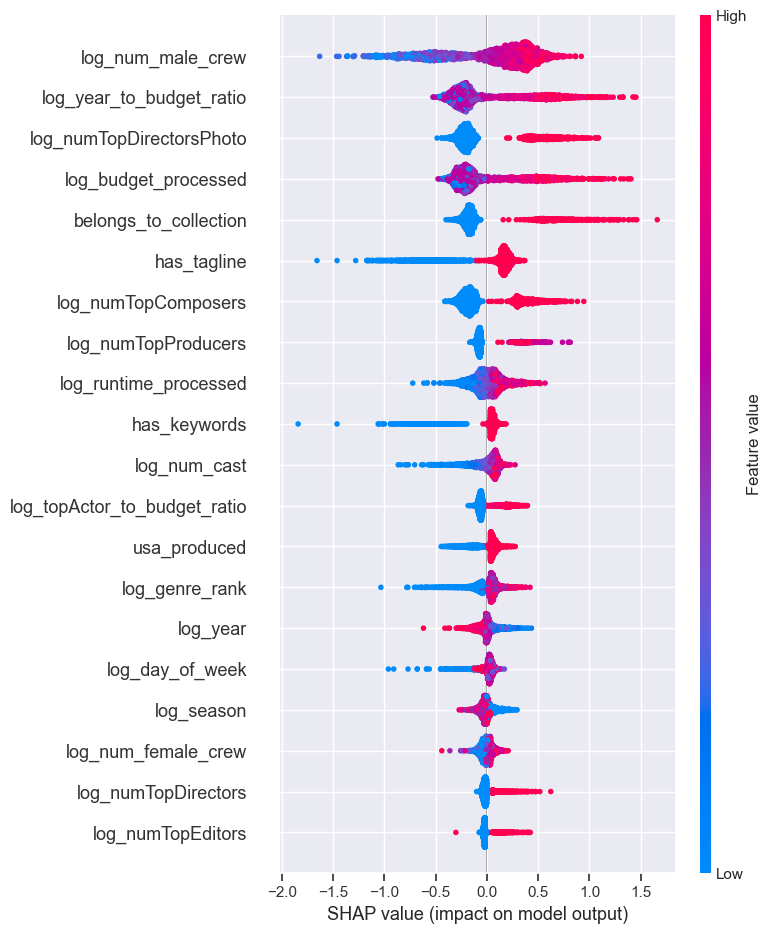

In [206]:
explainer = shap.TreeExplainer(et_best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

# XGBoost

In [207]:
xgb_base_model = xgb.XGBRegressor(random_state = 42)
xgb_base_model.fit(X_train, y_train.values.ravel())

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=42, ...)

In [208]:
y_pred = xgb_base_model.predict(X_test)

In [209]:
print('XGBoost Baseline Model Metrics:')
metrics(y_pred, y_test.values)

XGBoost Baseline Model Metrics:
Mean Squared Error:  5.2106
Root Mean Squared Error:  2.2827
Mean Absolute Error:  1.5652
Test Set Accuracy (from Mean Absolute Percentage Error):82.749%


# GridSearch Hyperparamter Tuning

In [210]:
xgb_model = xgb.XGBRegressor(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'colsample_bytree': [0.9, 1.0, 1.1],
    'max_depth': [2, 5, 10],
    'reg_alpha': [1.0, 1.2, 1.3],
    'reg_lambda': [ 1.2, 1.3, 1.4],
    'subsample': [0.9, 1.0]
}

xgb_model, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, xgb_model, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-xgb_model.best_score_))
print(xgb_model.best_params_)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
1.493183750957057
{'colsample_bytree': 0.9, 'max_depth': 2, 'n_estimators': 100, 'reg_alpha': 1.2, 'reg_lambda': 1.2, 'subsample': 0.9}



540 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\core.py", line 729, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\xgboost\sklearn.py", line 1086, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\prana\AppData\Loca

In [211]:
print('Base Model:')
base_accuracy = evaluate(xgb_base_model, X_test, y_test.values)
print()
print('Model after Tuning:')
xgb_best_model = xgb_model.best_estimator_
best_accuracy = evaluate(xgb_best_model, X_test, y_test.values)


print('Improvement of {:0.3f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

Base Model:
Average Error: 1.5652
Accuracy = 82.749%

Model after Tuning:
Average Error: 1.4381
Accuracy = 83.162%
Improvement of 0.499%.


In [212]:
y_pred = xgb_best_model.predict(X_test)
print('XGBoost Model (After Tuning) Metrics:')
metrics(y_pred, y_test.values)

XGBoost Model (After Tuning) Metrics:
Mean Squared Error:  4.8367
Root Mean Squared Error:  2.1993
Mean Absolute Error:  1.4381
Test Set Accuracy (from Mean Absolute Percentage Error):83.162%


# Feature Importance

In [213]:
feature_importances = xgb_best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], feature_importances[indices[f]]))

Feature ranking:
1. log_budget_processed (0.164507)
2. log_num_male_crew (0.099697)
3. log_numTopComposers (0.091430)
4. belongs_to_collection (0.090539)
5. log_year_to_budget_ratio (0.088329)
6. log_topActor_to_budget_ratio (0.078684)
7. log_num_studios (0.044529)
8. has_tagline (0.038217)
9. log_num_cast (0.027425)
10. log_numTopDirectorsPhoto (0.022770)
11. log_runtime_processed (0.018098)
12. has_keywords (0.017616)
13. log_numTopProducers (0.015349)
14. log_genre_rank (0.015241)
15. lang (0.013824)
16. log_year (0.013130)
17. log_cast_to_budget_ratio (0.013006)
18. log_season (0.012618)
19. log_month (0.012157)
20. log_num_languages (0.011335)


<Axes: >

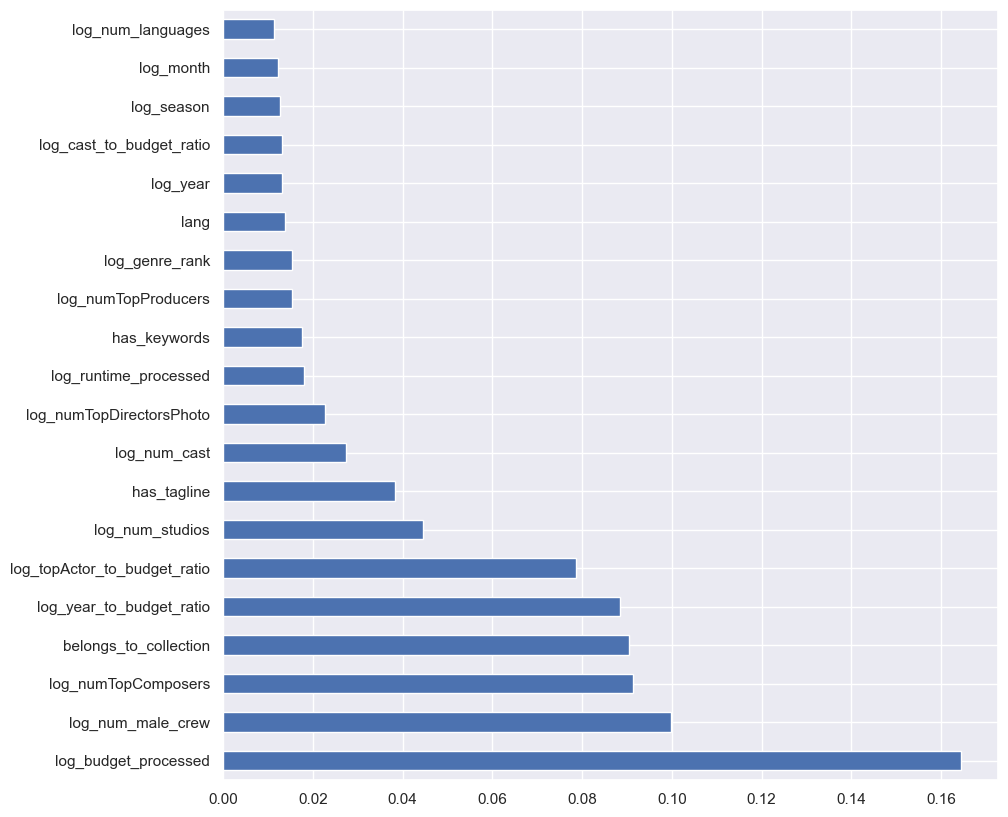

In [214]:
feat_importances = pd.Series(feature_importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=[10,10])

In [215]:
## There is a bug with XGBoost and SHAP that still has to be fixed, so this code sorts out the issue for now
mybooster = xgb_best_model.get_booster()
model_bytearray = mybooster.save_raw()[4:]
def myfun(self=None):
    return model_bytearray

mybooster.save_raw = myfun

[03:00:16] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0cec3277c4d9d0165-1\xgboost\xgboost-ci-windows\src\c_api\c_api.cc:1240: Saving into deprecated binary model format, please consider using `json` or `ubj`. Model format will default to JSON in XGBoost 2.2 if not specified.


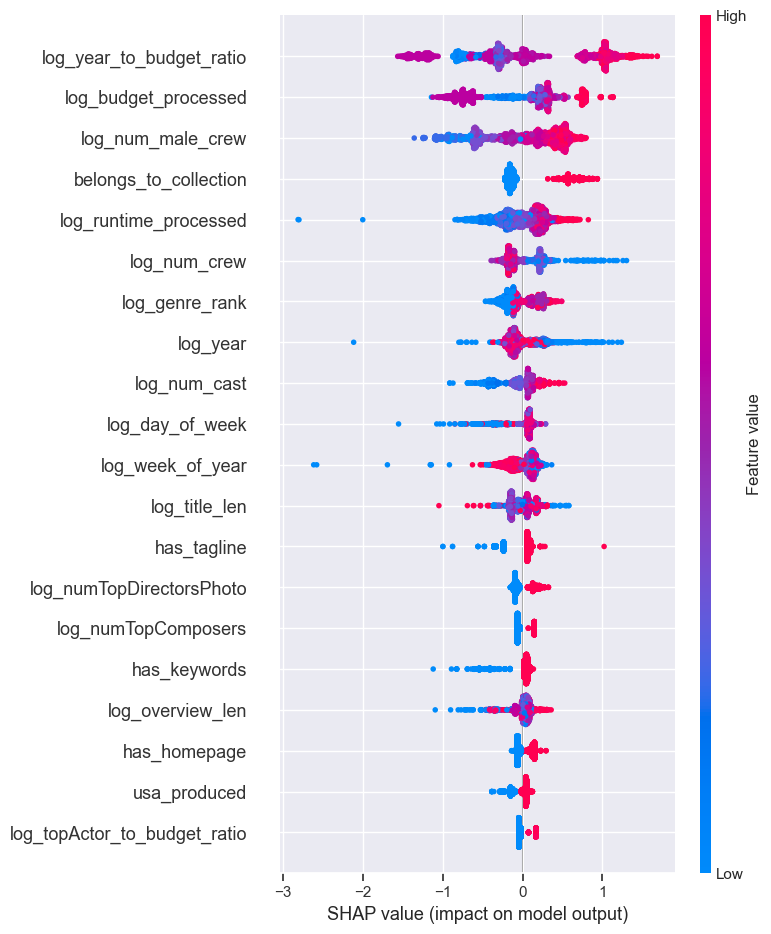

In [216]:
explainer = shap.TreeExplainer(xgb_best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)

In [ ]:
# LightGBM

In [217]:
lgbm_base_model = LGBMRegressor(random_state=42)
lgbm_base_model.fit(X_train, y_train.values.ravel())

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000928 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 42
[LightGBM] [Info] Start training from score 15.932458


LGBMRegressor(random_state=42)

In [218]:
y_pred = lgbm_base_model.predict(X_test)

In [219]:
print('LightGBM Baseline Model Metrics:')
metrics(y_pred, y_test.values)

LightGBM Baseline Model Metrics:
Mean Squared Error:  4.9412
Root Mean Squared Error:  2.2229
Mean Absolute Error:  1.4604
Test Set Accuracy (from Mean Absolute Percentage Error):82.939%


# Grid Search Hyperparameter Tuning

In [221]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 150],
    'colsample_bytree': [0.8, 1.0, 1.2],
    'max_depth': [-1, 5, 10],
    'reg_alpha': [0.4, 0.5, 0.6],
    'reg_lambda': [0.2, 0.3, 0.4,],
    'subsample': [0.8, 0.9, 1],
    'num_leaves': [30,31,32]
}
# Create a based model
lgbm = LGBMRegressor(random_state=42)
lgbm, pred = algorithm_pipeline(X_train, X_test, y_train.values.ravel(), y_test.values, lgbm, 
                                 param_grid, cv=5)

# Root Mean Squared Error
print(np.sqrt(-lgbm.best_score_))
print(lgbm.best_params_)

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits



2430 fits failed out of a total of 7290.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2430 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 1049, in fit
    super().fit(
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\site-packages\lightgbm\sklearn.py", line 842, in fit
    self._Booster = train(
                    ^^^^^^
  File "C:\Users\prana\AppData\Local\Programs\Python\Python311\Lib\

[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Warning] Accuracy may be bad since you didn't explicitly set num_leaves OR 2^max_depth > num_leaves. (num_leaves=31).
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001546 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1742
[LightGBM] [Info] Number of data points in the train set: 2399, number of used features: 42
[LightGBM] [Info] Start training from score 15.932458
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No

In [ ]:
lgbm_base_model = LGBMRegressor()
lgbm_base_model.fit(X_train, y_train.values.ravel())
base_accuracy = evaluate(lgbm_base_model, X_test, y_test.values)

lgbm_best_model = lgbm.best_estimator_
best_accuracy = evaluate(lgbm_best_model, X_test, y_test.values)


print('Improvement of {:0.2f}%.'.format( 100 * (best_accuracy - base_accuracy) / base_accuracy))

In [ ]:
y_pred = lgbm_best_model.predict(X_test)
print('LightGBM Model (After Tuning) Metrics:')
metrics(y_pred, y_test.values)

# Features Importance

In [ ]:
feature_importances = lgbm_best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(20):
    print("%d. %s (%f)" % (f + 1, X_train.columns[indices[f]], feature_importances[indices[f]]))

In [ ]:
feat_importances = pd.Series(feature_importances, index=X.columns)
feat_importances.nlargest(20).plot(kind='barh', figsize=[10,10])

In [ ]:
explainer = shap.TreeExplainer(lgbm_best_model)
shap_values = explainer.shap_values(X_train)

shap.summary_plot(shap_values, X_train)